1.	Crawling Dataset Twitter --> Crawling Data:

In [1]:
#@title Twitter Auth Token

twitter_auth_token = 'd3f14f56adc624f96687771bbeaafc4cbb1dc017'

In [2]:
#@title Twitter Auth Token

twitter_auth_token = 'd3f14f56adc624f96687771bbeaafc4cbb1dc017' 

filename = 'air_quality_english.csv'
search_keyword = 'air quality lang:en since:2021-01-01 until:2024-07-10'
limit = 1000

!npx -y tweet-harvest -o "{filename}" -s "{search_keyword}" --tab "LATEST" -l {limit} --token {twitter_auth_token}

Tweet Harvest [v2.6.1]

Research by Helmi Satria
Use it for Educational Purposes only!

This script uses Chromium Browser to crawl data from Twitter with your Twitter auth token.
Please enter your Twitter auth token when prompted.

Note: Keep your access token secret! Don't share it with anyone else.
Note: This script only runs on your local device.


Opening twitter search page...


Found existing file ./tweets-data/air_quality_english.csv, renaming to ./tweets-data/air_quality_english.old.csv

Filling in keywords: air quality lang:en since:2021-01-01 until:2024-07-10


-- Scrolling... (1)

Your tweets saved to: c:\Users\User\Documents\penelitian dosen\tweets-data\air_quality_english.csv
Total tweets saved: 19

-- Scrolling... (1)

Your tweets saved to: c:\Users\User\Documents\penelitian dosen\tweets-data\air_quality_english.csv
Total tweets saved: 38

-- Scrolling... (1)

Your tweets saved to: c:\Users\User\Documents\penelitian dosen\tweets-data\air_quality_english.csv
Total tweets s

[v2.6.1] No more tweets found, please check your search criteria and csv file result


2.	Preprocessing

 --> Cleansing (Penghapusan karakter yang tidak perlu) :  Hapus tanda baca, angka, retweet, hashtag, tab, newline, black slice, emoticon, kata berbahasa Cina, mention, link, URL, spasi depan dan belakang, double atau single spasi, dan karakter tunggal.

 --> Case Folding : Ubah semua huruf besar menjadi huruf kecil untuk konsistensi dalam teks.

--> Tokenizing : Pisahkan teks atau kalimat menjadi satuan kata (token).

 --> Normalisasi : Perbaiki kata-kata tidak baku, seperti mengubah kata singkatan menjadi kata aslinya.

 --> Stopword Removal : Hilangkan kata-kata yang tidak bermakna atau tidak berpengaruh dalam analisis.

 --> Stemming : Ubah kata-kata menjadi bentuk dasarnya (stem).

--> Hapus Data Duplikat : Hapus data yang sama untuk menghindari redundansi dalam analisis.

In [4]:
import pandas as pd
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

# Ensure you have NLTK data downloaded
nltk.download('punkt')
nltk.download('stopwords')

# Enhanced text cleansing
def cleanse_text(text):
    text = re.sub(r'[@#][\w_-]+', '', text)  # Remove mentions and hashtags
    text = re.sub(r'https?://\S+|www\.\S+', '', text)  # Remove URLs
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    text = re.sub(r'\d+', '', text)  # Remove numbers
    text = re.sub(r'\s+', ' ', text)  # Remove extra spaces
    text = text.strip().lower()  # Convert to lowercase and remove leading/trailing spaces
    return text

# Token normalization
def normalize_text(tokens):
    normal_words = {
        "isn't": "is not", "doesn't": "does not", "don't": "do not",
        "it's": "it is", "'s": "is", "'m": "am", "'re": "are",
        "'ve": "have", "'ll": "will", "'d": "would", "can't": "can not",
        "won't": "will not", "shouldn't": "should not"
    }
    return [normal_words.get(token, token) for token in tokens]

# Custom stopwords list
stopwords_list = stopwords.words('english')

# Stopword removal
def remove_stopwords(tokens):
    return [word for word in tokens if word not in stopwords_list]

# Stemming function
def stem_text(tokens):
    factory = StemmerFactory()
    stemmer = factory.create_stemmer()
    return [stemmer.stem(word) for word in tokens]

# Read data from CSV
df = pd.read_csv(r'gabungan file\crawiling_data.csv')

# Check for 'full_text' column
if 'full_text' not in df.columns:
    raise KeyError("Column 'full_text' not found in DataFrame.")

# Data preprocessing pipeline
df['clean_text'] = df['full_text'].apply(cleanse_text)
df['tokens'] = df['clean_text'].apply(word_tokenize)
df['normalized_tokens'] = df['tokens'].apply(normalize_text)
df['filtered_tokens'] = df['normalized_tokens'].apply(remove_stopwords)  
df['stemmed_tokens'] = df['filtered_tokens'].apply(stem_text)

# Remove duplicate rows
df.drop_duplicates(subset=['stemmed_tokens'], keep='first', inplace=True)

# Save to CSV
output_file = r'C:\Users\User\Downloads\kualitas udara\hasil_preprocesing_1.csv'
df.to_csv(output_file, index=False)

print(f"Data has been s6aved to: {output_file}")

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


3.	Pembuatan Fitur (Feature Extraction):

--> Ekstraksi Fitur  Gunakan TF-IDF Vectorizer atau Word Embeddings (seperti Word2Vec, GloVe) untuk mengubah teks menjadi representasi numerik.


In [7]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

# Baca data dari file CSV
file_path = r'hasil_preprocesing_1.csv'  # Ubah dengan path sesuai lokasi file CSV Anda
df = pd.read_csv(file_path)

# Pilih kolom yang akan digunakan untuk ekstraksi fitur TF-IDF
text_column = 'filtered_tokens'  # Ganti dengan 'stemmed_tokens' jika ingin menggunakan kolom stemmed_tokens

# Inisialisasi TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=1000)  # Ubah max_features sesuai kebutuhan

# Fit transform teks ke dalam representasi TF-IDF
tfidf_matrix = tfidf_vectorizer.fit_transform(df[text_column].astype('str'))  # Pastikan data diubah menjadi string jika ada tipe data yang tidak sesuai

# Ubah hasilnya menjadi DataFrame untuk melihat representasi TF-IDF
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

# Simpan hasil TF-IDF ke dalam file CSV
output_file = r'C:\Users\User\Downloads\kualitas udara\hasil_tfidf.csv'  # Ubah dengan path tempat Anda ingin menyimpan file CSV hasil
tfidf_df.to_csv(output_file, index=False)

# Tampilkan konfirmasi dan jumlah fitur TF-IDF
num_features = tfidf_matrix.shape[1]  # Menghitung jumlah fitur
print(f"Hasil TF-IDF telah disimpan dalam file: {output_file}")
print(f"Jumlah fitur TF-IDF: {num_features}")

Hasil TF-IDF telah disimpan dalam file: C:\Users\User\Downloads\kualitas udara\hasil_tfidf.csv
Jumlah fitur TF-IDF: 1000


4.	Pembuatan Corpus: Membangun corpus dari teks yang telah diproses.  kumpulan dokumen atau teks yang digunakan sebagai data untuk dilakukan analisis sentimen.

In [1]:
import pandas as pd
import re

# Fungsi untuk membersihkan teks dari karakter khusus
def clean_text(text):
    cleaned_text = re.sub(r'[^a-zA-Z0-9\s]', '', str(text))  # Menggunakan str(text) untuk mengatasi NaN jika ada
    return cleaned_text

# Path file CSV
csv_file = r'hasil_preprocesing_1.csv'

# Membaca file CSV ke dalam DataFrame
df = pd.read_csv(csv_file)

# Memproses teks dan membangun corpus
corpus = []
for index, row in df.iterrows():
    cleaned_text = clean_text(row['clean_text'])  # Ubah 'clean_text' sesuai dengan nama kolom teks yang sudah dibersihkan
    corpus.append(cleaned_text)

# Menampilkan hasil
print("Contoh 10 dokumen pertama dalam corpus:")
for i in range(min(5, len(corpus))):
    print(corpus[i])

# Opsional: Simpan corpus ke dalam file teks
output_file = 'corpus.txt'
with open(output_file, 'w', encoding='utf-8') as f:
    for text in corpus:
        f.write(text + '\n')

print(f"Corpus telah disimpan di '{output_file}'.")

Contoh 10 dokumen pertama dalam corpus:
the air quality is terrible
breathe easy with clean air ducts air clean environmental offers complete air duct cleaning to improve indoor air quality reduce allergens and save you money on energy bills clean air ducts mean a healthier home and more efficient energy use want to learn more about o
the ventura county aq forecast for wednesday july is moderate for all regions wednesday is a no burn day in all regions for air quality updates facebook ventura county air pollution control district
she is one of the grossest humans to ever walk the face of this planet she deserves the same air quality as her integrity
how we end covid by relieving stress on coral with complex sound affecting climate change and air quality on a global scale
Corpus telah disimpan di 'corpus.txt'.


5.	Visualisasi: Visualisasi Word Cloud  frekuensi words 10

air: 1178
quality: 1003
alert: 100
pollution: 93
today: 93
health: 93
heat: 91
indoor: 85
smoke: 78
improve: 73


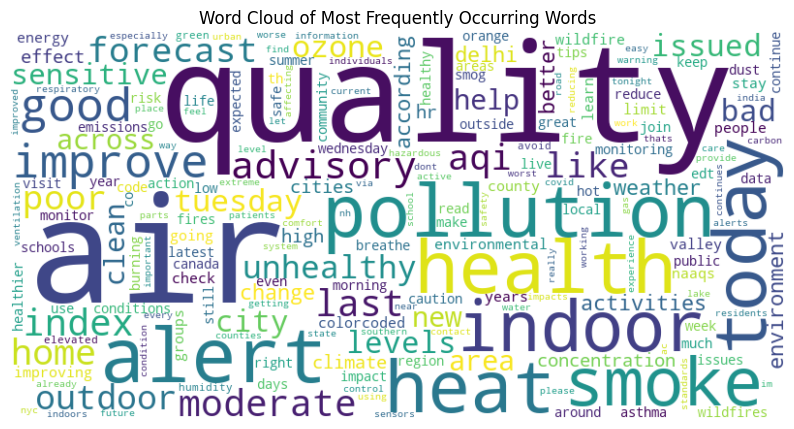

In [2]:
import re
import csv
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# List of stopwords
stopwords_list = [
    'in', 'at', 'for', 'and', 'but', 'or', 'are', 'so', 'the', 'if', 'to', 
    'it', 'is', 'not', 'be', 'as', 'of', 'a', 'on', 'with', 'your', 'i', 
    'this', 'you', 'that', 'by', 'an', 'was', 'from', 'they', 'which', 
    'she', 'he', 'we', 'us', 'our', 'their', 'there', 'here', 'who', 
    'whom', 'what', 'when', 'where', 'why', 'how', 'can', 'could', 'should', 
    'would', 'will', 'just', 'have', 'has', 'had', 'been', 'do', 'does', 
    'did', 'may', 'might', 'must', 'shall', 'about', 'over', 'under', 'again', 
    'more', 'some', 'any', 'all', 'each', 'few', 'many', 'most', 'other', 
    'such', 'no', 'nor', 'only', 'own', 'same', 'than', 'too', 'very', 'one', 
    'two', 'three', 'four', 'five', 'six', 'seven', 'eight', 'nine', 'ten', 
    'first', 'second', 'next', 'then', 'once', 's', 'pm', 'amp', 'its', 
    'now', 'due', 'also', 'my', 'get', 'see', 'day', 'know', 'time', 'well', 
    'take', 'need','july'
]

# Function to clean and filter text
def clean_text(text, stopwords):
    # Remove punctuation, convert to lowercase, and split into words
    words = re.findall(r'\b\w+\b', text.lower())
    # Filter out stopwords
    filtered_words = [word for word in words if word not in stopwords]
    return filtered_words

# Input file path
input_file = 'hasil_preprocesing_1.csv'

all_filtered_words = []

# Open CSV file with UTF-8 encoding
with open(input_file, 'r', encoding='utf-8') as infile:
    reader = csv.DictReader(infile)
    # Read each row in the CSV file
    for row in reader:
        cleaned_text = row['stemmed_tokens']  # Adjust column name based on your CSV structure
        # Clean and filter text
        filtered_words = clean_text(cleaned_text, stopwords_list)
        # Add filtered words to the list of all filtered words
        all_filtered_words.extend(filtered_words)

# Count word frequencies from all filtered text
word_freq = Counter(all_filtered_words)

# Ambil 10 kata dengan frekuensi tertinggi
top_10_words = word_freq.most_common(10)

# Tampilkan frekuensi kata-kata teratas
for word, freq in top_10_words:
    print(f'{word}: {freq}')

# Generate word cloud based on word frequencies
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq)

# Display word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Most Frequently Occurring Words')
plt.show()

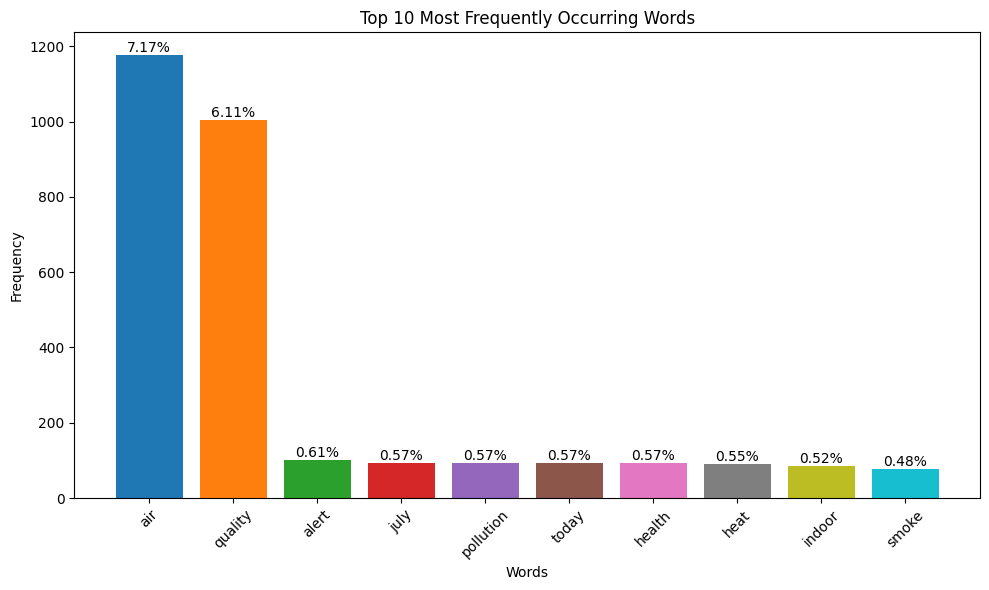

In [4]:
import re
import csv
from collections import Counter
import matplotlib.pyplot as plt
import numpy as np

# List of stopwords
stopwords_list = [
    'in', 'at', 'for', 'and', 'but', 'or', 'are', 'so', 'the', 'if', 'to', 
    'it', 'is', 'not', 'be', 'as', 'of', 'a', 'on', 'with', 'your', 'i', 
    'this', 'you', 'that', 'by', 'an', 'was', 'from', 'they', 'which', 
    'she', 'he', 'we', 'us', 'our', 'their', 'there', 'here', 'who', 
    'whom', 'what', 'when', 'where', 'why', 'how', 'can', 'could', 'should', 
    'would', 'will', 'just', 'have', 'has', 'had', 'been', 'do', 'does', 
    'did', 'may', 'might', 'must', 'shall', 'about', 'over', 'under', 'again', 
    'more', 'some', 'any', 'all', 'each', 'few', 'many', 'most', 'other', 
    'such', 'no', 'nor', 'only', 'own', 'same', 'than', 'too', 'very', 'one', 
    'two', 'three', 'four', 'five', 'six', 'seven', 'eight', 'nine', 'ten', 
    'first', 'second', 'next', 'then', 'once', 's', 'pm', 'amp', 'its', 
    'now', 'due', 'also', 'my', 'get', 'see', 'day', 'know', 'time', 'well', 
    'take', 'need'
]

# Function to clean and filter text
def clean_text(text, stopwords):
    # Remove punctuation, convert to lowercase, and split into words
    words = re.findall(r'\b\w+\b', text.lower())
    # Filter out stopwords
    filtered_words = [word for word in words if word not in stopwords]
    return filtered_words

# Input file path
input_file = r'hasil_preprocesing_1.csv'

all_filtered_words = []

# Open CSV file with UTF-8 encoding
with open(input_file, 'r', encoding='utf-8') as infile:
    reader = csv.DictReader(infile)
    # Read each row in the CSV file
    for row in reader:
        cleaned_text = row['stemmed_tokens']  # Adjust column name based on your CSV structure
        # Clean and filter text
        filtered_words = clean_text(cleaned_text, stopwords_list)
        # Add filtered words to the list of all filtered words
        all_filtered_words.extend(filtered_words)

# Count word frequencies from all filtered text
word_freq = Counter(all_filtered_words)

# Get total number of words for percentage calculation
total_words = sum(word_freq.values())

# Ambil 10 kata dengan frekuensi tertinggi
top_10_words = word_freq.most_common(10)

# Prepare data for plotting
words, counts = zip(*top_10_words)
percentages = [count / total_words * 100 for count in counts]

# Plotting bar chart for top 10 words with attractive color
plt.figure(figsize=(10, 6))
colors = plt.cm.tab10(np.linspace(0, 1, len(top_10_words)))  # Using 'tab10' colormap
bars = plt.bar(words, counts, color=colors)

# Add percentages above bars
for bar, percentage in zip(bars, percentages):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2.0, height, f'{percentage:.2f}%', ha='center', va='bottom')

plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 10 Most Frequently Occurring Words')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

6. Analisis Sentimen Berbasis TextBlob pada Data Teks kualitas data

--> Pembagian Sentimen

[nltk_data] Downloading package opinion_lexicon to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package opinion_lexicon is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


sentiment
positive    405
neutral     362
negative    325
Name: count, dtype: int64
DataFrame telah disimpan ke C:\Users\User\Downloads\kualitas_udara_sentiment_processed_data_1.csv


C:\Users\User\AppData\Local\Temp\ipykernel_19496\3736329885.py:59: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette='viridis')


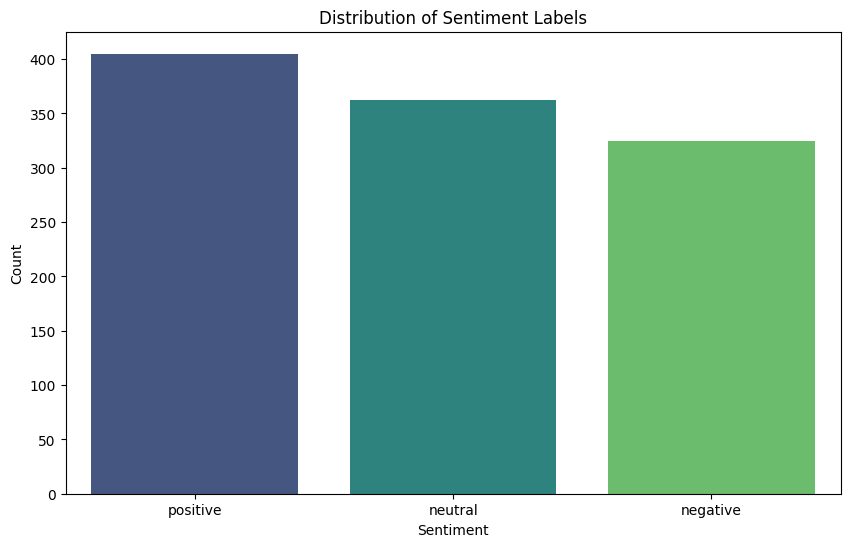

In [5]:
import pandas as pd
from nltk.tokenize import word_tokenize
from nltk.corpus import opinion_lexicon
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
import seaborn as sns
import nltk

# Membaca data dari file CSV
file_path = r'hasil_preprocesing_1.csv'  # Menggunakan string literal mentah untuk menghindari masalah escape sequence
df = pd.read_csv(file_path)

# Unduh dan siapkan data lexicon dari NLTK
nltk.download('opinion_lexicon')
nltk.download('stopwords')

# Inisialisasi set kata positif dan negatif dari opinion lexicon NLTK
positive_words = set(opinion_lexicon.positive())
negative_words = set(opinion_lexicon.negative())

# Set stopwords
stop_words = set(stopwords.words('english'))

# Fungsi untuk menentukan label sentimen berdasarkan lexicon
def get_lexicon_sentiment(text):
    if isinstance(text, str):  # Periksa apakah input adalah string
        tokens = word_tokenize(text.lower())  # Tokenisasi dan konversi ke huruf kecil
        tokens = [word for word in tokens if word.isalpha()]  # Hapus tanda baca dan angka
        tokens = [word for word in tokens if word not in stop_words]  # Hapus stopwords
        positive_count = sum([1 for word in tokens if word in positive_words])
        negative_count = sum([1 for word in tokens if word in negative_words])
        
        if positive_count > negative_count:
            return 'positive'
        elif negative_count > positive_count:
            return 'negative'
        else:
            return 'neutral'
    return 'neutral'  # Jika bukan string, anggap sebagai 'neutral'

# Tangani nilai yang hilang dan konversi ke string
df['clean_text'] = df['clean_text'].fillna('').astype(str)

# Terapkan analisis sentimen ke kolom 'clean_text'
df['sentiment'] = df['clean_text'].apply(get_lexicon_sentiment)

# Cetak jumlah masing-masing label sentimen
sentiment_counts = df['sentiment'].value_counts()
print(sentiment_counts)

# Simpan DataFrame yang telah diproses ke file CSV
output_csv_path = r'C:\Users\User\Downloads\kualitas_udara_sentiment_processed_data_1.csv'  # Menggunakan string literal mentah untuk menghindari masalah escape sequence
df.to_csv(output_csv_path, index=False)

print(f"DataFrame telah disimpan ke {output_csv_path}")

# Visualisasi hasil sentimen
plt.figure(figsize=(10, 6))
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette='viridis')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Distribution of Sentiment Labels')
plt.show()

NAIVE BAYES 

Evaluasi Cross-Validation:

--> Kita akan menghitung metrik untuk setiap jumlah folds.

--> Menampilkan hasil dalam format tabel.

--> Menampilkan Confusion Matrix sebagai diagram.

--> Menampilkan ROC Curve.


NAIVE BAYES 50:50

--> K 2,5,10

Summary Results:
   Folds  Accuracy  Precision    Recall  F1-Score   ROC-AUC
0      3  0.761447   0.661856  0.653846  0.618200  0.777342
1      5  0.761177   0.671842  0.663004  0.628776  0.792316
2     10  0.760449   0.670038  0.666667  0.631461  0.800704

Naive Bayes Accuracy (50:50): 0.6391941391941391

Naive Bayes Classification Report (50:50):
              precision    recall  f1-score     support
negative       0.620968  0.553957  0.585551  139.000000
neutral        0.750000  0.104348  0.183206  115.000000
positive       0.640394  0.890411  0.744986  292.000000
accuracy       0.639194  0.639194  0.639194    0.639194
macro avg      0.670454  0.516239  0.504581  546.000000
weighted avg   0.658534  0.639194  0.586074  546.000000
ROC-AUC Score (50:50): 0.7800898698107114


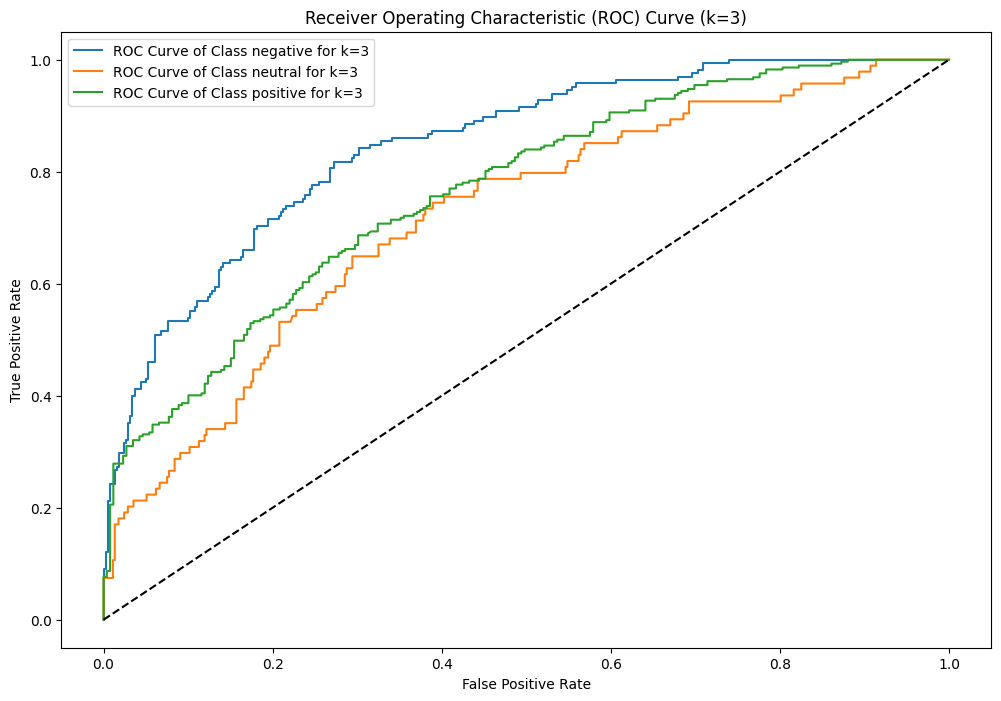

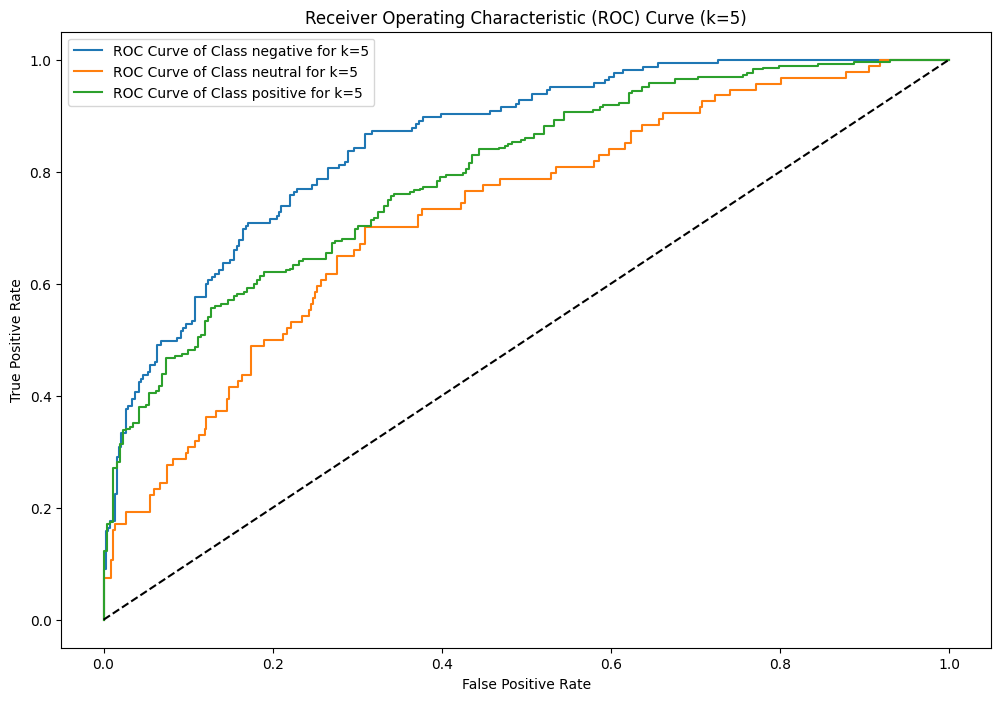

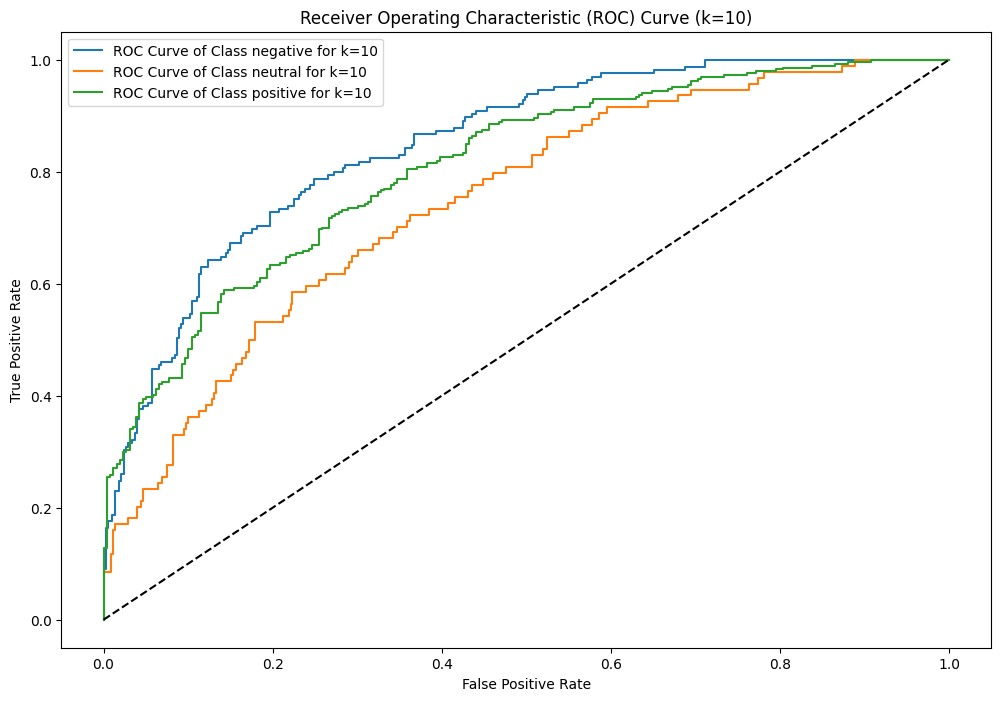

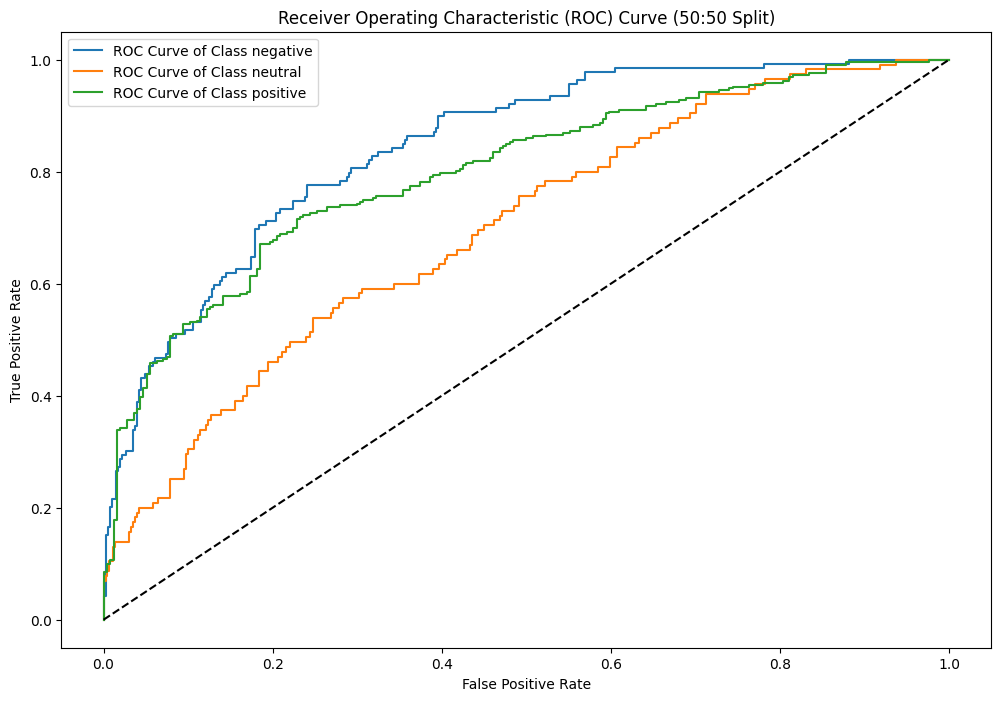

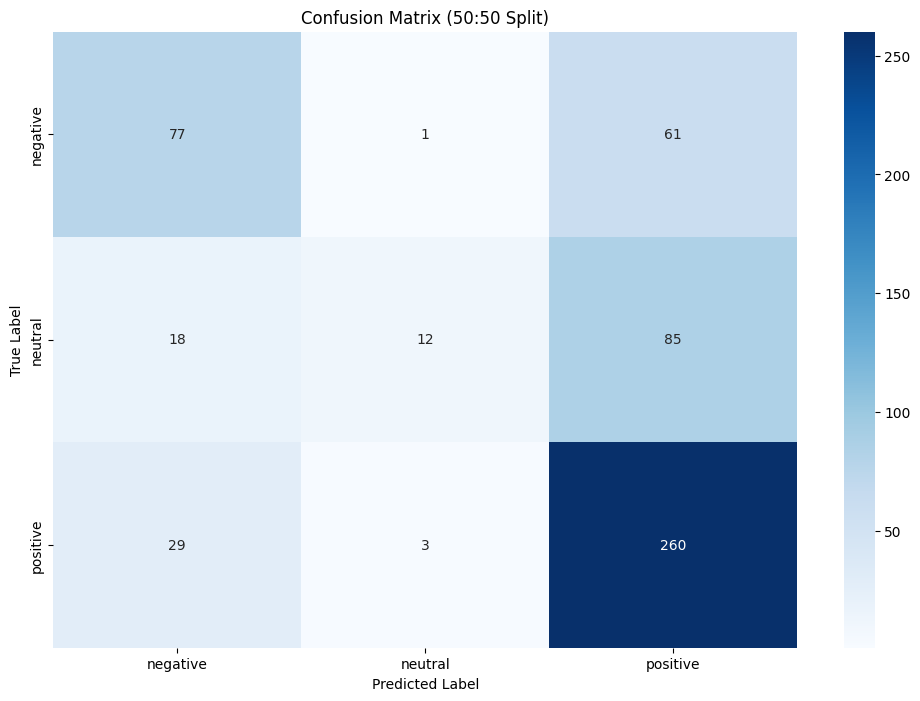

In [2]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, precision_score, recall_score, f1_score
from sklearn.preprocessing import label_binarize, LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# Membaca data dari file CSV
df = pd.read_csv(r'kualitas udara_processed_data_1.csv')

# Tangani nilai yang hilang dan konversi ke string
df['clean_text'] = df['clean_text'].fillna('').astype(str)

# Encode label sentimen menjadi angka
label_encoder = LabelEncoder()
df['sentiment_encoded'] = label_encoder.fit_transform(df['sentiment'])

# Memisahkan fitur dan label
X = df['clean_text']
y = df['sentiment_encoded']

# Pembagian data 50:50
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

# Vectorisasi teks menggunakan TF-IDF dengan parameter tuning
tfidf_vectorizer = TfidfVectorizer(ngram_range=(1, 2), max_features=10000, min_df=3, max_df=0.8)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Inisialisasi model Naive Bayes
nb_model = MultinomialNB()

# Hyperparameter tuning dengan GridSearchCV
param_grid = {
    'alpha': [0.1, 0.5, 1.0, 2.0]
}
grid_search = GridSearchCV(nb_model, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train_tfidf, y_train)
best_nb_model = grid_search.best_estimator_

# Evaluasi dengan cross-validation 3, 5, dan 10 folds
roc_data = {}
results = []
for folds in [3, 5, 10]:
    accuracy, precision, recall, f1, roc_auc, class_report_df, conf_matrix, y_true, y_prob, fpr_dict, tpr_dict = evaluate_cross_validation(X_train_tfidf, y_train, folds)
    results.append({
        'Folds': folds,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1,
        'ROC-AUC': roc_auc
    })
    roc_data[folds] = (fpr_dict, tpr_dict)

NAIVE BAYES --> 60:40

Summary Results:
   Folds  Accuracy  Precision    Recall  F1-Score   ROC-AUC
0      3  0.763742   0.646545  0.661069  0.626683  0.790809
1      5  0.767366   0.662655  0.671756  0.639846  0.799659
2     10  0.764304   0.661099  0.674809  0.641731  0.800229

Naive Bayes Accuracy (60:40): 0.631578947368421

Naive Bayes Classification Report (60:40):
              precision    recall  f1-score     support
negative       0.646465  0.566372  0.603774  113.000000
neutral        0.600000  0.098901  0.169811   91.000000
positive       0.628483  0.871245  0.730216  233.000000
accuracy       0.631579  0.631579  0.631579    0.631579
macro avg      0.624983  0.512172  0.501267  437.000000
weighted avg   0.627201  0.631579  0.580823  437.000000
ROC-AUC Score (60:40): 0.773989638168791


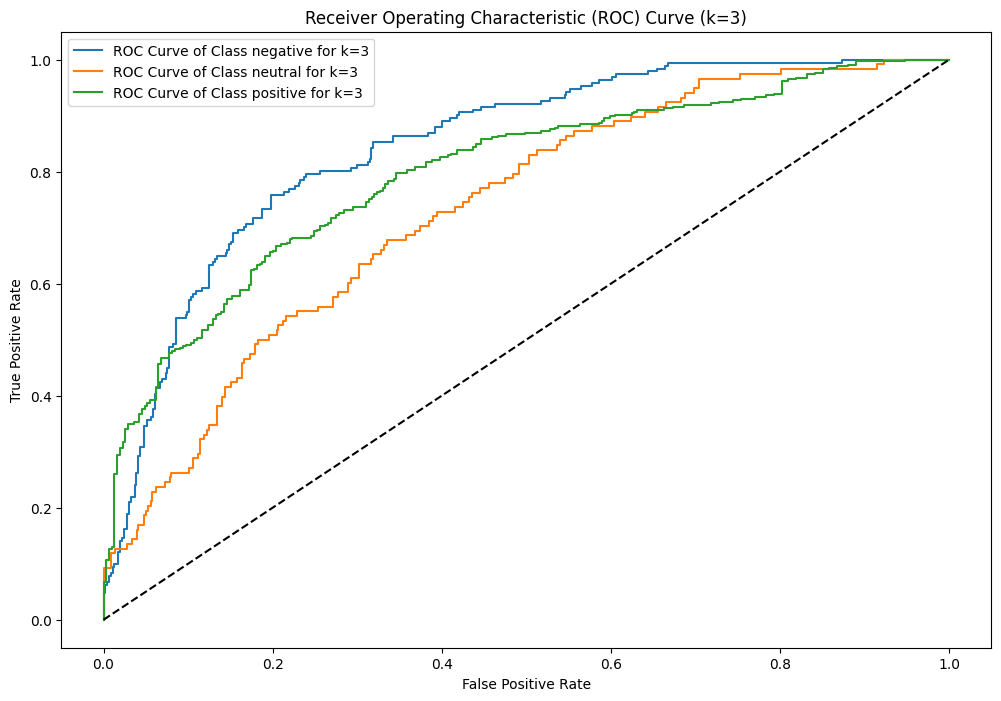

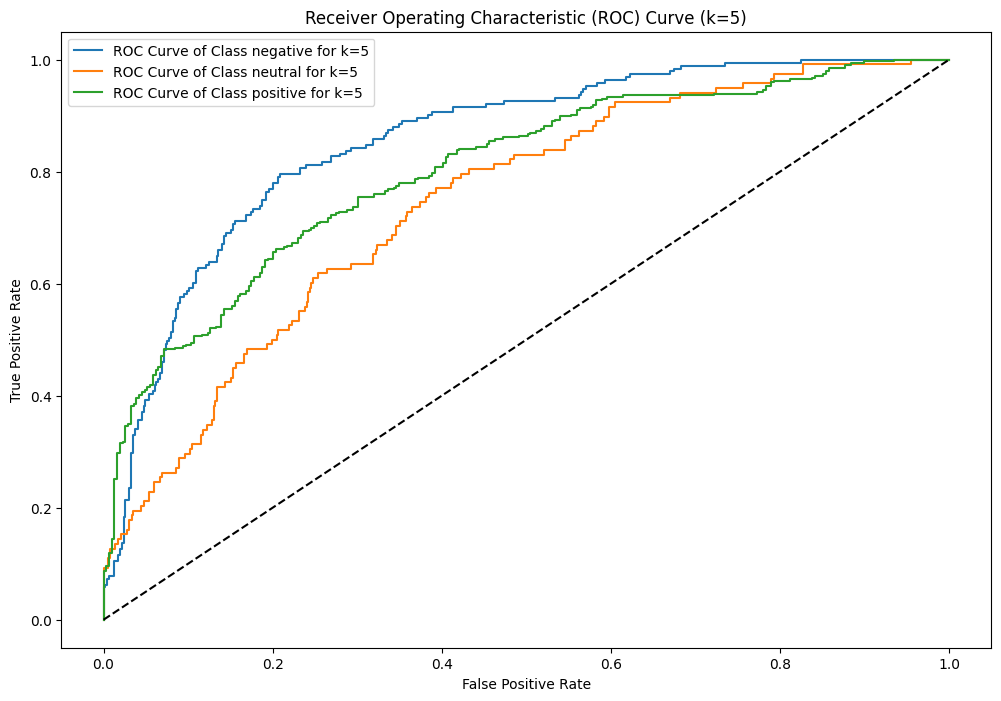

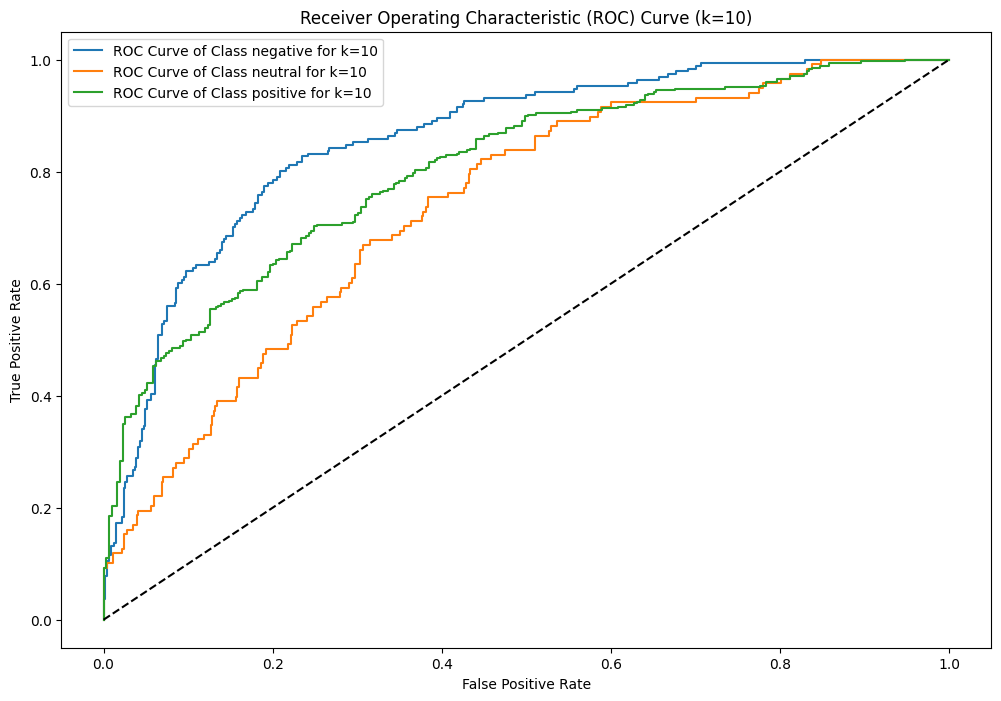

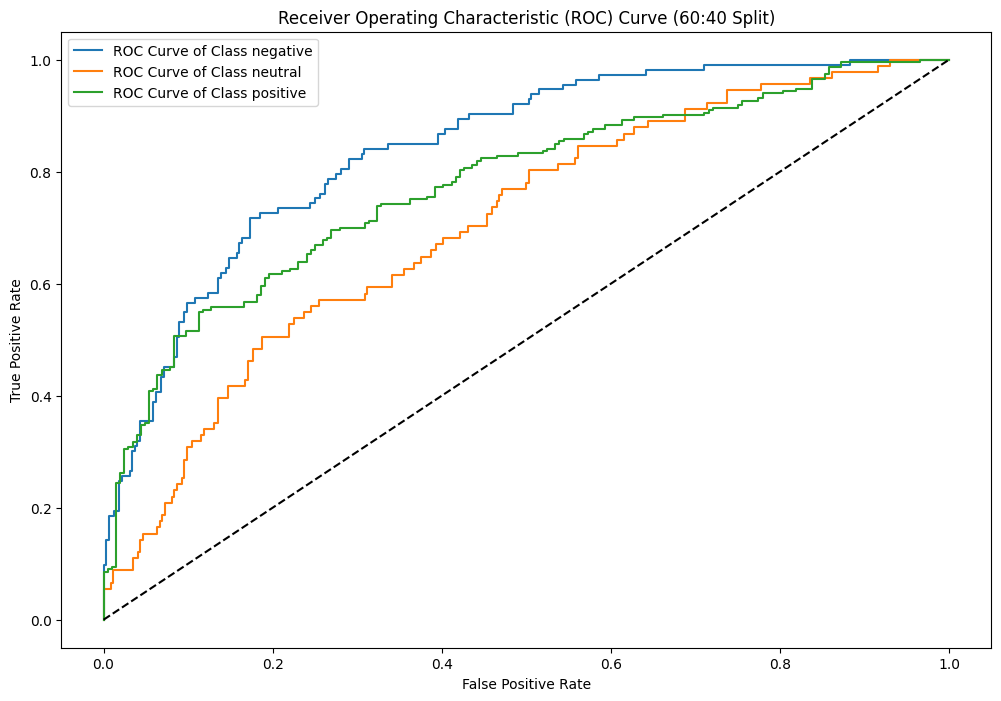

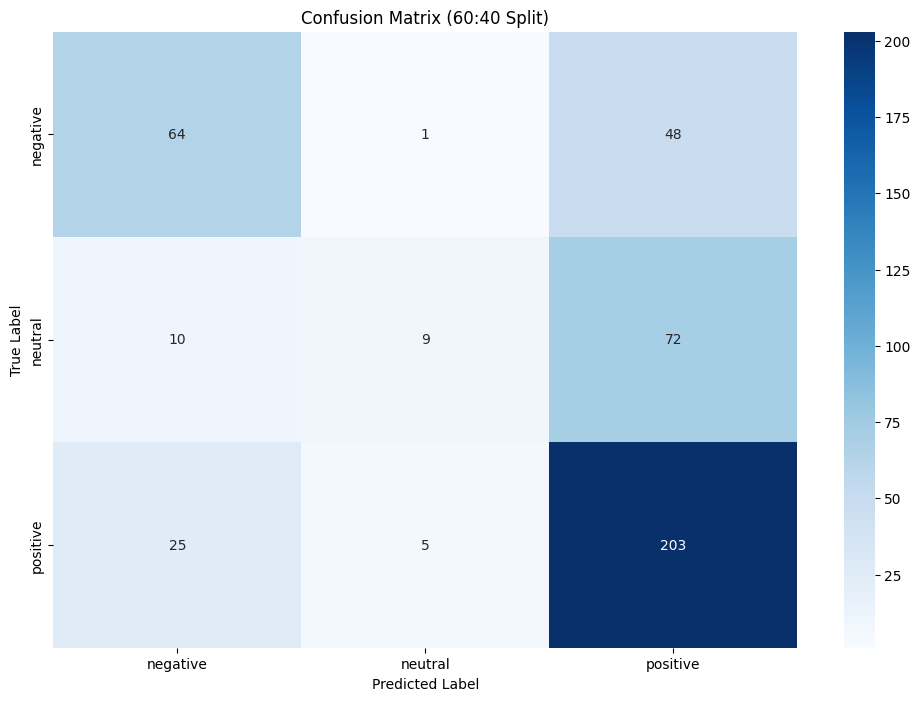

In [186]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, precision_score, recall_score, f1_score
from sklearn.preprocessing import label_binarize, LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# Membaca data dari file CSV
df = pd.read_csv(r'kualitas udara_processed_data_1.csv')

# Tangani nilai yang hilang dan konversi ke string
df['clean_text'] = df['clean_text'].fillna('').astype(str)

# Encode label sentimen menjadi angka
label_encoder = LabelEncoder()
df['sentiment_encoded'] = label_encoder.fit_transform(df['sentiment'])

# Memisahkan fitur dan label
X = df['clean_text']
y = df['sentiment_encoded']

# Pembagian data 60:40
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# Vectorisasi teks menggunakan TF-IDF dengan parameter tuning
tfidf_vectorizer = TfidfVectorizer(ngram_range=(1, 2), max_features=10000, min_df=3, max_df=0.8)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Inisialisasi model Naive Bayes
nb_model = MultinomialNB()

# Hyperparameter tuning dengan GridSearchCV
param_grid = {
    'alpha': [0.1, 0.5, 1.0, 2.0]
}
grid_search = GridSearchCV(nb_model, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train_tfidf, y_train)
best_nb_model = grid_search.best_estimator_

# Fungsi untuk menghitung metrik cross-validation
def evaluate_cross_validation(X, y, k_folds):
    skf = StratifiedKFold(n_splits=k_folds, shuffle=True, random_state=42)
    
    accuracies = []
    y_true = []
    y_pred = []
    y_prob = []
    
    # Track FPR and TPR for ROC curve plotting
    fpr_dict = {i: [] for i in range(len(label_encoder.classes_))}
    tpr_dict = {i: [] for i in range(len(label_encoder.classes_))}
    
    for train_index, test_index in skf.split(X, y):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        
        best_nb_model.fit(X_train, y_train)
        
        # Collect predictions and probabilities
        y_true.extend(y_test)
        y_pred.extend(best_nb_model.predict(X_test))
        y_prob.extend(best_nb_model.predict_proba(X_test))
        
        # Calculate accuracies
        train_acc = best_nb_model.score(X_train, y_train)
        test_acc = best_nb_model.score(X_test, y_test)
        accuracy = (train_acc + test_acc) / 2
        accuracies.append(accuracy)
    
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)
    y_prob = np.array(y_prob)
    
    # Collect FPR and TPR for ROC curve plotting
    y_true_bin = label_binarize(y_true, classes=np.arange(len(label_encoder.classes_)))
    y_prob_array = np.array(y_prob)
    
    for i in range(len(label_encoder.classes_)):
        fpr, tpr, _ = roc_curve(y_true_bin[:, i], y_prob_array[:, i])
        fpr_dict[i].append(fpr)
        tpr_dict[i].append(tpr)
    
    # Metrics
    accuracy = np.mean(accuracies)
    precision = precision_score(y_true, y_pred, average='weighted', zero_division=1)
    recall = recall_score(y_true, y_pred, average='weighted', zero_division=1)
    f1 = f1_score(y_true, y_pred, average='weighted', zero_division=1)
    roc_auc = roc_auc_score(label_binarize(y_true, classes=np.arange(len(label_encoder.classes_))), y_prob, multi_class='ovr')
    
    # Classification Report
    classification_rep = classification_report(y_true, y_pred, target_names=label_encoder.classes_, zero_division=1, output_dict=True)
    
    # Convert classification report to DataFrame
    class_report_df = pd.DataFrame(classification_rep).transpose()
    
    # Confusion Matrix
    conf_matrix = confusion_matrix(y_true, y_pred)
    
    return accuracy, precision, recall, f1, roc_auc, class_report_df, conf_matrix, y_true, y_prob, fpr_dict, tpr_dict

# Evaluasi dengan cross-validation 3, 5, dan 10 folds
roc_data = {}
results = []
for folds in [3, 5, 10]:
    accuracy, precision, recall, f1, roc_auc, class_report_df, conf_matrix, y_true, y_prob, fpr_dict, tpr_dict = evaluate_cross_validation(X_train_tfidf, y_train, folds)
    results.append({
        'Folds': folds,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1,
        'ROC-AUC': roc_auc
    })
    roc_data[folds] = (fpr_dict, tpr_dict)

# Tampilkan hasil dalam bentuk tabel
results_df = pd.DataFrame(results)
print("Summary Results:")
print(results_df[['Folds', 'Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC-AUC']])

# Melatih model dengan data 60:40
best_nb_model.fit(X_train_tfidf, y_train)
y_pred = best_nb_model.predict(X_test_tfidf)
y_prob = best_nb_model.predict_proba(X_test_tfidf)

# Metrik Naive Bayes dengan data 60:40
accuracy_60_40 = (y_test == y_pred).mean()
precision_60_40 = precision_score(y_test, y_pred, average='weighted', zero_division=1)
recall_60_40 = recall_score(y_test, y_pred, average='weighted', zero_division=1)
f1_60_40 = f1_score(y_test, y_pred, average='weighted', zero_division=1)
roc_auc_60_40 = roc_auc_score(label_binarize(y_test, classes=np.arange(len(label_encoder.classes_))), y_prob, multi_class='ovr')

# Classification Report
classification_rep_60_40 = classification_report(y_test, y_pred, target_names=label_encoder.classes_, zero_division=1, output_dict=True)
class_report_df_60_40 = pd.DataFrame(classification_rep_60_40).transpose()

# Confusion Matrix
conf_matrix_60_40 = confusion_matrix(y_test, y_pred)

# Tampilkan hasil untuk rasio 60:40
print("\nNaive Bayes Accuracy (60:40):", accuracy_60_40)
print("\nNaive Bayes Classification Report (60:40):")
print(class_report_df_60_40)
print("ROC-AUC Score (60:40):", roc_auc_60_40)

# Plot ROC Curve untuk setiap k (3, 5, 10)
for folds, (fpr_dict, tpr_dict) in roc_data.items():
    plt.figure(figsize=(12, 8))
    n_classes = len(label_encoder.classes_)
    for i in range(n_classes):
        mean_fpr = np.concatenate(fpr_dict[i])
        mean_tpr = np.concatenate(tpr_dict[i])
        plt.plot(mean_fpr, mean_tpr, label=f'ROC Curve of Class {label_encoder.classes_[i]} for k={folds}')
    
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'Receiver Operating Characteristic (ROC) Curve (k={folds})')
    plt.legend(loc='best')
    plt.show()

# Plot ROC Curve dan Confusion Matrix untuk data 60:40
# Binarize y_test for ROC Curve
y_test_bin = label_binarize(y_test, classes=np.arange(len(label_encoder.classes_)))

# Plot ROC Curve
plt.figure(figsize=(12, 8))
n_classes = len(label_encoder.classes_)
for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_prob[:, i])
    plt.plot(fpr, tpr, label=f'ROC Curve of Class {label_encoder.classes_[i]}')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve (60:40 Split)')
plt.legend(loc='best')
plt.show()

# Plot Confusion Matrix
plt.figure(figsize=(12, 8))
sns.heatmap(conf_matrix_60_40, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix (60:40 Split)')
plt.show()

NAIVE BAYES --> 70:30

Summary Results:
   Folds  Accuracy  Precision    Recall  F1-Score   ROC-AUC
0      3  0.814142   0.657663  0.671466  0.655471  0.804216
1      5  0.802514   0.643348  0.659686  0.640846  0.808439
2     10  0.799020   0.643428  0.659686  0.639779  0.804859

Naive Bayes Accuracy (70:30): 0.625

Naive Bayes Classification Report (70:30):
              precision    recall  f1-score  support
negative       0.559140  0.604651  0.581006   86.000
neutral        0.541667  0.191176  0.282609   68.000
positive       0.663507  0.804598  0.727273  174.000
accuracy       0.625000  0.625000  0.625000    0.625
macro avg      0.588105  0.533475  0.530296  328.000
weighted avg   0.610883  0.625000  0.596736  328.000
ROC-AUC Score (70:30): 0.799900971104051


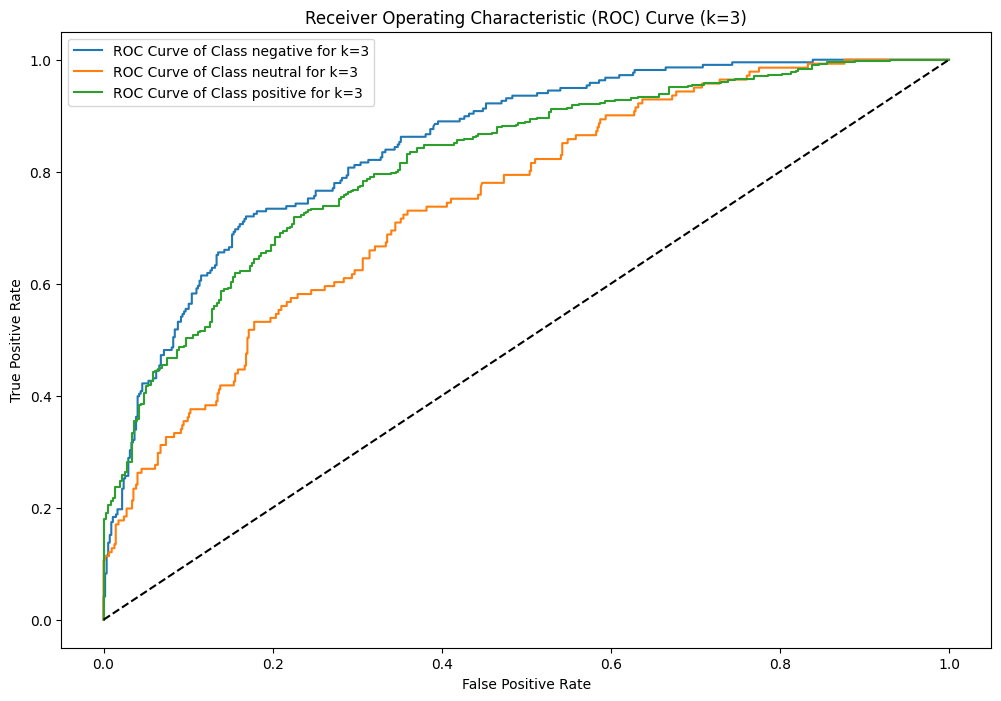

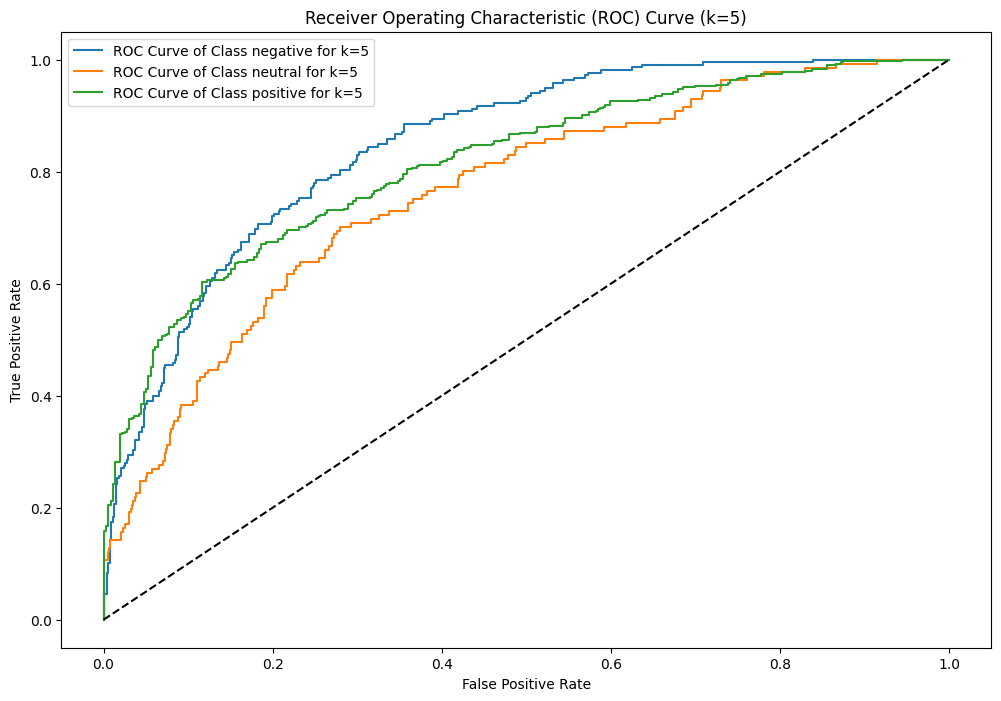

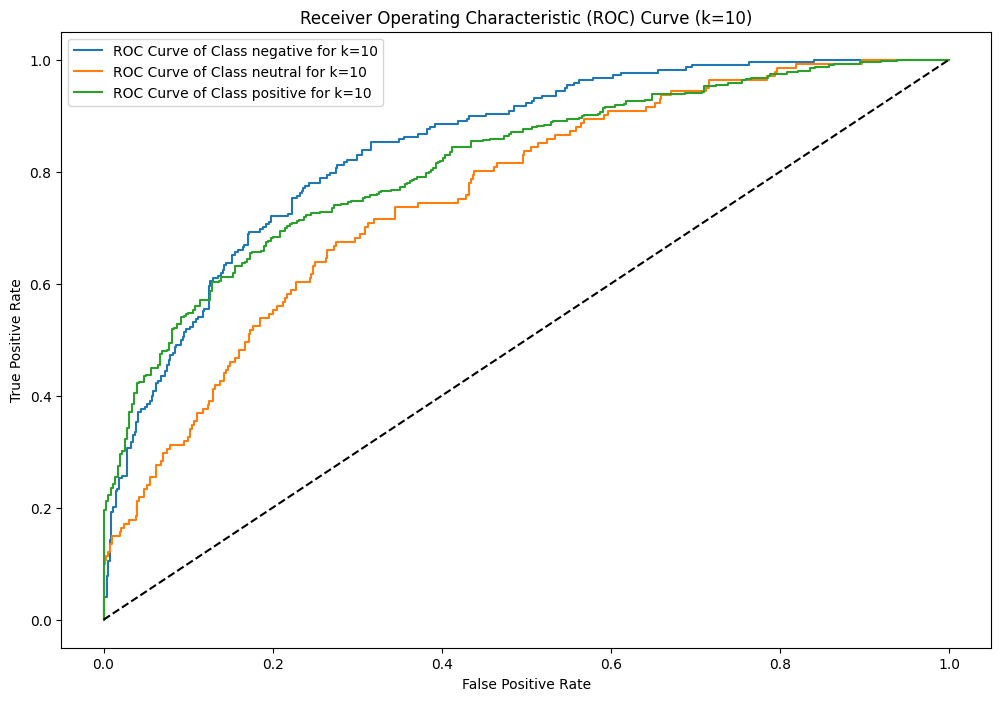

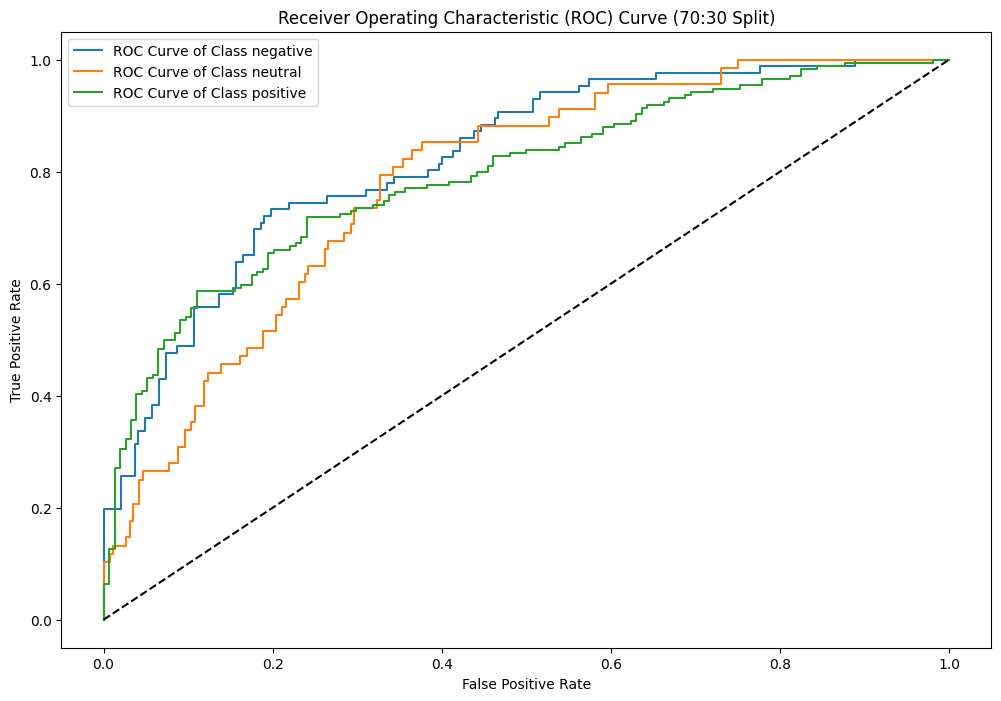

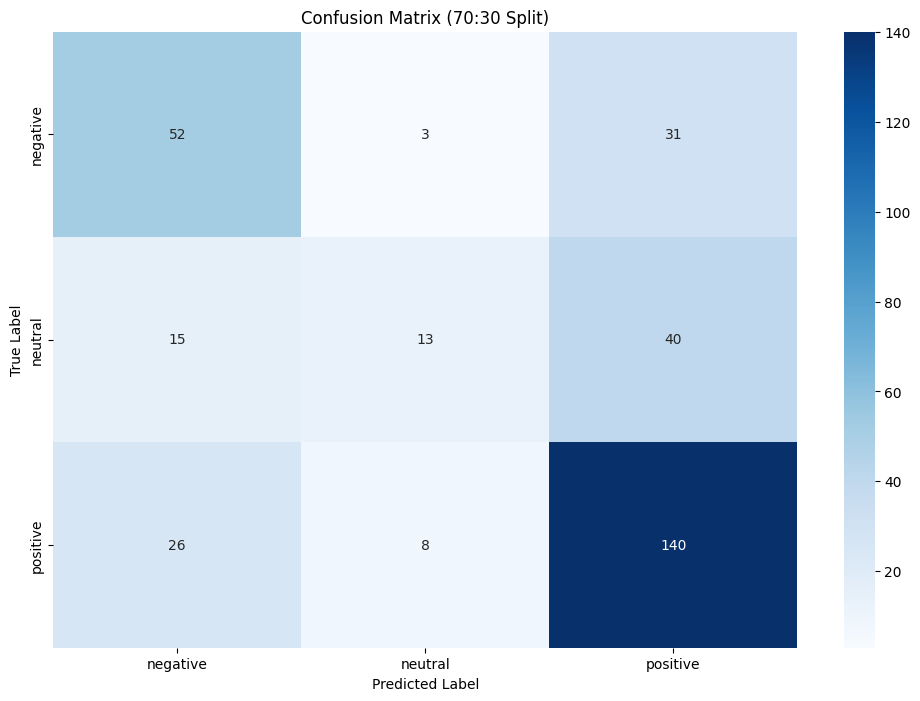

In [187]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, precision_score, recall_score, f1_score
from sklearn.preprocessing import label_binarize, LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# Membaca data dari file CSV
df = pd.read_csv(r'kualitas udara_processed_data_1.csv')

# Tangani nilai yang hilang dan konversi ke string
df['clean_text'] = df['clean_text'].fillna('').astype(str)

# Encode label sentimen menjadi angka
label_encoder = LabelEncoder()
df['sentiment_encoded'] = label_encoder.fit_transform(df['sentiment'])

# Memisahkan fitur dan label
X = df['clean_text']
y = df['sentiment_encoded']

# Pembagian data 70:30
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Vectorisasi teks menggunakan TF-IDF dengan parameter tuning
tfidf_vectorizer = TfidfVectorizer(ngram_range=(1, 2), max_features=10000, min_df=3, max_df=0.8)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Inisialisasi model Naive Bayes
nb_model = MultinomialNB()

# Hyperparameter tuning dengan GridSearchCV
param_grid = {
    'alpha': [0.1, 0.5, 1.0, 2.0]
}
grid_search = GridSearchCV(nb_model, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train_tfidf, y_train)
best_nb_model = grid_search.best_estimator_

# Fungsi untuk menghitung metrik cross-validation
def evaluate_cross_validation(X, y, k_folds):
    skf = StratifiedKFold(n_splits=k_folds, shuffle=True, random_state=42)
    
    accuracies = []
    y_true = []
    y_pred = []
    y_prob = []
    
    # Track FPR and TPR for ROC curve plotting
    fpr_dict = {i: [] for i in range(len(label_encoder.classes_))}
    tpr_dict = {i: [] for i in range(len(label_encoder.classes_))}
    
    for train_index, test_index in skf.split(X, y):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        
        best_nb_model.fit(X_train, y_train)
        
        # Collect predictions and probabilities
        y_true.extend(y_test)
        y_pred.extend(best_nb_model.predict(X_test))
        y_prob.extend(best_nb_model.predict_proba(X_test))
        
        # Calculate accuracies
        train_acc = best_nb_model.score(X_train, y_train)
        test_acc = best_nb_model.score(X_test, y_test)
        accuracy = (train_acc + test_acc) / 2
        accuracies.append(accuracy)
    
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)
    y_prob = np.array(y_prob)
    
    # Collect FPR and TPR for ROC curve plotting
    y_true_bin = label_binarize(y_true, classes=np.arange(len(label_encoder.classes_)))
    y_prob_array = np.array(y_prob)
    
    for i in range(len(label_encoder.classes_)):
        fpr, tpr, _ = roc_curve(y_true_bin[:, i], y_prob_array[:, i])
        fpr_dict[i].append(fpr)
        tpr_dict[i].append(tpr)
    
    # Metrics
    accuracy = np.mean(accuracies)
    precision = precision_score(y_true, y_pred, average='weighted', zero_division=1)
    recall = recall_score(y_true, y_pred, average='weighted', zero_division=1)
    f1 = f1_score(y_true, y_pred, average='weighted', zero_division=1)
    roc_auc = roc_auc_score(label_binarize(y_true, classes=np.arange(len(label_encoder.classes_))), y_prob, multi_class='ovr')
    
    # Classification Report
    classification_rep = classification_report(y_true, y_pred, target_names=label_encoder.classes_, zero_division=1, output_dict=True)
    
    # Convert classification report to DataFrame
    class_report_df = pd.DataFrame(classification_rep).transpose()
    
    # Confusion Matrix
    conf_matrix = confusion_matrix(y_true, y_pred)
    
    return accuracy, precision, recall, f1, roc_auc, class_report_df, conf_matrix, y_true, y_prob, fpr_dict, tpr_dict

# Evaluasi dengan cross-validation 3, 5, dan 10 folds
roc_data = {}
results = []
for folds in [3, 5, 10]:
    accuracy, precision, recall, f1, roc_auc, class_report_df, conf_matrix, y_true, y_prob, fpr_dict, tpr_dict = evaluate_cross_validation(X_train_tfidf, y_train, folds)
    results.append({
        'Folds': folds,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1,
        'ROC-AUC': roc_auc
    })
    roc_data[folds] = (fpr_dict, tpr_dict)

# Tampilkan hasil dalam bentuk tabel
results_df = pd.DataFrame(results)
print("Summary Results:")
print(results_df[['Folds', 'Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC-AUC']])

# Melatih model dengan data 70:30
best_nb_model.fit(X_train_tfidf, y_train)
y_pred = best_nb_model.predict(X_test_tfidf)
y_prob = best_nb_model.predict_proba(X_test_tfidf)

# Metrik Naive Bayes dengan data 70:30
accuracy_70_30 = (y_test == y_pred).mean()
precision_70_30 = precision_score(y_test, y_pred, average='weighted', zero_division=1)
recall_70_30 = recall_score(y_test, y_pred, average='weighted', zero_division=1)
f1_70_30 = f1_score(y_test, y_pred, average='weighted', zero_division=1)
roc_auc_70_30 = roc_auc_score(label_binarize(y_test, classes=np.arange(len(label_encoder.classes_))), y_prob, multi_class='ovr')

# Classification Report
classification_rep_70_30 = classification_report(y_test, y_pred, target_names=label_encoder.classes_, zero_division=1, output_dict=True)
class_report_df_70_30 = pd.DataFrame(classification_rep_70_30).transpose()

# Confusion Matrix
conf_matrix_70_30 = confusion_matrix(y_test, y_pred)

# Tampilkan hasil untuk rasio 70:30
print("\nNaive Bayes Accuracy (70:30):", accuracy_70_30)
print("\nNaive Bayes Classification Report (70:30):")
print(class_report_df_70_30)
print("ROC-AUC Score (70:30):", roc_auc_70_30)

# Plot ROC Curve untuk setiap k (3, 5, 10)
for folds, (fpr_dict, tpr_dict) in roc_data.items():
    plt.figure(figsize=(12, 8))
    n_classes = len(label_encoder.classes_)
    for i in range(n_classes):
        mean_fpr = np.concatenate(fpr_dict[i])
        mean_tpr = np.concatenate(tpr_dict[i])
        plt.plot(mean_fpr, mean_tpr, label=f'ROC Curve of Class {label_encoder.classes_[i]} for k={folds}')
    
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'Receiver Operating Characteristic (ROC) Curve (k={folds})')
    plt.legend(loc='best')
    plt.show()

# Plot ROC Curve dan Confusion Matrix untuk data 70:30
# Binarize y_test for ROC Curve
y_test_bin = label_binarize(y_test, classes=np.arange(len(label_encoder.classes_)))

# Plot ROC Curve
plt.figure(figsize=(12, 8))
n_classes = len(label_encoder.classes_)
for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_prob[:, i])
    plt.plot(fpr, tpr, label=f'ROC Curve of Class {label_encoder.classes_[i]}')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve (70:30 Split)')
plt.legend(loc='best')
plt.show()

# Plot Confusion Matrix
plt.figure(figsize=(12, 8))
sns.heatmap(conf_matrix_70_30, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix (70:30 Split)')
plt.show()

NAIVE BAYES --> 80:20

Summary Results:
   Folds  Accuracy  Precision    Recall  F1-Score   ROC-AUC
0      3  0.767755   0.673838  0.666667  0.621657  0.790401
1      5  0.764610   0.668787  0.664376  0.619510  0.800731
2     10  0.764793   0.673390  0.668958  0.625612  0.808089

Naive Bayes Accuracy (80:20): 0.6484018264840182

Naive Bayes Classification Report (80:20):
              precision    recall  f1-score     support
negative       0.644444  0.500000  0.563107   58.000000
neutral        1.000000  0.139535  0.244898   43.000000
positive       0.636905  0.906780  0.748252  118.000000
accuracy       0.648402  0.648402  0.648402    0.648402
macro avg      0.760450  0.515438  0.518752  219.000000
weighted avg   0.710194  0.648402  0.600386  219.000000
ROC-AUC Score (80:20): 0.7906377705666036


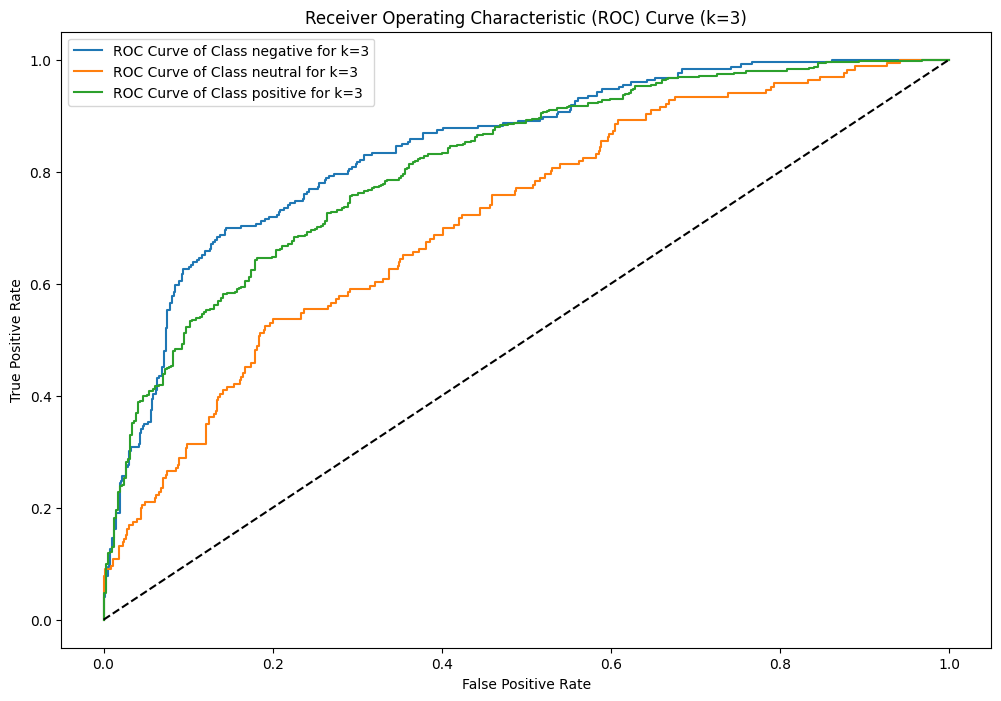

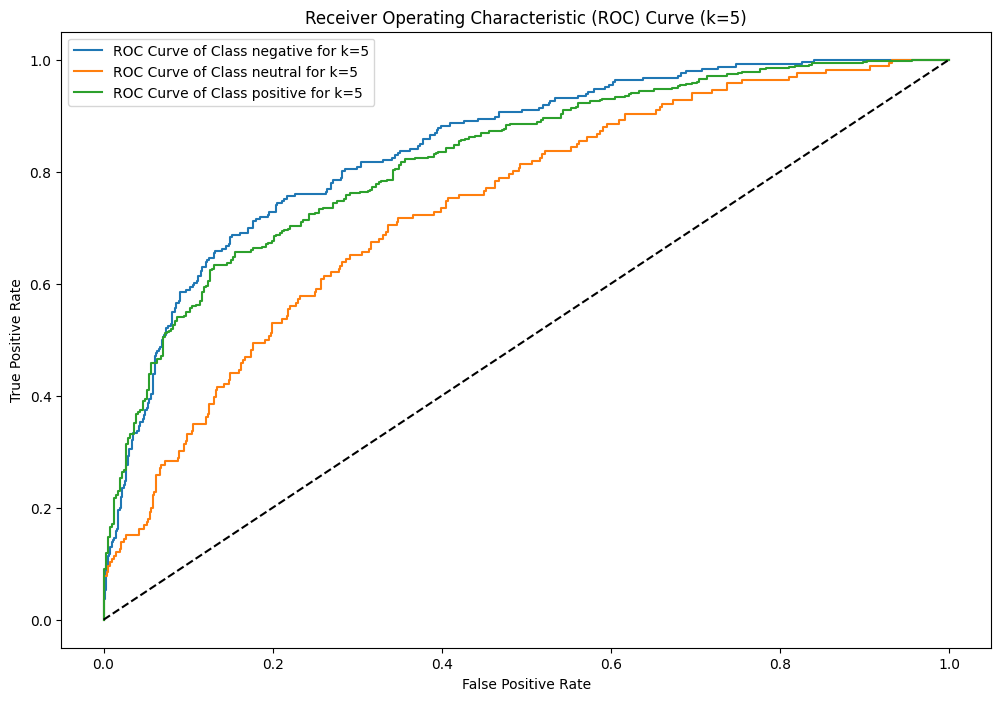

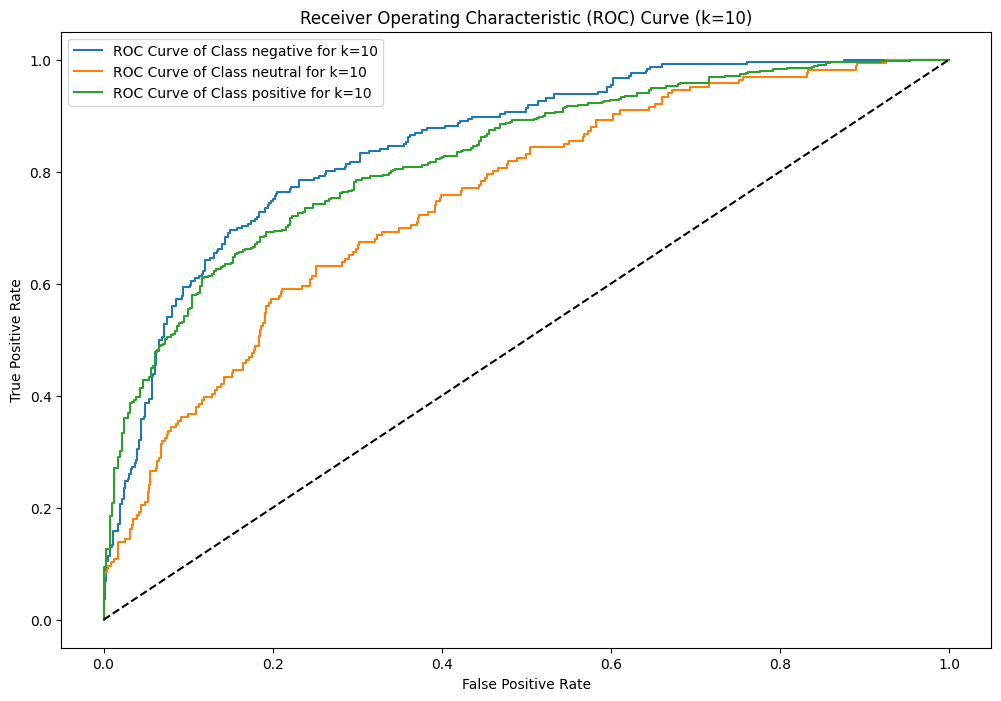

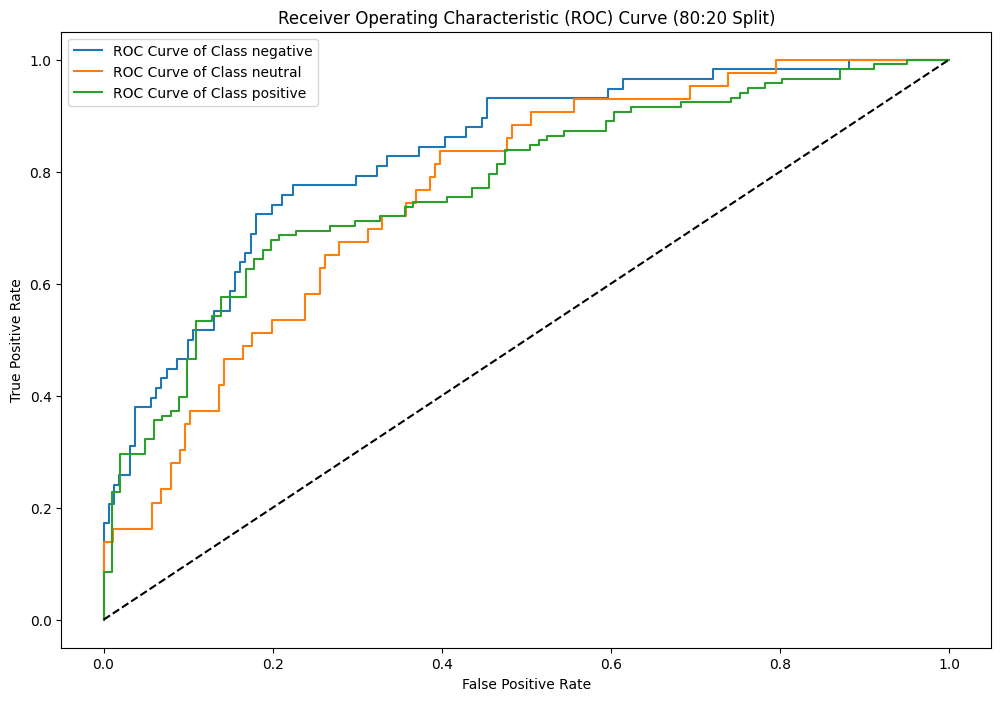

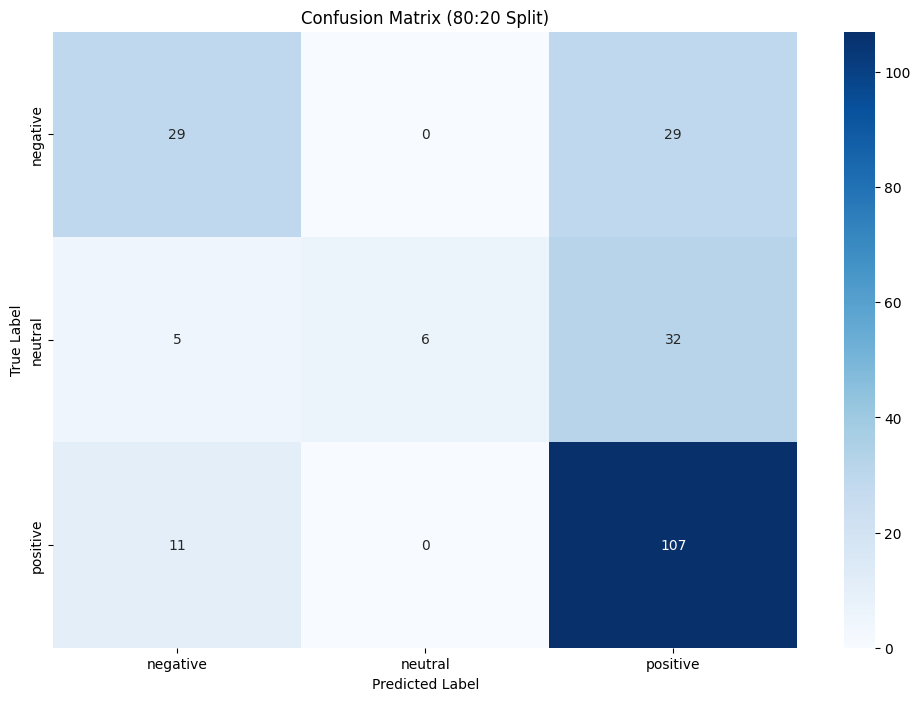

In [190]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, precision_score, recall_score, f1_score
from sklearn.preprocessing import label_binarize, LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# Membaca data dari file CSV
df = pd.read_csv(r'kualitas udara_processed_data_1.csv')

# Tangani nilai yang hilang dan konversi ke string
df['clean_text'] = df['clean_text'].fillna('').astype(str)

# Encode label sentimen menjadi angka
label_encoder = LabelEncoder()
df['sentiment_encoded'] = label_encoder.fit_transform(df['sentiment'])

# Memisahkan fitur dan label
X = df['clean_text']
y = df['sentiment_encoded']

# Pembagian data 80:20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Vectorisasi teks menggunakan TF-IDF dengan parameter tuning
tfidf_vectorizer = TfidfVectorizer(ngram_range=(1, 2), max_features=10000, min_df=3, max_df=0.8)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Inisialisasi model Naive Bayes
nb_model = MultinomialNB()

# Hyperparameter tuning dengan GridSearchCV
param_grid = {
    'alpha': [0.1, 0.5, 1.0, 2.0]
}
grid_search = GridSearchCV(nb_model, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train_tfidf, y_train)
best_nb_model = grid_search.best_estimator_

# Fungsi untuk menghitung metrik cross-validation
def evaluate_cross_validation(X, y, k_folds):
    skf = StratifiedKFold(n_splits=k_folds, shuffle=True, random_state=42)
    
    accuracies = []
    y_true = []
    y_pred = []
    y_prob = []
    
    # Track FPR and TPR for ROC curve plotting
    fpr_dict = {i: [] for i in range(len(label_encoder.classes_))}
    tpr_dict = {i: [] for i in range(len(label_encoder.classes_))}
    
    for train_index, test_index in skf.split(X, y):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        
        best_nb_model.fit(X_train, y_train)
        
        # Collect predictions and probabilities
        y_true.extend(y_test)
        y_pred.extend(best_nb_model.predict(X_test))
        y_prob.extend(best_nb_model.predict_proba(X_test))
        
        # Calculate accuracies
        train_acc = best_nb_model.score(X_train, y_train)
        test_acc = best_nb_model.score(X_test, y_test)
        accuracy = (train_acc + test_acc) / 2
        accuracies.append(accuracy)
    
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)
    y_prob = np.array(y_prob)
    
    # Collect FPR and TPR for ROC curve plotting
    y_true_bin = label_binarize(y_true, classes=np.arange(len(label_encoder.classes_)))
    y_prob_array = np.array(y_prob)
    
    for i in range(len(label_encoder.classes_)):
        fpr, tpr, _ = roc_curve(y_true_bin[:, i], y_prob_array[:, i])
        fpr_dict[i].append(fpr)
        tpr_dict[i].append(tpr)
    
    # Metrics
    accuracy = np.mean(accuracies)
    precision = precision_score(y_true, y_pred, average='weighted', zero_division=1)
    recall = recall_score(y_true, y_pred, average='weighted', zero_division=1)
    f1 = f1_score(y_true, y_pred, average='weighted', zero_division=1)
    roc_auc = roc_auc_score(label_binarize(y_true, classes=np.arange(len(label_encoder.classes_))), y_prob, multi_class='ovr')
    
    # Classification Report
    classification_rep = classification_report(y_true, y_pred, target_names=label_encoder.classes_, zero_division=1, output_dict=True)
    
    # Convert classification report to DataFrame
    class_report_df = pd.DataFrame(classification_rep).transpose()
    
    # Confusion Matrix
    conf_matrix = confusion_matrix(y_true, y_pred)
    
    return accuracy, precision, recall, f1, roc_auc, class_report_df, conf_matrix, y_true, y_prob, fpr_dict, tpr_dict

# Evaluasi dengan cross-validation 3, 5, dan 10 folds
roc_data = {}
results = []
for folds in [3, 5, 10]:
    accuracy, precision, recall, f1, roc_auc, class_report_df, conf_matrix, y_true, y_prob, fpr_dict, tpr_dict = evaluate_cross_validation(X_train_tfidf, y_train, folds)
    results.append({
        'Folds': folds,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1,
        'ROC-AUC': roc_auc
    })
    roc_data[folds] = (fpr_dict, tpr_dict)

# Tampilkan hasil dalam bentuk tabel
results_df = pd.DataFrame(results)
print("Summary Results:")
print(results_df[['Folds', 'Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC-AUC']])

# Melatih model dengan data 80:20
best_nb_model.fit(X_train_tfidf, y_train)
y_pred = best_nb_model.predict(X_test_tfidf)
y_prob = best_nb_model.predict_proba(X_test_tfidf)

# Metrik Naive Bayes dengan data 80:20
accuracy_80_20 = (y_test == y_pred).mean()
precision_80_20 = precision_score(y_test, y_pred, average='weighted', zero_division=1)
recall_80_20 = recall_score(y_test, y_pred, average='weighted', zero_division=1)
f1_80_20 = f1_score(y_test, y_pred, average='weighted', zero_division=1)
roc_auc_80_20 = roc_auc_score(label_binarize(y_test, classes=np.arange(len(label_encoder.classes_))), y_prob, multi_class='ovr')

# Classification Report
classification_rep_80_20 = classification_report(y_test, y_pred, target_names=label_encoder.classes_, zero_division=1, output_dict=True)
class_report_df_80_20 = pd.DataFrame(classification_rep_80_20).transpose()

# Confusion Matrix
conf_matrix_80_20 = confusion_matrix(y_test, y_pred)

# Tampilkan hasil untuk rasio 80:20
print("\nNaive Bayes Accuracy (80:20):", accuracy_80_20)
print("\nNaive Bayes Classification Report (80:20):")
print(class_report_df_80_20)
print("ROC-AUC Score (80:20):", roc_auc_80_20)

# Plot ROC Curve untuk setiap k (3, 5, 10)
for folds, (fpr_dict, tpr_dict) in roc_data.items():
    plt.figure(figsize=(12, 8))
    n_classes = len(label_encoder.classes_)
    for i in range(n_classes):
        mean_fpr = np.concatenate(fpr_dict[i])
        mean_tpr = np.concatenate(tpr_dict[i])
        plt.plot(mean_fpr, mean_tpr, label=f'ROC Curve of Class {label_encoder.classes_[i]} for k={folds}')
    
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'Receiver Operating Characteristic (ROC) Curve (k={folds})')
    plt.legend(loc='best')
    plt.show()

# Plot ROC Curve dan Confusion Matrix untuk data 80:20
# Binarize y_test for ROC Curve
y_test_bin = label_binarize(y_test, classes=np.arange(len(label_encoder.classes_)))

# Plot ROC Curve
plt.figure(figsize=(12, 8))
n_classes = len(label_encoder.classes_)
for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_prob[:, i])
    plt.plot(fpr, tpr, label=f'ROC Curve of Class {label_encoder.classes_[i]}')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve (80:20 Split)')
plt.legend(loc='best')
plt.show()

# Plot Confusion Matrix
plt.figure(figsize=(12, 8))
sns.heatmap(conf_matrix_80_20, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix (80:20 Split)')
plt.show()

90 - 10

Summary Results:
   Folds  Accuracy  Precision    Recall  F1-Score   ROC-AUC
0      3  0.819751   0.668370  0.681263  0.666925  0.814180
1      5  0.812383   0.662400  0.674134  0.655197  0.828707
2     10  0.809196   0.658577  0.676171  0.656549  0.828667

Naive Bayes Accuracy (90:10): 0.6090909090909091

Naive Bayes Classification Report (90:10):
              precision    recall  f1-score     support
negative       0.512821  0.800000  0.625000   25.000000
neutral        0.555556  0.208333  0.303030   24.000000
positive       0.677419  0.688525  0.682927   61.000000
accuracy       0.609091  0.609091  0.609091    0.609091
macro avg      0.581932  0.565619  0.536986  110.000000
weighted avg   0.613422  0.609091  0.586875  110.000000
ROC-AUC Score (90:10): 0.8019740137254546


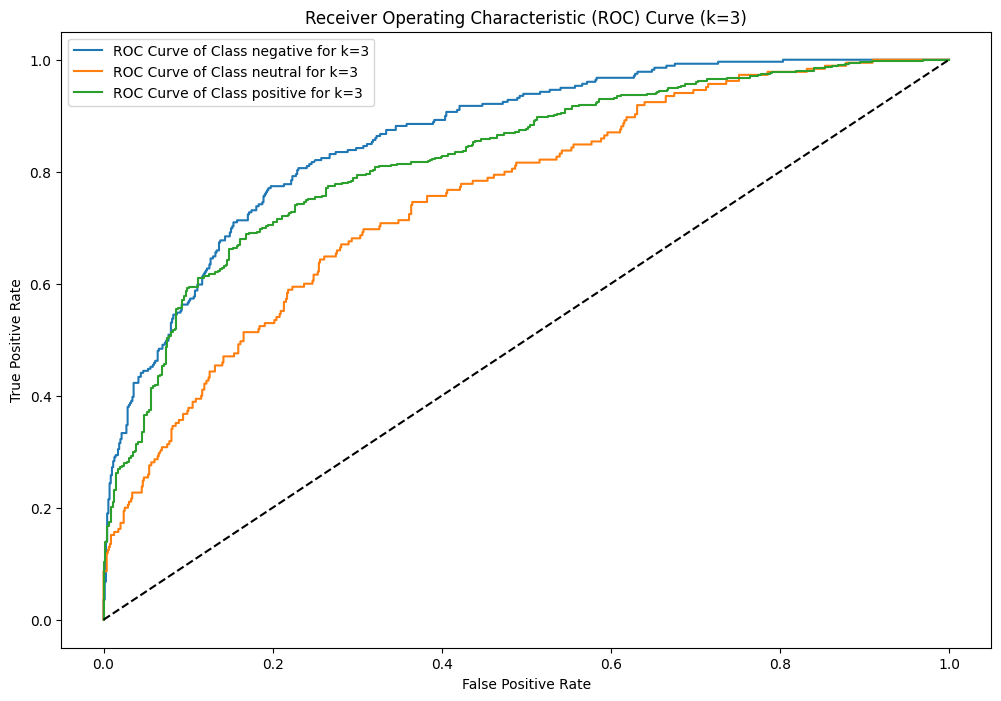

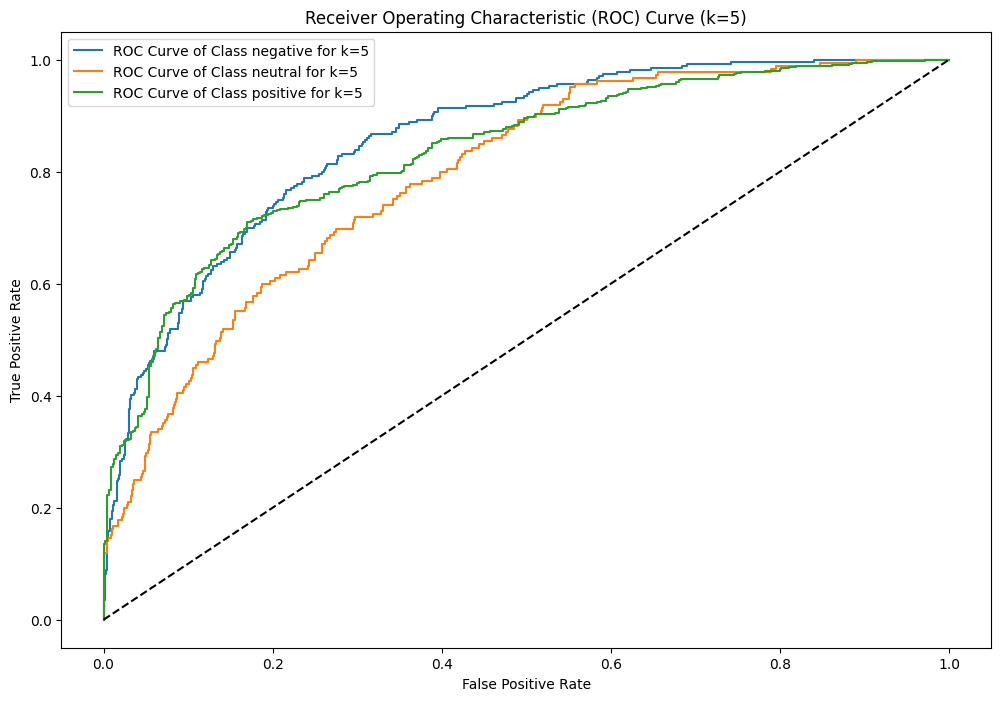

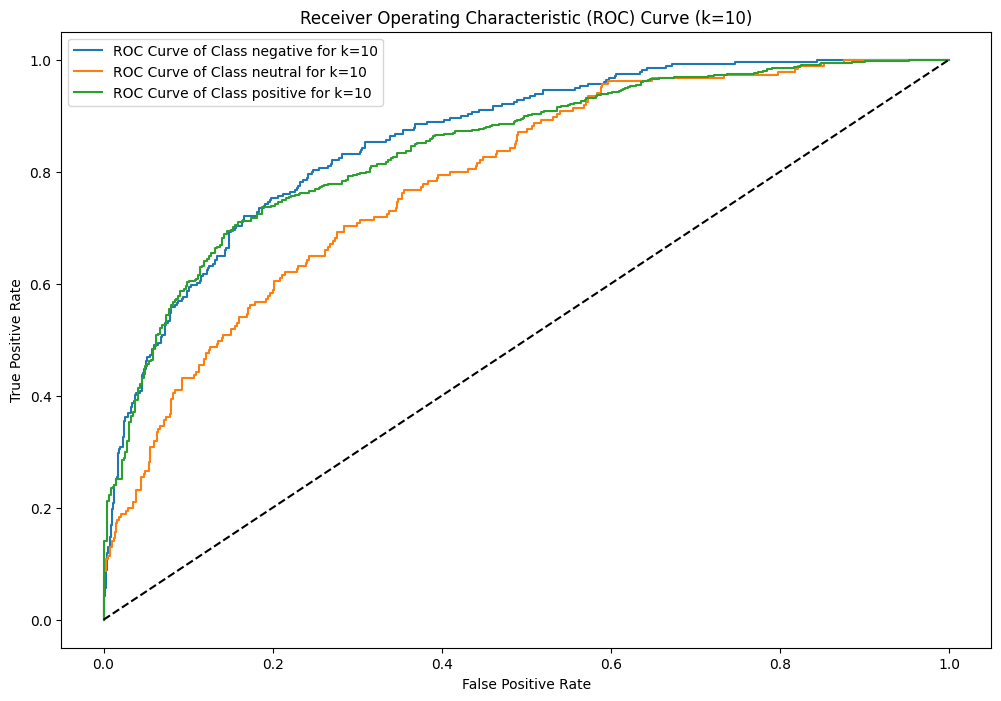

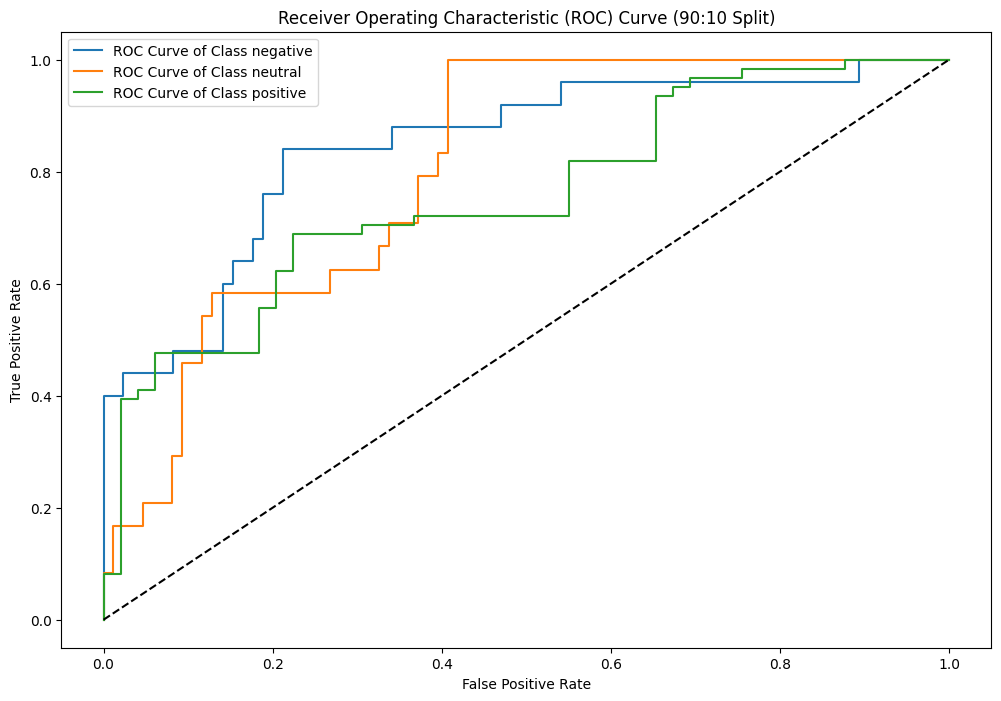

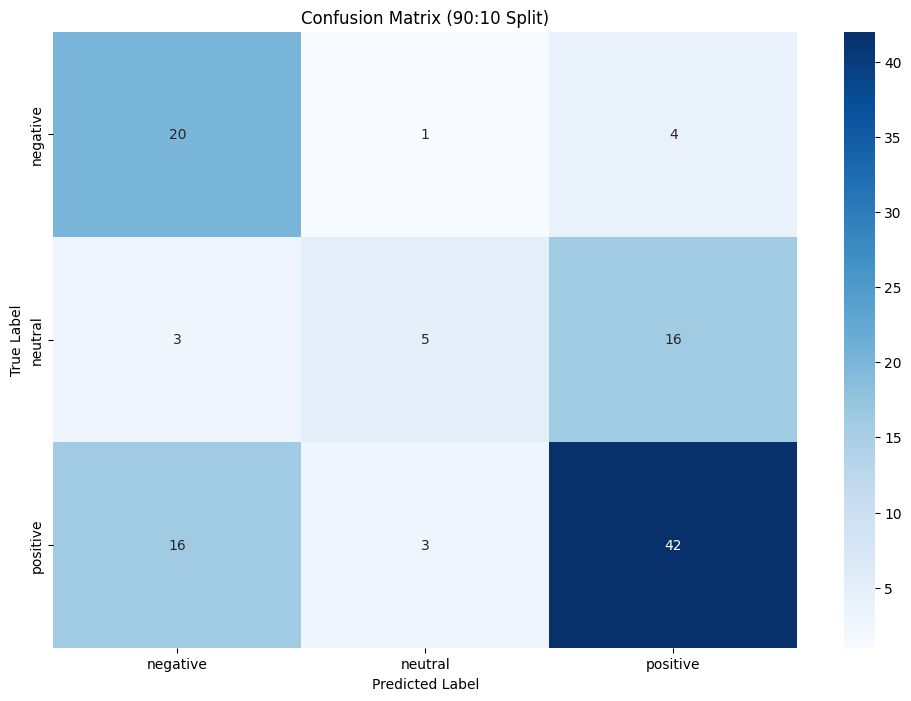

In [191]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, precision_score, recall_score, f1_score
from sklearn.preprocessing import label_binarize, LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# Membaca data dari file CSV
df = pd.read_csv(r'kualitas udara_processed_data_1.csv')

# Tangani nilai yang hilang dan konversi ke string
df['clean_text'] = df['clean_text'].fillna('').astype(str)

# Encode label sentimen menjadi angka
label_encoder = LabelEncoder()
df['sentiment_encoded'] = label_encoder.fit_transform(df['sentiment'])

# Memisahkan fitur dan label
X = df['clean_text']
y = df['sentiment_encoded']

# Pembagian data 90:10
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Vectorisasi teks menggunakan TF-IDF dengan parameter tuning
tfidf_vectorizer = TfidfVectorizer(ngram_range=(1, 2), max_features=10000, min_df=3, max_df=0.8)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Inisialisasi model Naive Bayes
nb_model = MultinomialNB()

# Hyperparameter tuning dengan GridSearchCV
param_grid = {
    'alpha': [0.1, 0.5, 1.0, 2.0]
}
grid_search = GridSearchCV(nb_model, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train_tfidf, y_train)
best_nb_model = grid_search.best_estimator_

# Fungsi untuk menghitung metrik cross-validation
def evaluate_cross_validation(X, y, k_folds):
    skf = StratifiedKFold(n_splits=k_folds, shuffle=True, random_state=42)
    
    accuracies = []
    y_true = []
    y_pred = []
    y_prob = []
    
    # Track FPR and TPR for ROC curve plotting
    fpr_dict = {i: [] for i in range(len(label_encoder.classes_))}
    tpr_dict = {i: [] for i in range(len(label_encoder.classes_))}
    
    for train_index, test_index in skf.split(X, y):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        
        best_nb_model.fit(X_train, y_train)
        
        # Collect predictions and probabilities
        y_true.extend(y_test)
        y_pred.extend(best_nb_model.predict(X_test))
        y_prob.extend(best_nb_model.predict_proba(X_test))
        
        # Calculate accuracies
        train_acc = best_nb_model.score(X_train, y_train)
        test_acc = best_nb_model.score(X_test, y_test)
        accuracy = (train_acc + test_acc) / 2
        accuracies.append(accuracy)
    
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)
    y_prob = np.array(y_prob)
    
    # Collect FPR and TPR for ROC curve plotting
    y_true_bin = label_binarize(y_true, classes=np.arange(len(label_encoder.classes_)))
    y_prob_array = np.array(y_prob)
    
    for i in range(len(label_encoder.classes_)):
        fpr, tpr, _ = roc_curve(y_true_bin[:, i], y_prob_array[:, i])
        fpr_dict[i].append(fpr)
        tpr_dict[i].append(tpr)
    
    # Metrics
    accuracy = np.mean(accuracies)
    precision = precision_score(y_true, y_pred, average='weighted', zero_division=1)
    recall = recall_score(y_true, y_pred, average='weighted', zero_division=1)
    f1 = f1_score(y_true, y_pred, average='weighted', zero_division=1)
    roc_auc = roc_auc_score(label_binarize(y_true, classes=np.arange(len(label_encoder.classes_))), y_prob, multi_class='ovr')
    
    # Classification Report
    classification_rep = classification_report(y_true, y_pred, target_names=label_encoder.classes_, zero_division=1, output_dict=True)
    
    # Convert classification report to DataFrame
    class_report_df = pd.DataFrame(classification_rep).transpose()
    
    # Confusion Matrix
    conf_matrix = confusion_matrix(y_true, y_pred)
    
    return accuracy, precision, recall, f1, roc_auc, class_report_df, conf_matrix, y_true, y_prob, fpr_dict, tpr_dict

# Evaluasi dengan cross-validation 3, 5, dan 10 folds
roc_data = {}
results = []
for folds in [3, 5, 10]:
    accuracy, precision, recall, f1, roc_auc, class_report_df, conf_matrix, y_true, y_prob, fpr_dict, tpr_dict = evaluate_cross_validation(X_train_tfidf, y_train, folds)
    results.append({
        'Folds': folds,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1,
        'ROC-AUC': roc_auc
    })
    roc_data[folds] = (fpr_dict, tpr_dict)

# Tampilkan hasil dalam bentuk tabel
results_df = pd.DataFrame(results)
print("Summary Results:")
print(results_df[['Folds', 'Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC-AUC']])

# Melatih model dengan data 90:10
best_nb_model.fit(X_train_tfidf, y_train)
y_pred = best_nb_model.predict(X_test_tfidf)
y_prob = best_nb_model.predict_proba(X_test_tfidf)

# Metrik Naive Bayes dengan data 90:10
accuracy_90_10 = (y_test == y_pred).mean()
precision_90_10 = precision_score(y_test, y_pred, average='weighted', zero_division=1)
recall_90_10 = recall_score(y_test, y_pred, average='weighted', zero_division=1)
f1_90_10 = f1_score(y_test, y_pred, average='weighted', zero_division=1)
roc_auc_90_10 = roc_auc_score(label_binarize(y_test, classes=np.arange(len(label_encoder.classes_))), y_prob, multi_class='ovr')

# Classification Report
classification_rep_90_10 = classification_report(y_test, y_pred, target_names=label_encoder.classes_, zero_division=1, output_dict=True)
class_report_df_90_10 = pd.DataFrame(classification_rep_90_10).transpose()

# Confusion Matrix
conf_matrix_90_10 = confusion_matrix(y_test, y_pred)

# Tampilkan hasil untuk rasio 90:10
print("\nNaive Bayes Accuracy (90:10):", accuracy_90_10)
print("\nNaive Bayes Classification Report (90:10):")
print(class_report_df_90_10)
print("ROC-AUC Score (90:10):", roc_auc_90_10)

# Plot ROC Curve untuk setiap k (3, 5, 10)
for folds, (fpr_dict, tpr_dict) in roc_data.items():
    plt.figure(figsize=(12, 8))
    n_classes = len(label_encoder.classes_)
    for i in range(n_classes):
        mean_fpr = np.concatenate(fpr_dict[i])
        mean_tpr = np.concatenate(tpr_dict[i])
        plt.plot(mean_fpr, mean_tpr, label=f'ROC Curve of Class {label_encoder.classes_[i]} for k={folds}')
    
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'Receiver Operating Characteristic (ROC) Curve (k={folds})')
    plt.legend(loc='best')
    plt.show()

# Plot ROC Curve dan Confusion Matrix untuk data 90:10
# Binarize y_test for ROC Curve
y_test_bin = label_binarize(y_test, classes=np.arange(len(label_encoder.classes_)))

# Plot ROC Curve
plt.figure(figsize=(12, 8))
n_classes = len(label_encoder.classes_)
for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_prob[:, i])
    plt.plot(fpr, tpr, label=f'ROC Curve of Class {label_encoder.classes_[i]}')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve (90:10 Split)')
plt.legend(loc='best')
plt.show()

# Plot Confusion Matrix
plt.figure(figsize=(12, 8))
sns.heatmap(conf_matrix_90_10, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix (90:10 Split)')
plt.show()

In [3]:
import pandas as pd

# Data hasil evaluasi
data = {
    "50:50": {
        "Folds": [3, 5, 10],
        "Accuracy": [0.761447, 0.761177, 0.760449],
        "Precision": [0.661856, 0.671842, 0.670038],
        "Recall": [0.653846, 0.663004, 0.666667],
        "F1-Score": [0.618200, 0.628776, 0.631461],
        "ROC-AUC": [0.777342, 0.792316, 0.800704]
    },
    "60:40": {
        "Folds": [3, 5, 10],
        "Accuracy": [0.763742, 0.767366, 0.764304],
        "Precision": [0.646545, 0.662655, 0.661099],
        "Recall": [0.661069, 0.671756, 0.674809],
        "F1-Score": [0.626683, 0.639846, 0.641731],
        "ROC-AUC": [0.790809, 0.799659, 0.800229]
    },
    "70:30": {
        "Folds": [3, 5, 10],
        "Accuracy": [0.814142, 0.802514, 0.799020],
        "Precision": [0.657663, 0.643348, 0.643428],
        "Recall": [0.671466, 0.659686, 0.659686],
        "F1-Score": [0.655471, 0.640846, 0.639779],
        "ROC-AUC": [0.804216, 0.808439, 0.804859]
    },
    "80:20": {
        "Folds": [3, 5, 10],
        "Accuracy": [0.767755, 0.764610, 0.764793],
        "Precision": [0.673838, 0.668787, 0.673390],
        "Recall": [0.666667, 0.664376, 0.668958],
        "F1-Score": [0.621657, 0.619510, 0.625612],
        "ROC-AUC": [0.790401, 0.800731, 0.808089]
    },
    "90:10": {
        "Folds": [3, 5, 10],
        "Accuracy": [0.819751, 0.812383, 0.809196],
        "Precision": [0.668370, 0.662400, 0.658577],
        "Recall": [0.681263, 0.674134, 0.676171],
        "F1-Score": [0.666925, 0.655197, 0.656549],
        "ROC-AUC": [0.814180, 0.828707, 0.828667]
    }
}

# Menggabungkan semua data menjadi satu DataFrame
combined_data = []
for ratio, results in data.items():
    df = pd.DataFrame(results)
    df["Ratio"] = ratio
    combined_data.append(df)

# Menggabungkan semua DataFrame menjadi satu
final_df = pd.concat(combined_data, ignore_index=True)

# Menyimpan DataFrame ke file Excel
final_df.to_excel('naive_bayes_combined_results.xlsx', index=False)

print("File Excel berhasil dibuat.")

File Excel berhasil dibuat.


In [6]:
import pandas as pd
import plotly.express as px

# Definisikan data
data = {
    'Folds': [3, 5, 10] * 5,
    'Accuracy': (
        [0.76, 0.76, 0.76] +
        [0.76, 0.77, 0.76] +
        [0.81, 0.80, 0.80] +
        [0.77, 0.76, 0.76] +
        [0.82, 0.81, 0.81]
    ),
    'Precision': (
        [0.66, 0.67, 0.67] +
        [0.65, 0.66, 0.66] +
        [0.66, 0.64, 0.64] +
        [0.67, 0.67, 0.67] +
        [0.67, 0.66, 0.66]
    ),
    'Recall': (
        [0.65, 0.66, 0.67] +
        [0.66, 0.67, 0.67] +
        [0.67, 0.66, 0.66] +
        [0.67, 0.67, 0.67] +
        [0.68, 0.67, 0.68]
    ),
    'F1-Score': (
        [0.62, 0.63, 0.63] +
        [0.63, 0.64, 0.64] +
        [0.66, 0.64, 0.64] +
        [0.62, 0.62, 0.63] +
        [0.67, 0.66, 0.66]
    ),
    'ROC-AUC': (
        [0.78, 0.79, 0.80] +
        [0.79, 0.80, 0.80] +
        [0.80, 0.81, 0.80] +
        [0.79, 0.80, 0.81] +
        [0.81, 0.83, 0.83]
    ),
    'Split': (
        ['50:50'] * 3 + ['60:40'] * 3 + ['70:30'] * 3 +
        ['80:20'] * 3 + ['90:10'] * 3
    )
}

# Buat DataFrame dari data
df_combined = pd.DataFrame(data)

# Buat kolom gabungan untuk nilai Folds dan Split
df_combined['Folds_Split'] = df_combined['Folds'].astype(str) + " (Split=" + df_combined['Split'] + ")"

# Ubah DataFrame ke format long
df_melted = df_combined.melt(id_vars=['Folds_Split'], var_name='Metric', value_name='Score')

# Buat plot batang menggunakan Plotly
fig = px.bar(df_melted, x='Folds_Split', y='Score', color='Metric', barmode='group',
            title='Performance Metrics by Folds and Train-Test Split Ratio',
            labels={'Folds_Split': 'Folds and Train-Test Split Ratio', 'Score': 'Score'},
            color_discrete_sequence=px.colors.qualitative.Vivid)

# Perbarui tata letak agar lebih mudah dibaca
fig.update_layout(xaxis_tickangle=-45)

# Simpan plot sebagai file HTML
fig.write_html("performance_metrics.html")

# Tampilkan plot
fig.show()

DECISION TREE

-->DECISION TREE 50:50

Summary Results:
   Folds  Accuracy  Precision    Recall  F1-Score   ROC-AUC
0      3  0.684982   0.611119  0.602564  0.562098  0.643069
1      5  0.684980   0.637005  0.633700  0.583795  0.688976
2     10  0.677655   0.654417  0.633700  0.591570  0.655520

Decision Tree Accuracy (50:50): 0.6355311355311355

Decision Tree Classification Report (50:50):
              precision    recall  f1-score     support
negative       0.805195  0.446043  0.574074  139.000000
neutral        0.512821  0.173913  0.259740  115.000000
positive       0.616279  0.907534  0.734072  292.000000
accuracy       0.635531  0.635531  0.635531    0.635531
macro avg      0.644765  0.509163  0.522629  546.000000
weighted avg   0.642582  0.635531  0.593435  546.000000
ROC-AUC Score (50:50): 0.678867864710628


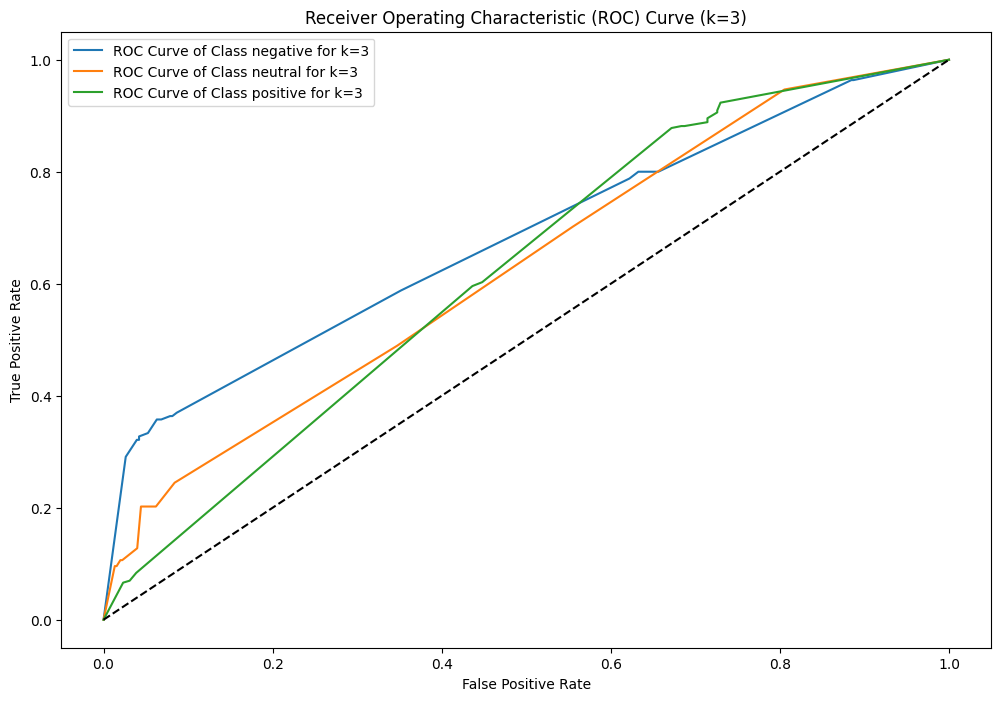

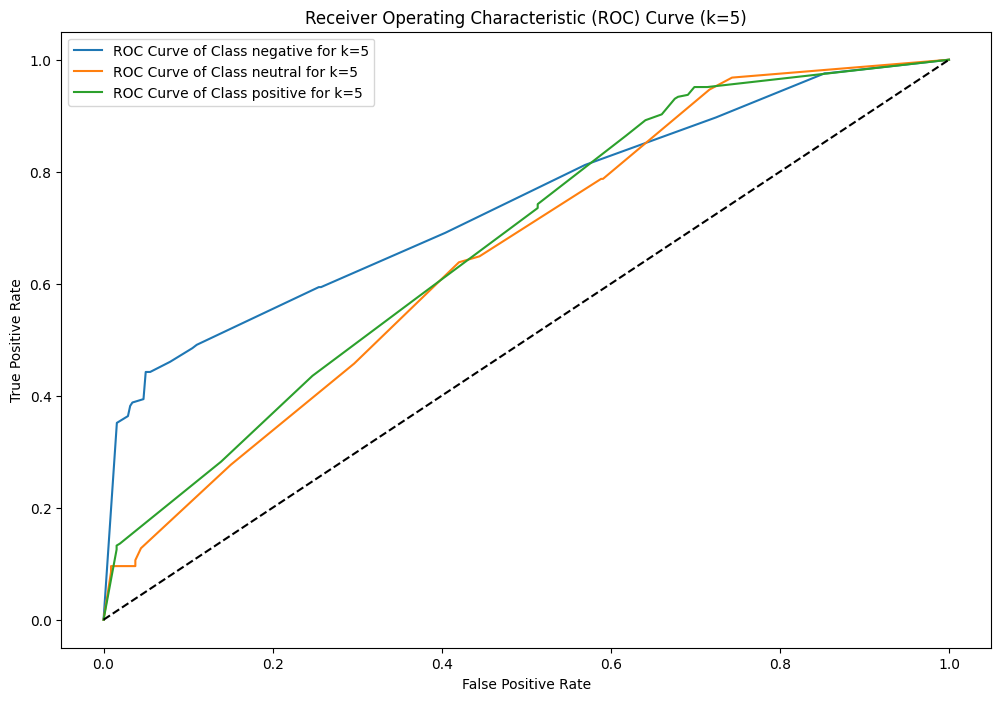

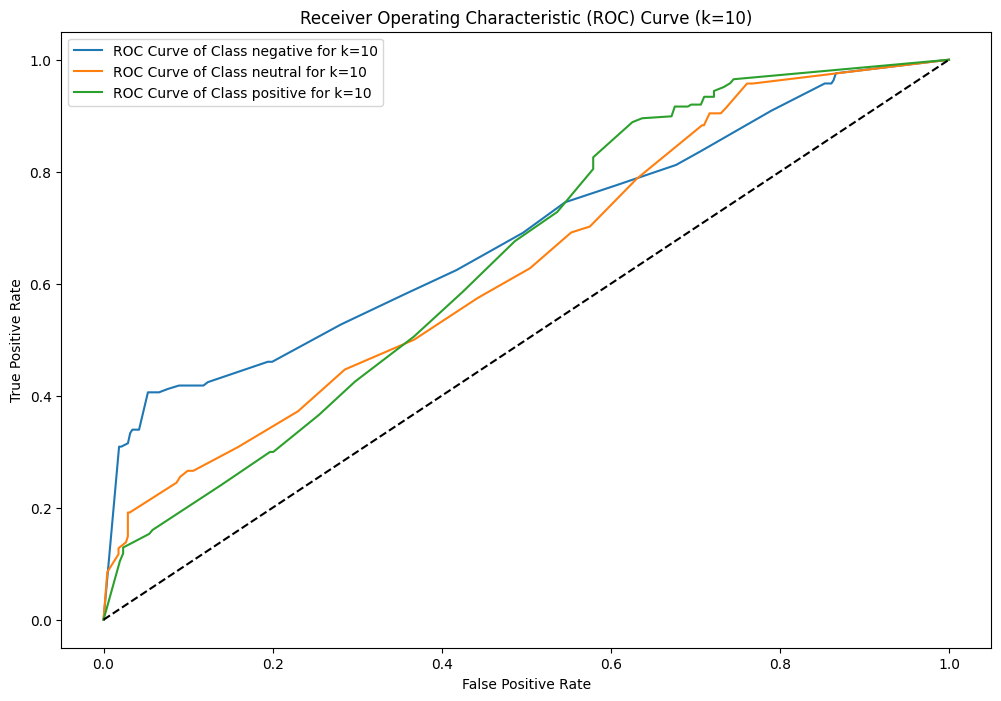

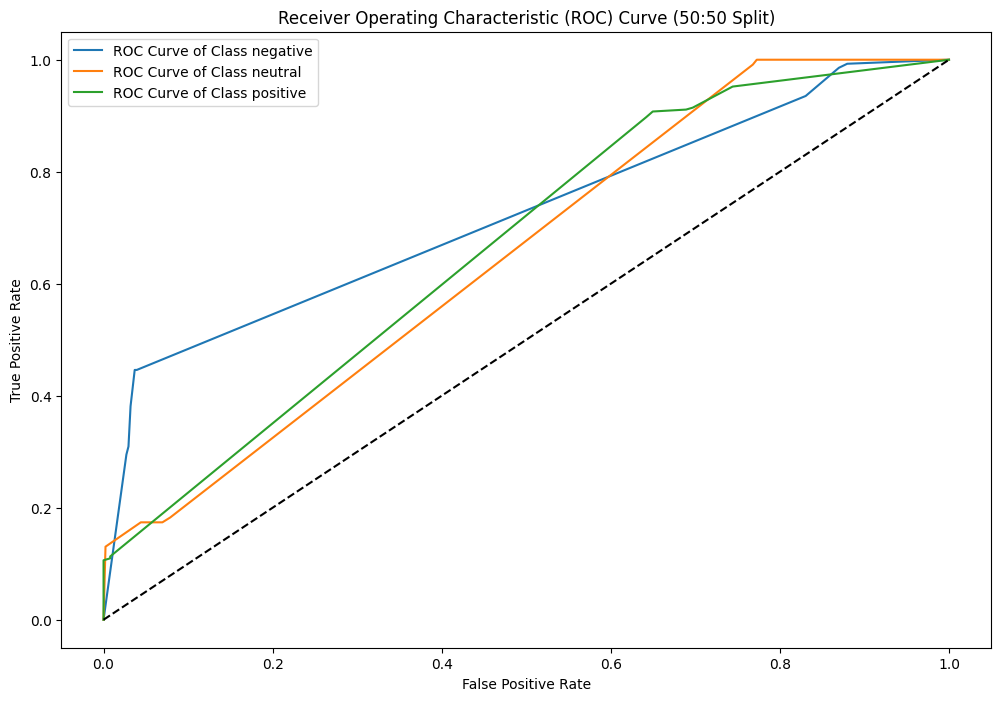

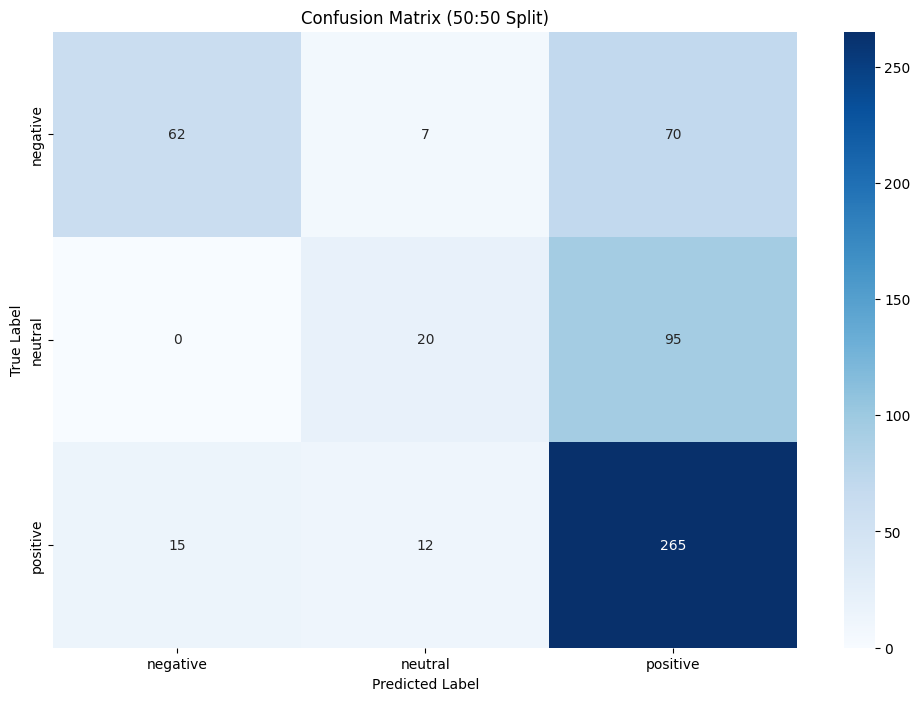

In [181]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, precision_score, recall_score, f1_score
from sklearn.preprocessing import label_binarize, LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# Membaca data dari file CSV
df = pd.read_csv(r'kualitas udara_processed_data_1.csv')

# Tangani nilai yang hilang dan konversi ke string
df['clean_text'] = df['clean_text'].fillna('').astype(str)

# Encode label sentimen menjadi angka
label_encoder = LabelEncoder()
df['sentiment_encoded'] = label_encoder.fit_transform(df['sentiment'])

# Memisahkan fitur dan label
X = df['clean_text']
y = df['sentiment_encoded']

# Pembagian data 50:50
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

# Vectorisasi teks menggunakan TF-IDF
tfidf_vectorizer = TfidfVectorizer(ngram_range=(1, 2), max_features=10000, min_df=3, max_df=0.8)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Inisialisasi model Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)

# Hyperparameter tuning dengan GridSearchCV
param_grid = {
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
grid_search = GridSearchCV(dt_model, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train_tfidf, y_train)
best_dt_model = grid_search.best_estimator_

# Fungsi untuk menghitung metrik cross-validation
def evaluate_cross_validation(X, y, k_folds):
    skf = StratifiedKFold(n_splits=k_folds, shuffle=True, random_state=42)
    
    accuracies = []
    y_true_list = []
    y_pred_list = []
    y_prob_list = []
    
    # Track FPR and TPR for ROC curve plotting
    fpr_dict = {i: [] for i in range(len(label_encoder.classes_))}
    tpr_dict = {i: [] for i in range(len(label_encoder.classes_))}
    
    for train_index, test_index in skf.split(X, y):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        
        best_dt_model.fit(X_train, y_train)
        
        # Collect predictions and probabilities
        y_true_list.append(y_test.to_numpy())
        y_pred_list.append(best_dt_model.predict(X_test))
        y_prob_list.append(best_dt_model.predict_proba(X_test))
    
    # Concatenate arrays
    y_true = np.concatenate(y_true_list)
    y_pred = np.concatenate(y_pred_list)
    y_prob = np.concatenate(y_prob_list)

    # Collect FPR and TPR for ROC curve plotting
    y_test_bin = label_binarize(y_true, classes=np.arange(len(label_encoder.classes_)))
    y_prob_array = np.array(y_prob)
    
    for i in range(len(label_encoder.classes_)):
        fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_prob_array[:, i])
        fpr_dict[i].append(fpr)
        tpr_dict[i].append(tpr)
    
    # Metrics
    accuracy = np.mean([best_dt_model.score(X[train_index], y.iloc[train_index]) for train_index, _ in skf.split(X, y)])
    precision = precision_score(y_true, y_pred, average='weighted', zero_division=1)
    recall = recall_score(y_true, y_pred, average='weighted', zero_division=1)
    f1 = f1_score(y_true, y_pred, average='weighted', zero_division=1)
    roc_auc = roc_auc_score(label_binarize(y_true, classes=np.arange(len(label_encoder.classes_))), y_prob, multi_class='ovr')
    
    # Classification Report
    classification_rep = classification_report(y_true, y_pred, target_names=label_encoder.classes_, zero_division=1, output_dict=True)
    
    # Convert classification report to DataFrame
    class_report_df = pd.DataFrame(classification_rep).transpose()
    
    # Confusion Matrix
    conf_matrix = confusion_matrix(y_true, y_pred)
    
    return accuracy, precision, recall, f1, roc_auc, class_report_df, conf_matrix, y_true, y_prob, fpr_dict, tpr_dict

# Evaluasi dengan cross-validation 3, 5, dan 10 folds
roc_data = {}
results = []
for folds in [3, 5, 10]:
    accuracy, precision, recall, f1, roc_auc, class_report_df, conf_matrix, y_true, y_prob, fpr_dict, tpr_dict = evaluate_cross_validation(X_train_tfidf, y_train, folds)
    results.append({
        'Folds': folds,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1,
        'ROC-AUC': roc_auc
    })
    roc_data[folds] = (fpr_dict, tpr_dict)

# Tampilkan hasil dalam bentuk tabel
results_df = pd.DataFrame(results)
print("Summary Results:")
print(results_df[['Folds', 'Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC-AUC']])

# Melatih model dengan data 50:50
best_dt_model.fit(X_train_tfidf, y_train)
y_pred = best_dt_model.predict(X_test_tfidf)
y_prob = best_dt_model.predict_proba(X_test_tfidf)

# Metrik Decision Tree dengan data 50:50
accuracy_50_50 = (y_test == y_pred).mean()
precision_50_50 = precision_score(y_test, y_pred, average='weighted', zero_division=1)
recall_50_50 = recall_score(y_test, y_pred, average='weighted', zero_division=1)
f1_50_50 = f1_score(y_test, y_pred, average='weighted', zero_division=1)
roc_auc_50_50 = roc_auc_score(label_binarize(y_test, classes=np.arange(len(label_encoder.classes_))), y_prob, multi_class='ovr')

# Classification Report
classification_rep_50_50 = classification_report(y_test, y_pred, target_names=label_encoder.classes_, zero_division=1, output_dict=True)
class_report_df_50_50 = pd.DataFrame(classification_rep_50_50).transpose()

# Confusion Matrix
conf_matrix_50_50 = confusion_matrix(y_test, y_pred)

# Tampilkan hasil untuk rasio 50:50
print("\nDecision Tree Accuracy (50:50):", accuracy_50_50)
print("\nDecision Tree Classification Report (50:50):")
print(class_report_df_50_50)
print("ROC-AUC Score (50:50):", roc_auc_50_50)

# Plot ROC Curve untuk setiap k (3, 5, 10)
for folds, (fpr_dict, tpr_dict) in roc_data.items():
    plt.figure(figsize=(12, 8))
    n_classes = len(label_encoder.classes_)
    for i in range(n_classes):
        mean_fpr = np.concatenate(fpr_dict[i])
        mean_tpr = np.concatenate(tpr_dict[i])
        plt.plot(mean_fpr, mean_tpr, label=f'ROC Curve of Class {label_encoder.classes_[i]} for k={folds}')
    
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'Receiver Operating Characteristic (ROC) Curve (k={folds})')
    plt.legend(loc='best')
    plt.show()

# Plot ROC Curve dan Confusion Matrix untuk data 50:50
# Binarize y_test for ROC Curve
y_test_bin = label_binarize(y_test, classes=np.arange(len(label_encoder.classes_)))

# Plot ROC Curve
plt.figure(figsize=(12, 8))
n_classes = len(label_encoder.classes_)
for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_prob[:, i])
    plt.plot(fpr, tpr, label=f'ROC Curve of Class {label_encoder.classes_[i]}')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve (50:50 Split)')
plt.legend(loc='best')
plt.show()

# Plot Confusion Matrix
plt.figure(figsize=(12, 8))
sns.heatmap(conf_matrix_50_50, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix (50:50 Split)')
plt.show()

-->DECISION TREE: 60:40

Summary Results:
   Folds  Accuracy  Precision    Recall  F1-Score   ROC-AUC
0      3  0.685482   0.631447  0.615267  0.570408  0.677799
1      5  0.694656   0.645823  0.613740  0.563163  0.678606
2     10  0.705341   0.660206  0.625954  0.573534  0.683154

Decision Tree Accuracy (60:40): 0.6292906178489702

Decision Tree Classification Report (60:40):
              precision    recall  f1-score     support
negative       0.806452  0.442478  0.571429  113.000000
neutral        0.468750  0.164835  0.243902   91.000000
positive       0.612245  0.901288  0.729167  233.000000
accuracy       0.629291  0.629291  0.629291    0.629291
macro avg      0.629149  0.502867  0.514833  437.000000
weighted avg   0.632582  0.629291  0.587328  437.000000
ROC-AUC Score (60:40): 0.6756577150214982


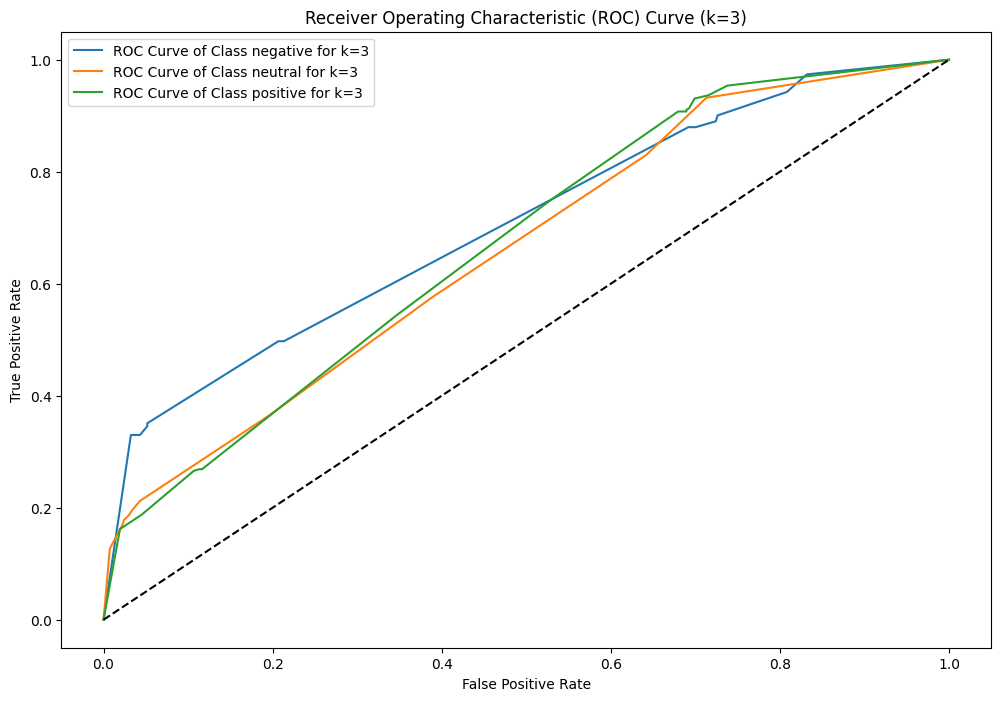

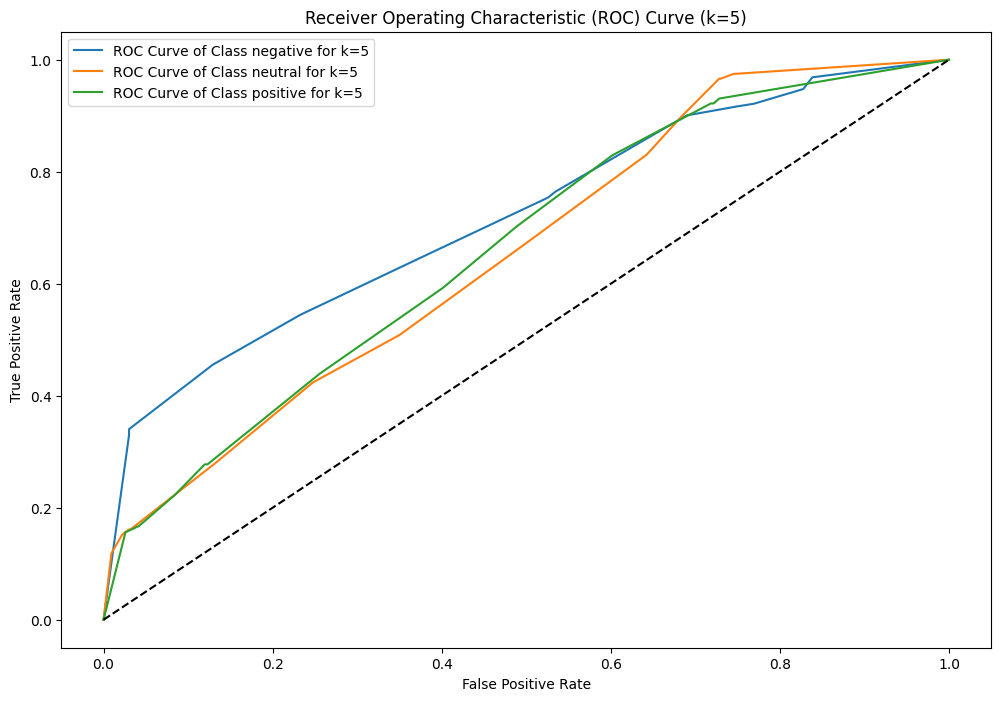

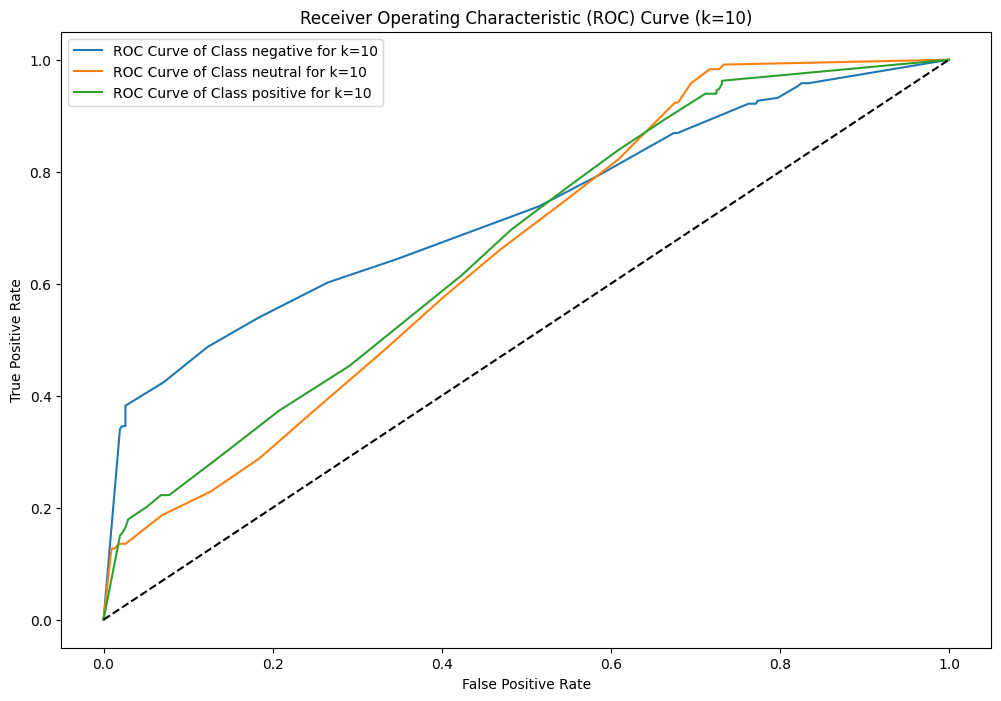

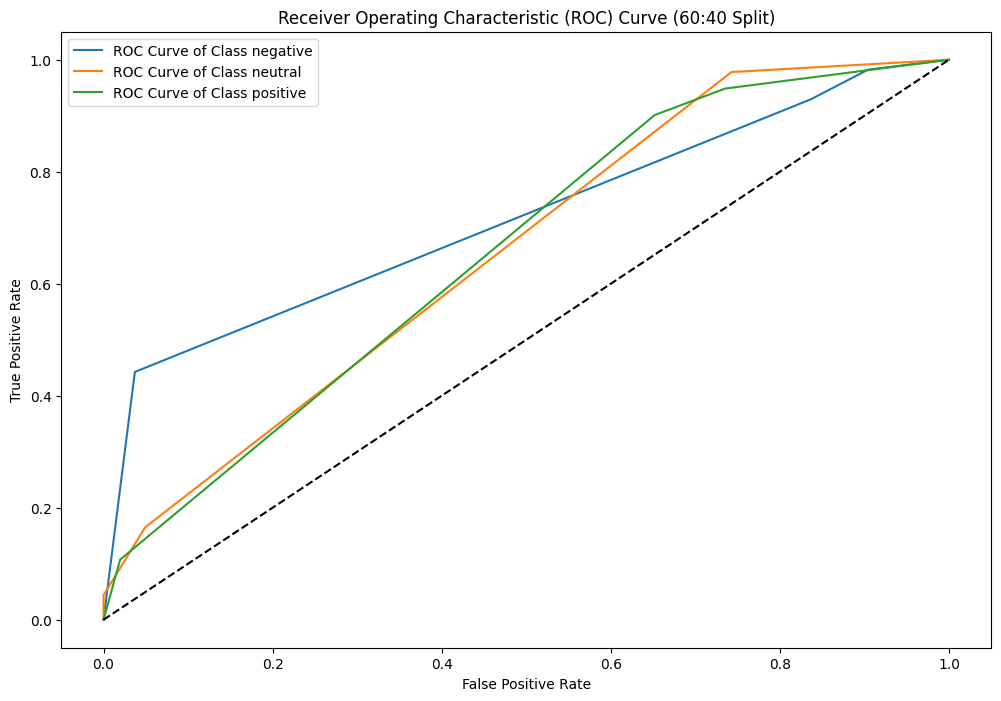

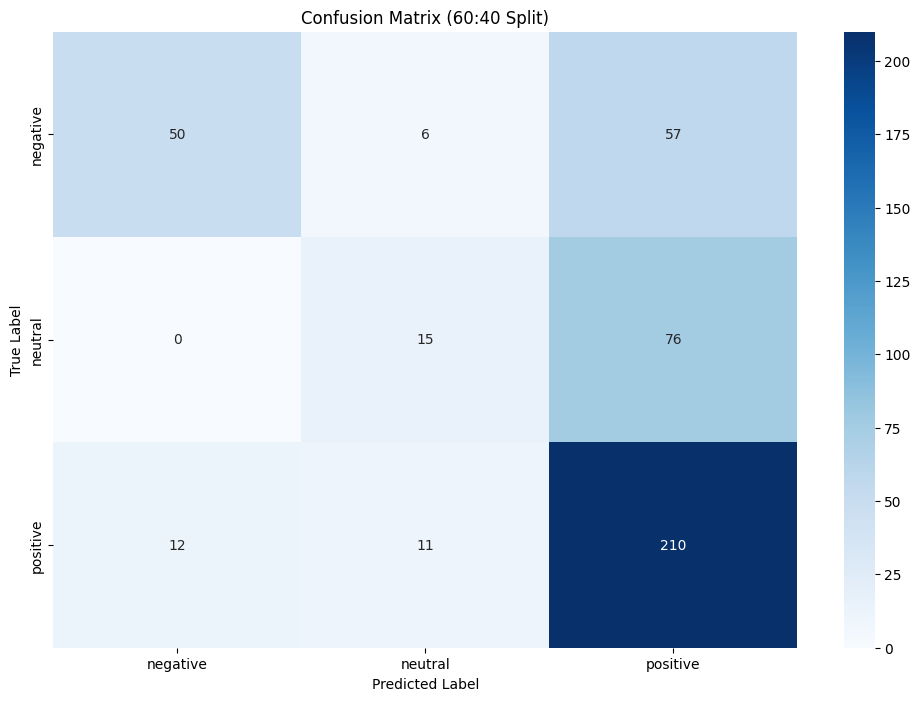

In [180]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, precision_score, recall_score, f1_score
from sklearn.preprocessing import label_binarize, LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# Membaca data dari file CSV
df = pd.read_csv(r'kualitas udara_processed_data_1.csv')

# Tangani nilai yang hilang dan konversi ke string
df['clean_text'] = df['clean_text'].fillna('').astype(str)

# Encode label sentimen menjadi angka
label_encoder = LabelEncoder()
df['sentiment_encoded'] = label_encoder.fit_transform(df['sentiment'])

# Memisahkan fitur dan label
X = df['clean_text']
y = df['sentiment_encoded']

# Pembagian data 60:40
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# Vectorisasi teks menggunakan TF-IDF
tfidf_vectorizer = TfidfVectorizer(ngram_range=(1, 2), max_features=10000, min_df=3, max_df=0.8)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Inisialisasi model Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)

# Hyperparameter tuning dengan GridSearchCV
param_grid = {
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
grid_search = GridSearchCV(dt_model, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train_tfidf, y_train)
best_dt_model = grid_search.best_estimator_

# Fungsi untuk menghitung metrik cross-validation
def evaluate_cross_validation(X, y, k_folds):
    skf = StratifiedKFold(n_splits=k_folds, shuffle=True, random_state=42)
    
    accuracies = []
    y_true_list = []
    y_pred_list = []
    y_prob_list = []
    
    # Track FPR and TPR for ROC curve plotting
    fpr_dict = {i: [] for i in range(len(label_encoder.classes_))}
    tpr_dict = {i: [] for i in range(len(label_encoder.classes_))}
    
    for train_index, test_index in skf.split(X, y):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        
        best_dt_model.fit(X_train, y_train)
        
        # Collect predictions and probabilities
        y_true_list.append(y_test.to_numpy())
        y_pred_list.append(best_dt_model.predict(X_test))
        y_prob_list.append(best_dt_model.predict_proba(X_test))
    
    # Concatenate arrays
    y_true = np.concatenate(y_true_list)
    y_pred = np.concatenate(y_pred_list)
    y_prob = np.concatenate(y_prob_list)

    # Collect FPR and TPR for ROC curve plotting
    y_test_bin = label_binarize(y_true, classes=np.arange(len(label_encoder.classes_)))
    y_prob_array = np.array(y_prob)
    
    for i in range(len(label_encoder.classes_)):
        fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_prob_array[:, i])
        fpr_dict[i].append(fpr)
        tpr_dict[i].append(tpr)
    
    # Metrics
    accuracy = np.mean([best_dt_model.score(X[train_index], y.iloc[train_index]) for train_index, _ in skf.split(X, y)])
    precision = precision_score(y_true, y_pred, average='weighted', zero_division=1)
    recall = recall_score(y_true, y_pred, average='weighted', zero_division=1)
    f1 = f1_score(y_true, y_pred, average='weighted', zero_division=1)
    roc_auc = roc_auc_score(label_binarize(y_true, classes=np.arange(len(label_encoder.classes_))), y_prob, multi_class='ovr')
    
    # Classification Report
    classification_rep = classification_report(y_true, y_pred, target_names=label_encoder.classes_, zero_division=1, output_dict=True)
    
    # Convert classification report to DataFrame
    class_report_df = pd.DataFrame(classification_rep).transpose()
    
    # Confusion Matrix
    conf_matrix = confusion_matrix(y_true, y_pred)
    
    return accuracy, precision, recall, f1, roc_auc, class_report_df, conf_matrix, y_true, y_prob, fpr_dict, tpr_dict

# Evaluasi dengan cross-validation 3, 5, dan 10 folds
roc_data = {}
results = []
for folds in [3, 5, 10]:
    accuracy, precision, recall, f1, roc_auc, class_report_df, conf_matrix, y_true, y_prob, fpr_dict, tpr_dict = evaluate_cross_validation(X_train_tfidf, y_train, folds)
    results.append({
        'Folds': folds,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1,
        'ROC-AUC': roc_auc
    })
    roc_data[folds] = (fpr_dict, tpr_dict)

# Tampilkan hasil dalam bentuk tabel
results_df = pd.DataFrame(results)
print("Summary Results:")
print(results_df[['Folds', 'Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC-AUC']])

# Melatih model dengan data 60:40
best_dt_model.fit(X_train_tfidf, y_train)
y_pred = best_dt_model.predict(X_test_tfidf)
y_prob = best_dt_model.predict_proba(X_test_tfidf)

# Metrik Decision Tree dengan data 60:40
accuracy_60_40 = (y_test == y_pred).mean()
precision_60_40 = precision_score(y_test, y_pred, average='weighted', zero_division=1)
recall_60_40 = recall_score(y_test, y_pred, average='weighted', zero_division=1)
f1_60_40 = f1_score(y_test, y_pred, average='weighted', zero_division=1)
roc_auc_60_40 = roc_auc_score(label_binarize(y_test, classes=np.arange(len(label_encoder.classes_))), y_prob, multi_class='ovr')

# Classification Report
classification_rep_60_40 = classification_report(y_test, y_pred, target_names=label_encoder.classes_, zero_division=1, output_dict=True)
class_report_df_60_40 = pd.DataFrame(classification_rep_60_40).transpose()

# Confusion Matrix
conf_matrix_60_40 = confusion_matrix(y_test, y_pred)

# Tampilkan hasil untuk rasio 60:40
print("\nDecision Tree Accuracy (60:40):", accuracy_60_40)
print("\nDecision Tree Classification Report (60:40):")
print(class_report_df_60_40)
print("ROC-AUC Score (60:40):", roc_auc_60_40)

# Plot ROC Curve untuk setiap k (2, 5, 10)
for folds, (fpr_dict, tpr_dict) in roc_data.items():
    plt.figure(figsize=(12, 8))
    n_classes = len(label_encoder.classes_)
    for i in range(n_classes):
        mean_fpr = np.concatenate(fpr_dict[i])
        mean_tpr = np.concatenate(tpr_dict[i])
        plt.plot(mean_fpr, mean_tpr, label=f'ROC Curve of Class {label_encoder.classes_[i]} for k={folds}')
    
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'Receiver Operating Characteristic (ROC) Curve (k={folds})')
    plt.legend(loc='best')
    plt.show()

# Plot ROC Curve dan Confusion Matrix untuk data 60:40
# Binarize y_test for ROC Curve
y_test_bin = label_binarize(y_test, classes=np.arange(len(label_encoder.classes_)))

# Plot ROC Curve
plt.figure(figsize=(12, 8))
n_classes = len(label_encoder.classes_)
for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_prob[:, i])
    plt.plot(fpr, tpr, label=f'ROC Curve of Class {label_encoder.classes_[i]}')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve (60:40 Split)')
plt.legend(loc='best')
plt.show()

# Plot Confusion Matrix
plt.figure(figsize=(12, 8))
sns.heatmap(conf_matrix_60_40, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix (60:40 Split)')
plt.show()

-->DECISION TREE: 70:30

Summary Results:
   Folds  Accuracy  Precision    Recall  F1-Score   ROC-AUC
0      3  0.664907   0.639275  0.620419  0.565600  0.681723
1      5  0.658377   0.659370  0.623037  0.560960  0.715358
2     10  0.660995   0.646095  0.619110  0.556523  0.696837

Decision Tree Accuracy (70:30): 0.5853658536585366

Decision Tree Classification Report (70:30):
              precision    recall  f1-score     support
negative       0.688889  0.360465  0.473282   86.000000
neutral        0.600000  0.044118  0.082192   68.000000
positive       0.568345  0.908046  0.699115  174.000000
accuracy       0.585366  0.585366  0.585366    0.585366
macro avg      0.619078  0.437543  0.418196  328.000000
weighted avg   0.606514  0.585366  0.512004  328.000000
ROC-AUC Score (70:30): 0.7126356748753174


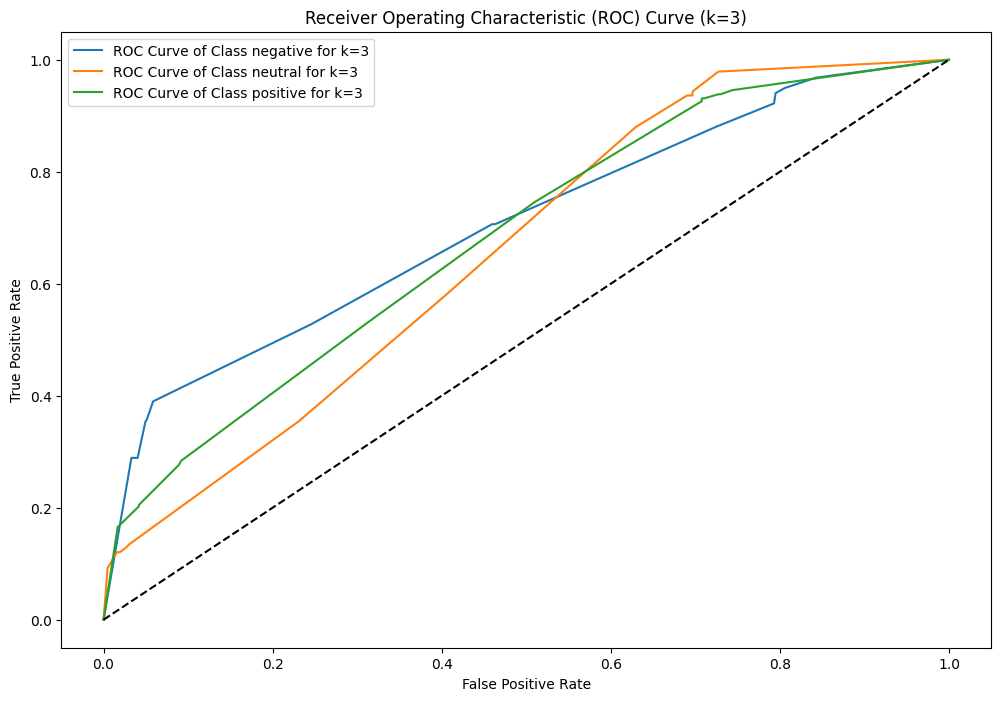

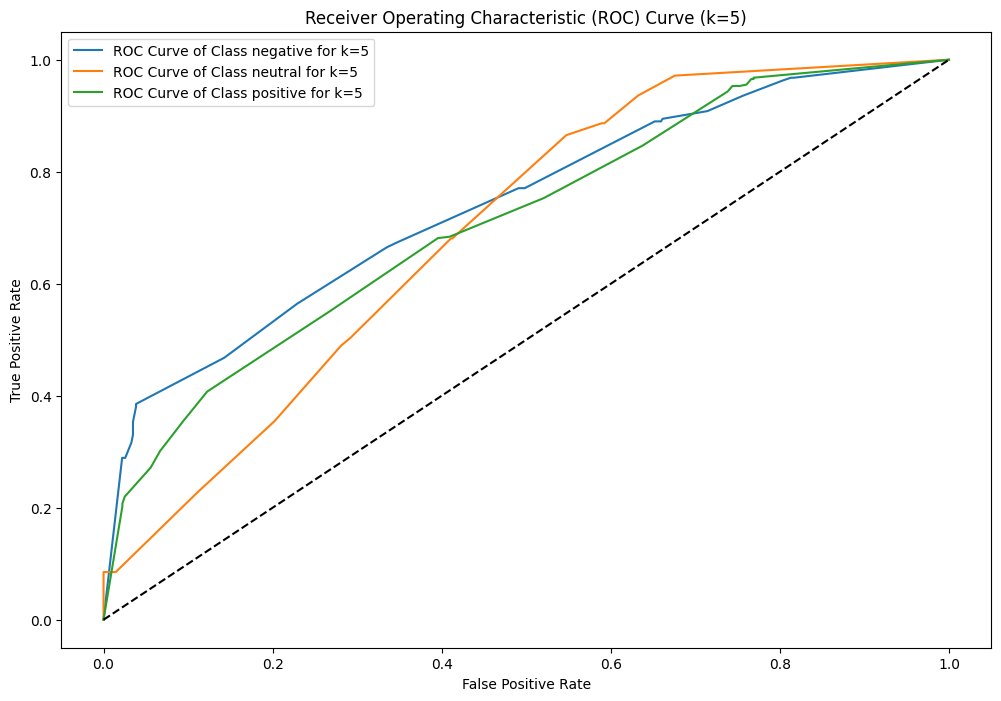

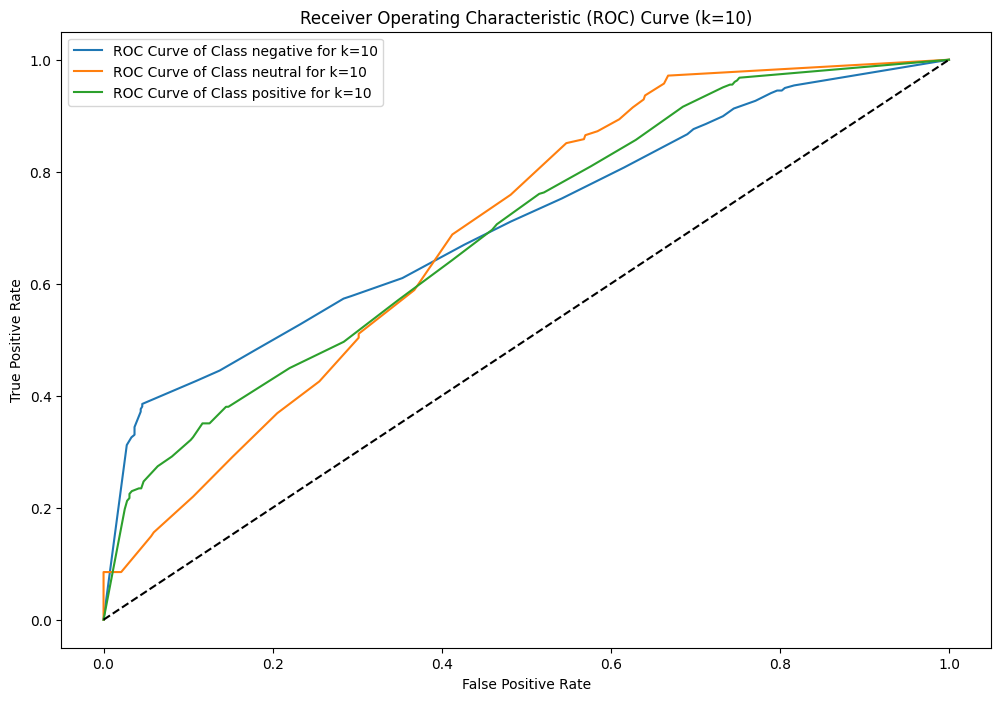

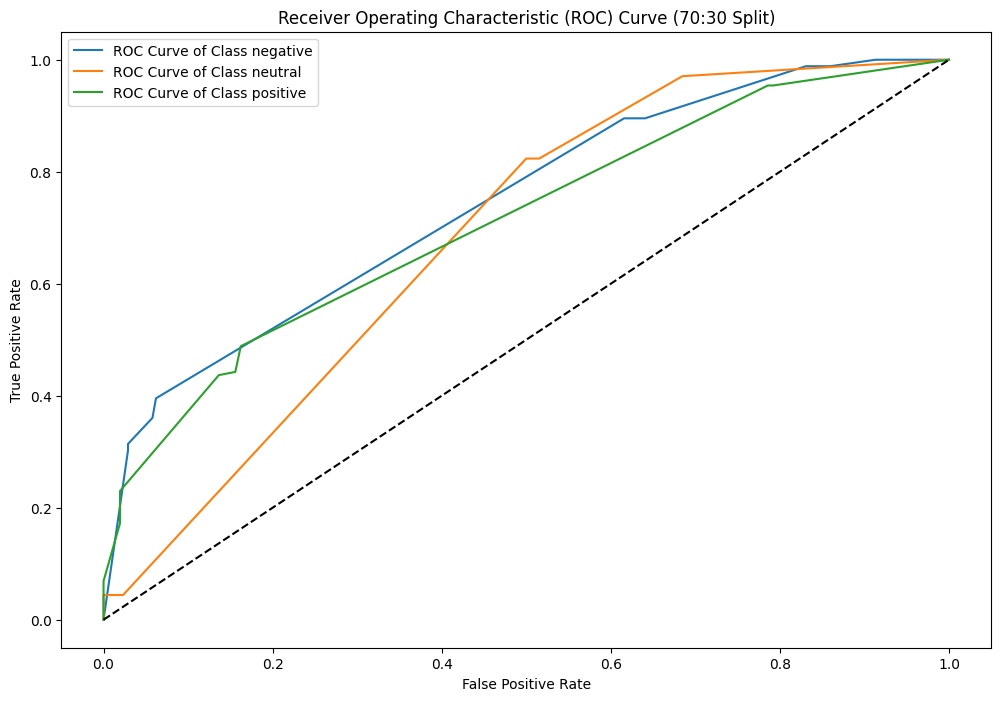

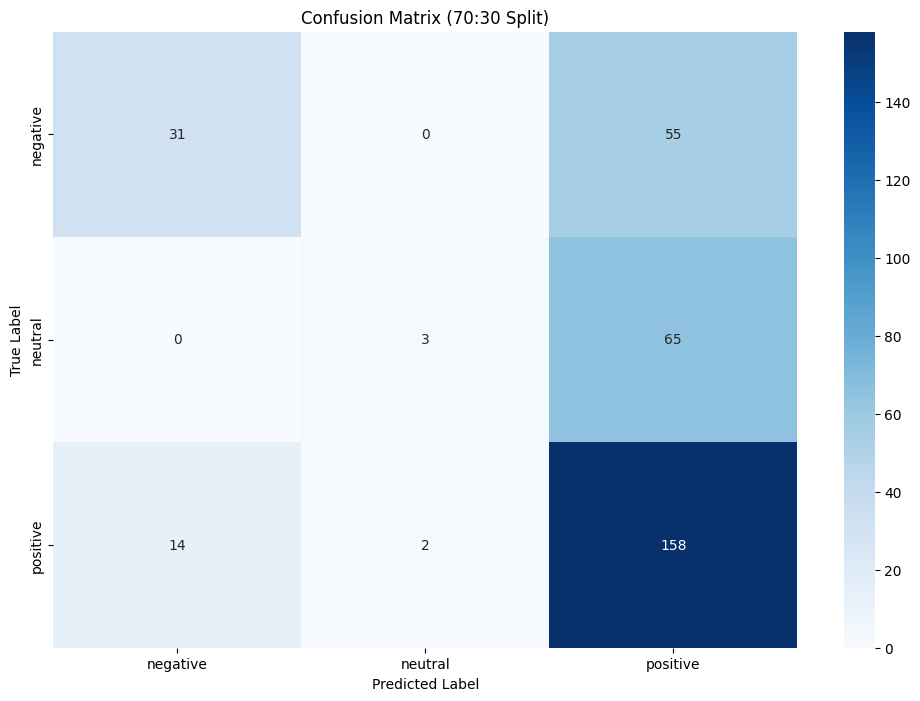

In [182]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, precision_score, recall_score, f1_score
from sklearn.preprocessing import label_binarize, LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# Membaca data dari file CSV
df = pd.read_csv(r'kualitas udara_processed_data_1.csv')

# Tangani nilai yang hilang dan konversi ke string
df['clean_text'] = df['clean_text'].fillna('').astype(str)

# Encode label sentimen menjadi angka
label_encoder = LabelEncoder()
df['sentiment_encoded'] = label_encoder.fit_transform(df['sentiment'])

# Memisahkan fitur dan label
X = df['clean_text']
y = df['sentiment_encoded']

# Pembagian data 70:30
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Vectorisasi teks menggunakan TF-IDF
tfidf_vectorizer = TfidfVectorizer(ngram_range=(1, 2), max_features=10000, min_df=3, max_df=0.8)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Inisialisasi model Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)

# Hyperparameter tuning dengan GridSearchCV
param_grid = {
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
grid_search = GridSearchCV(dt_model, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train_tfidf, y_train)
best_dt_model = grid_search.best_estimator_

# Fungsi untuk menghitung metrik cross-validation
def evaluate_cross_validation(X, y, k_folds):
    skf = StratifiedKFold(n_splits=k_folds, shuffle=True, random_state=42)
    
    accuracies = []
    y_true_list = []
    y_pred_list = []
    y_prob_list = []
    
    # Track FPR and TPR for ROC curve plotting
    fpr_dict = {i: [] for i in range(len(label_encoder.classes_))}
    tpr_dict = {i: [] for i in range(len(label_encoder.classes_))}
    
    for train_index, test_index in skf.split(X, y):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        
        best_dt_model.fit(X_train, y_train)
        
        # Collect predictions and probabilities
        y_true_list.append(y_test.to_numpy())
        y_pred_list.append(best_dt_model.predict(X_test))
        y_prob_list.append(best_dt_model.predict_proba(X_test))
    
    # Concatenate arrays
    y_true = np.concatenate(y_true_list)
    y_pred = np.concatenate(y_pred_list)
    y_prob = np.concatenate(y_prob_list)

    # Collect FPR and TPR for ROC curve plotting
    y_test_bin = label_binarize(y_true, classes=np.arange(len(label_encoder.classes_)))
    y_prob_array = np.array(y_prob)
    
    for i in range(len(label_encoder.classes_)):
        fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_prob_array[:, i])
        fpr_dict[i].append(fpr)
        tpr_dict[i].append(tpr)
    
    # Metrics
    accuracy = np.mean([best_dt_model.score(X[train_index], y.iloc[train_index]) for train_index, _ in skf.split(X, y)])
    precision = precision_score(y_true, y_pred, average='weighted', zero_division=1)
    recall = recall_score(y_true, y_pred, average='weighted', zero_division=1)
    f1 = f1_score(y_true, y_pred, average='weighted', zero_division=1)
    roc_auc = roc_auc_score(label_binarize(y_true, classes=np.arange(len(label_encoder.classes_))), y_prob, multi_class='ovr')
    
    # Classification Report
    classification_rep = classification_report(y_true, y_pred, target_names=label_encoder.classes_, zero_division=1, output_dict=True)
    
    # Convert classification report to DataFrame
    class_report_df = pd.DataFrame(classification_rep).transpose()
    
    # Confusion Matrix
    conf_matrix = confusion_matrix(y_true, y_pred)
    
    return accuracy, precision, recall, f1, roc_auc, class_report_df, conf_matrix, y_true, y_prob, fpr_dict, tpr_dict

# Evaluasi dengan cross-validation 3, 5, dan 10 folds
roc_data = {}
results = []
for folds in [3, 5, 10]:
    accuracy, precision, recall, f1, roc_auc, class_report_df, conf_matrix, y_true, y_prob, fpr_dict, tpr_dict = evaluate_cross_validation(X_train_tfidf, y_train, folds)
    results.append({
        'Folds': folds,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1,
        'ROC-AUC': roc_auc
    })
    roc_data[folds] = (fpr_dict, tpr_dict)

# Tampilkan hasil dalam bentuk tabel
results_df = pd.DataFrame(results)
print("Summary Results:")
print(results_df[['Folds', 'Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC-AUC']])

# Melatih model dengan data 70:30
best_dt_model.fit(X_train_tfidf, y_train)
y_pred = best_dt_model.predict(X_test_tfidf)
y_prob = best_dt_model.predict_proba(X_test_tfidf)

# Metrik Decision Tree dengan data 70:30
accuracy_70_30 = (y_test == y_pred).mean()
precision_70_30 = precision_score(y_test, y_pred, average='weighted', zero_division=1)
recall_70_30 = recall_score(y_test, y_pred, average='weighted', zero_division=1)
f1_70_30 = f1_score(y_test, y_pred, average='weighted', zero_division=1)
roc_auc_70_30 = roc_auc_score(label_binarize(y_test, classes=np.arange(len(label_encoder.classes_))), y_prob, multi_class='ovr')

# Classification Report
classification_rep_70_30 = classification_report(y_test, y_pred, target_names=label_encoder.classes_, zero_division=1, output_dict=True)
class_report_df_70_30 = pd.DataFrame(classification_rep_70_30).transpose()

# Confusion Matrix
conf_matrix_70_30 = confusion_matrix(y_test, y_pred)

# Tampilkan hasil untuk rasio 70:30
print("\nDecision Tree Accuracy (70:30):", accuracy_70_30)
print("\nDecision Tree Classification Report (70:30):")
print(class_report_df_70_30)
print("ROC-AUC Score (70:30):", roc_auc_70_30)

# Plot ROC Curve untuk setiap k (3, 5, 10)
for folds, (fpr_dict, tpr_dict) in roc_data.items():
    plt.figure(figsize=(12, 8))
    n_classes = len(label_encoder.classes_)
    for i in range(n_classes):
        mean_fpr = np.concatenate(fpr_dict[i])
        mean_tpr = np.concatenate(tpr_dict[i])
        plt.plot(mean_fpr, mean_tpr, label=f'ROC Curve of Class {label_encoder.classes_[i]} for k={folds}')
    
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'Receiver Operating Characteristic (ROC) Curve (k={folds})')
    plt.legend(loc='best')
    plt.show()

# Plot ROC Curve dan Confusion Matrix untuk data 70:30
# Binarize y_test for ROC Curve
y_test_bin = label_binarize(y_test, classes=np.arange(len(label_encoder.classes_)))

# Plot ROC Curve
plt.figure(figsize=(12, 8))
n_classes = len(label_encoder.classes_)
for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_prob[:, i])
    plt.plot(fpr, tpr, label=f'ROC Curve of Class {label_encoder.classes_[i]}')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve (70:30 Split)')
plt.legend(loc='best')
plt.show()

# Plot Confusion Matrix
plt.figure(figsize=(12, 8))
sns.heatmap(conf_matrix_70_30, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix (70:30 Split)')
plt.show()

-->DECISON TREE: 80:20

Summary Results:
   Folds  Accuracy  Precision    Recall  F1-Score   ROC-AUC
0      3  0.879725   0.603309  0.610538  0.605345  0.663893
1      5  0.910634   0.597479  0.599084  0.598184  0.663538
2     10  0.949597   0.599872  0.594502  0.596345  0.667127

Decision Tree Accuracy (80:20): 0.5844748858447488

Decision Tree Classification Report (80:20):
              precision    recall  f1-score     support
negative       0.534483  0.534483  0.534483   58.000000
neutral        0.431818  0.441860  0.436782   43.000000
positive       0.666667  0.661017  0.663830  118.000000
accuracy       0.584475  0.584475  0.584475    0.584475
macro avg      0.544323  0.545787  0.545031  219.000000
weighted avg   0.585547  0.584475  0.584993  219.000000
ROC-AUC Score (80:20): 0.6569123735214388


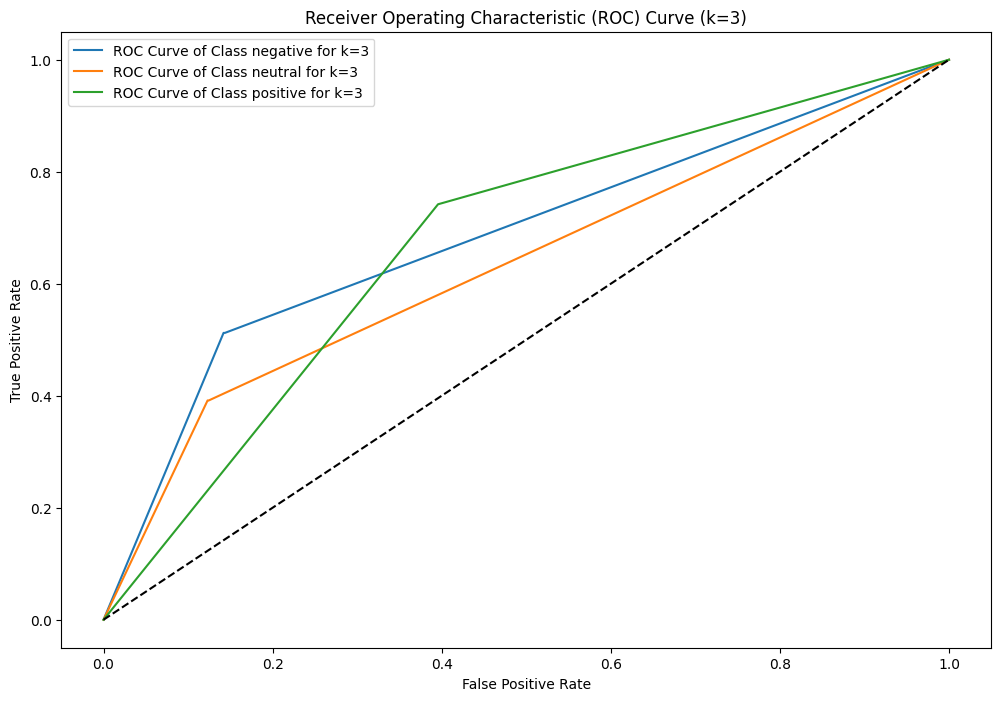

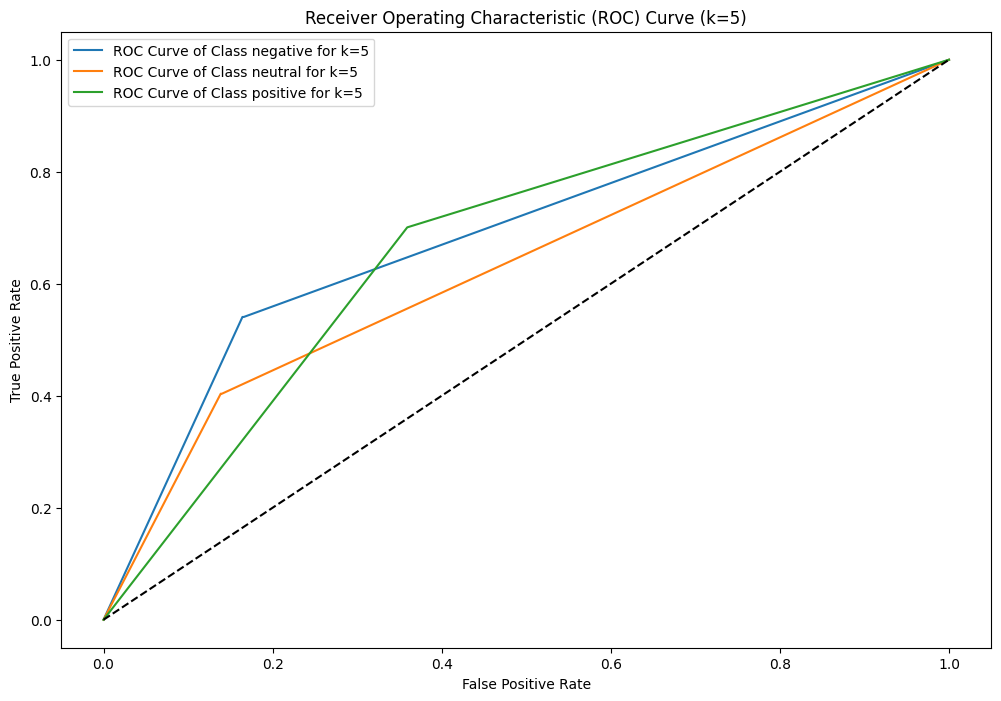

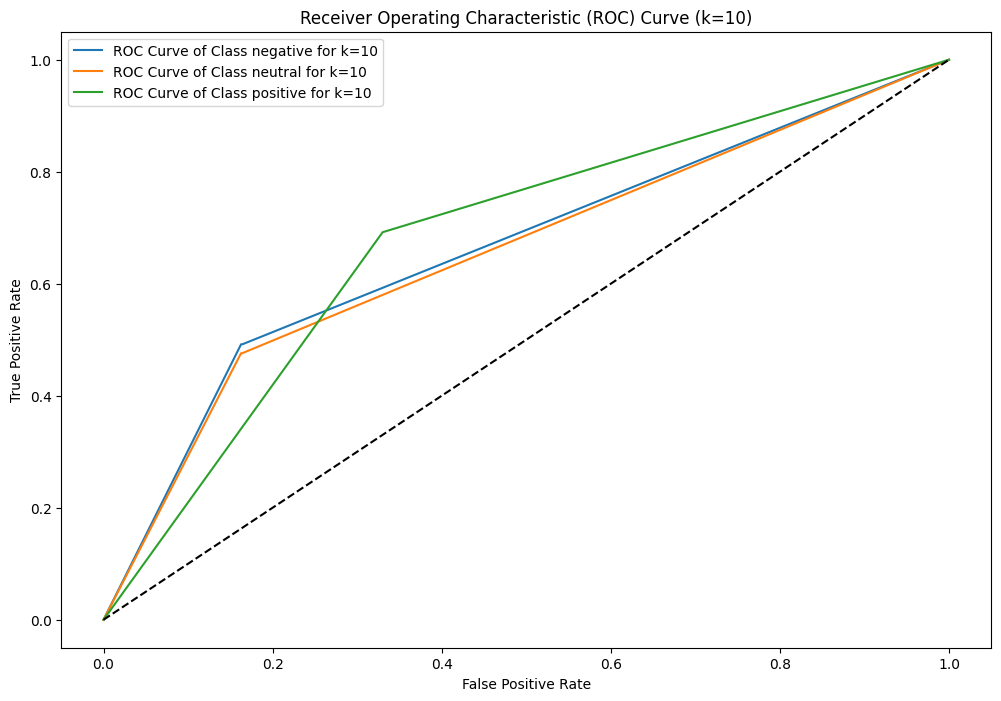

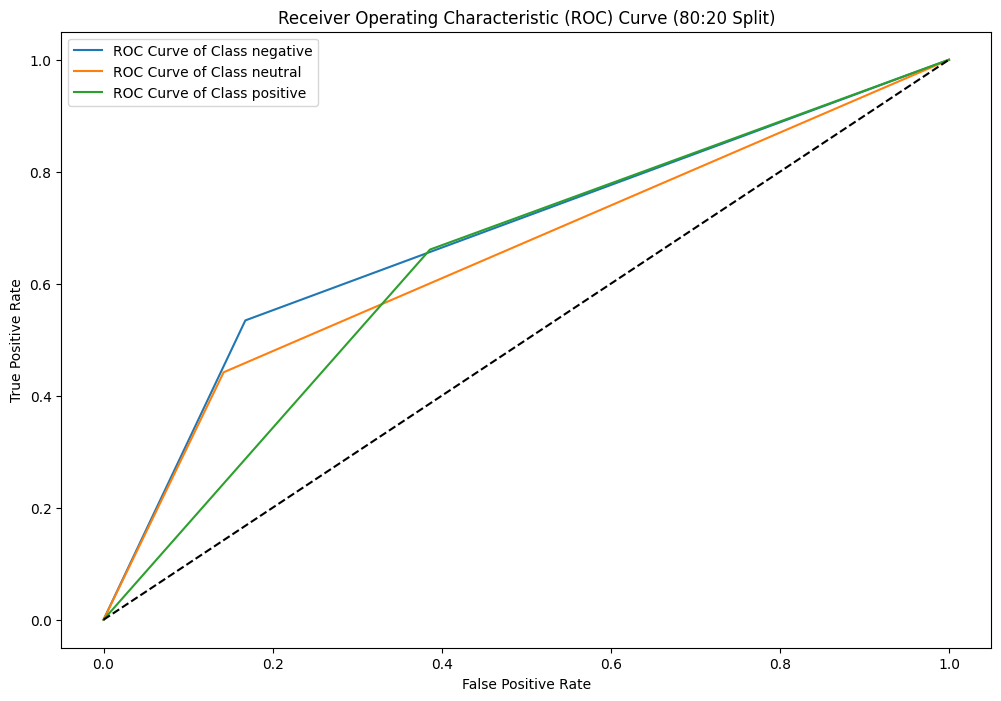

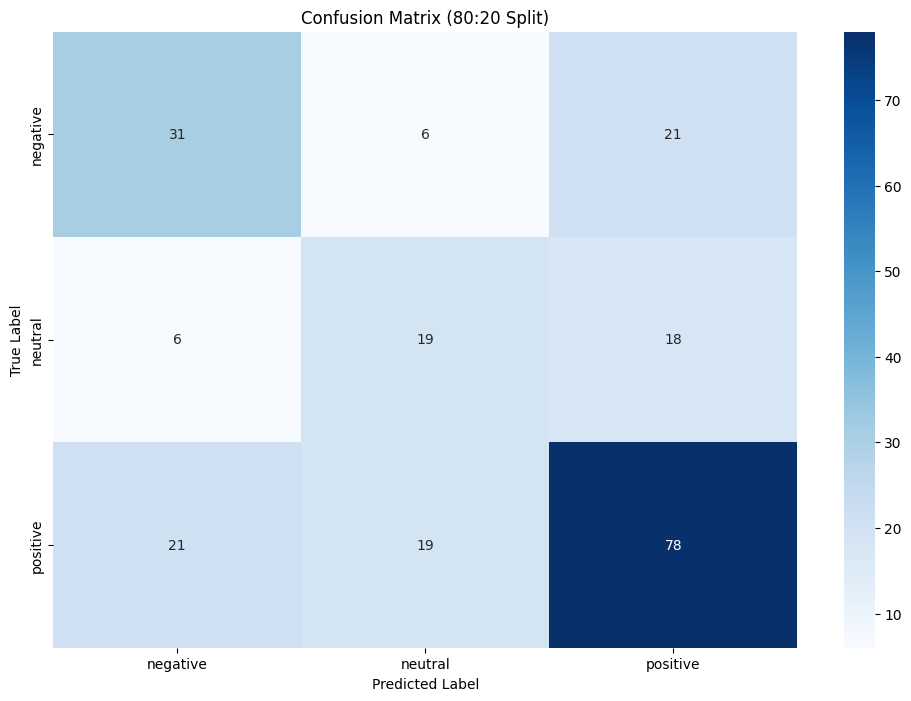

In [183]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, precision_score, recall_score, f1_score
from sklearn.preprocessing import label_binarize, LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# Membaca data dari file CSV
df = pd.read_csv(r'kualitas udara_processed_data_1.csv')

# Tangani nilai yang hilang dan konversi ke string
df['clean_text'] = df['clean_text'].fillna('').astype(str)

# Encode label sentimen menjadi angka
label_encoder = LabelEncoder()
df['sentiment_encoded'] = label_encoder.fit_transform(df['sentiment'])

# Memisahkan fitur dan label
X = df['clean_text']
y = df['sentiment_encoded']

# Pembagian data 80:20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Vectorisasi teks menggunakan TF-IDF
tfidf_vectorizer = TfidfVectorizer(ngram_range=(1, 2), max_features=10000, min_df=3, max_df=0.8)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Inisialisasi model Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)

# Hyperparameter tuning dengan GridSearchCV
param_grid = {
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
grid_search = GridSearchCV(dt_model, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train_tfidf, y_train)
best_dt_model = grid_search.best_estimator_

# Fungsi untuk menghitung metrik cross-validation
def evaluate_cross_validation(X, y, k_folds):
    skf = StratifiedKFold(n_splits=k_folds, shuffle=True, random_state=42)
    
    accuracies = []
    y_true_list = []
    y_pred_list = []
    y_prob_list = []
    
    # Track FPR and TPR for ROC curve plotting
    fpr_dict = {i: [] for i in range(len(label_encoder.classes_))}
    tpr_dict = {i: [] for i in range(len(label_encoder.classes_))}
    
    for train_index, test_index in skf.split(X, y):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        
        best_dt_model.fit(X_train, y_train)
        
        # Collect predictions and probabilities
        y_true_list.append(y_test.to_numpy())
        y_pred_list.append(best_dt_model.predict(X_test))
        y_prob_list.append(best_dt_model.predict_proba(X_test))
    
    # Concatenate arrays
    y_true = np.concatenate(y_true_list)
    y_pred = np.concatenate(y_pred_list)
    y_prob = np.concatenate(y_prob_list)

    # Collect FPR and TPR for ROC curve plotting
    y_test_bin = label_binarize(y_true, classes=np.arange(len(label_encoder.classes_)))
    y_prob_array = np.array(y_prob)
    
    for i in range(len(label_encoder.classes_)):
        fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_prob_array[:, i])
        fpr_dict[i].append(fpr)
        tpr_dict[i].append(tpr)
    
    # Metrics
    accuracy = np.mean([best_dt_model.score(X[train_index], y.iloc[train_index]) for train_index, _ in skf.split(X, y)])
    precision = precision_score(y_true, y_pred, average='weighted', zero_division=1)
    recall = recall_score(y_true, y_pred, average='weighted', zero_division=1)
    f1 = f1_score(y_true, y_pred, average='weighted', zero_division=1)
    roc_auc = roc_auc_score(label_binarize(y_true, classes=np.arange(len(label_encoder.classes_))), y_prob, multi_class='ovr')
    
    # Classification Report
    classification_rep = classification_report(y_true, y_pred, target_names=label_encoder.classes_, zero_division=1, output_dict=True)
    
    # Convert classification report to DataFrame
    class_report_df = pd.DataFrame(classification_rep).transpose()
    
    # Confusion Matrix
    conf_matrix = confusion_matrix(y_true, y_pred)
    
    return accuracy, precision, recall, f1, roc_auc, class_report_df, conf_matrix, y_true, y_prob, fpr_dict, tpr_dict

# Evaluasi dengan cross-validation 3, 5, dan 10 folds
roc_data = {}
results = []
for folds in [3, 5, 10]:
    accuracy, precision, recall, f1, roc_auc, class_report_df, conf_matrix, y_true, y_prob, fpr_dict, tpr_dict = evaluate_cross_validation(X_train_tfidf, y_train, folds)
    results.append({
        'Folds': folds,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1,
        'ROC-AUC': roc_auc
    })
    roc_data[folds] = (fpr_dict, tpr_dict)

# Tampilkan hasil dalam bentuk tabel
results_df = pd.DataFrame(results)
print("Summary Results:")
print(results_df[['Folds', 'Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC-AUC']])

# Melatih model dengan data 80:20
best_dt_model.fit(X_train_tfidf, y_train)
y_pred = best_dt_model.predict(X_test_tfidf)
y_prob = best_dt_model.predict_proba(X_test_tfidf)

# Metrik Decision Tree dengan data 80:20
accuracy_80_20 = (y_test == y_pred).mean()
precision_80_20 = precision_score(y_test, y_pred, average='weighted', zero_division=1)
recall_80_20 = recall_score(y_test, y_pred, average='weighted', zero_division=1)
f1_80_20 = f1_score(y_test, y_pred, average='weighted', zero_division=1)
roc_auc_80_20 = roc_auc_score(label_binarize(y_test, classes=np.arange(len(label_encoder.classes_))), y_prob, multi_class='ovr')

# Classification Report
classification_rep_80_20 = classification_report(y_test, y_pred, target_names=label_encoder.classes_, zero_division=1, output_dict=True)
class_report_df_80_20 = pd.DataFrame(classification_rep_80_20).transpose()

# Confusion Matrix
conf_matrix_80_20 = confusion_matrix(y_test, y_pred)

# Tampilkan hasil untuk rasio 80:20
print("\nDecision Tree Accuracy (80:20):", accuracy_80_20)
print("\nDecision Tree Classification Report (80:20):")
print(class_report_df_80_20)
print("ROC-AUC Score (80:20):", roc_auc_80_20)

# Plot ROC Curve untuk setiap k (3, 5, 10)
for folds, (fpr_dict, tpr_dict) in roc_data.items():
    plt.figure(figsize=(12, 8))
    n_classes = len(label_encoder.classes_)
    for i in range(n_classes):
        mean_fpr = np.concatenate(fpr_dict[i])
        mean_tpr = np.concatenate(tpr_dict[i])
        plt.plot(mean_fpr, mean_tpr, label=f'ROC Curve of Class {label_encoder.classes_[i]} for k={folds}')
    
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'Receiver Operating Characteristic (ROC) Curve (k={folds})')
    plt.legend(loc='best')
    plt.show()

# Plot ROC Curve dan Confusion Matrix untuk data 80:20
# Binarize y_test for ROC Curve
y_test_bin = label_binarize(y_test, classes=np.arange(len(label_encoder.classes_)))

# Plot ROC Curve
plt.figure(figsize=(12, 8))
n_classes = len(label_encoder.classes_)
for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_prob[:, i])
    plt.plot(fpr, tpr, label=f'ROC Curve of Class {label_encoder.classes_[i]}')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve (80:20 Split)')
plt.legend(loc='best')
plt.show()

# Plot Confusion Matrix
plt.figure(figsize=(12, 8))
sns.heatmap(conf_matrix_80_20, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix (80:20 Split)')
plt.show()

-->DECISION TREE: 90:10

Summary Results:
   Folds  Accuracy  Precision    Recall  F1-Score   ROC-AUC
0      3  0.880825   0.600837  0.599796  0.597229  0.661742
1      5  0.924634   0.591671  0.598778  0.594439  0.657261
2     10  0.962321   0.609876  0.608961  0.609398  0.675070

Decision Tree Accuracy (90:10): 0.6

Decision Tree Classification Report (90:10):
              precision    recall  f1-score  support
negative       0.558824  0.760000  0.644068     25.0
neutral        0.392857  0.458333  0.423077     24.0
positive       0.750000  0.590164  0.660550     61.0
accuracy       0.600000  0.600000  0.600000      0.6
macro avg      0.567227  0.602832  0.575898    110.0
weighted avg   0.628629  0.600000  0.604992    110.0
ROC-AUC Score (90:10): 0.6982423836226573


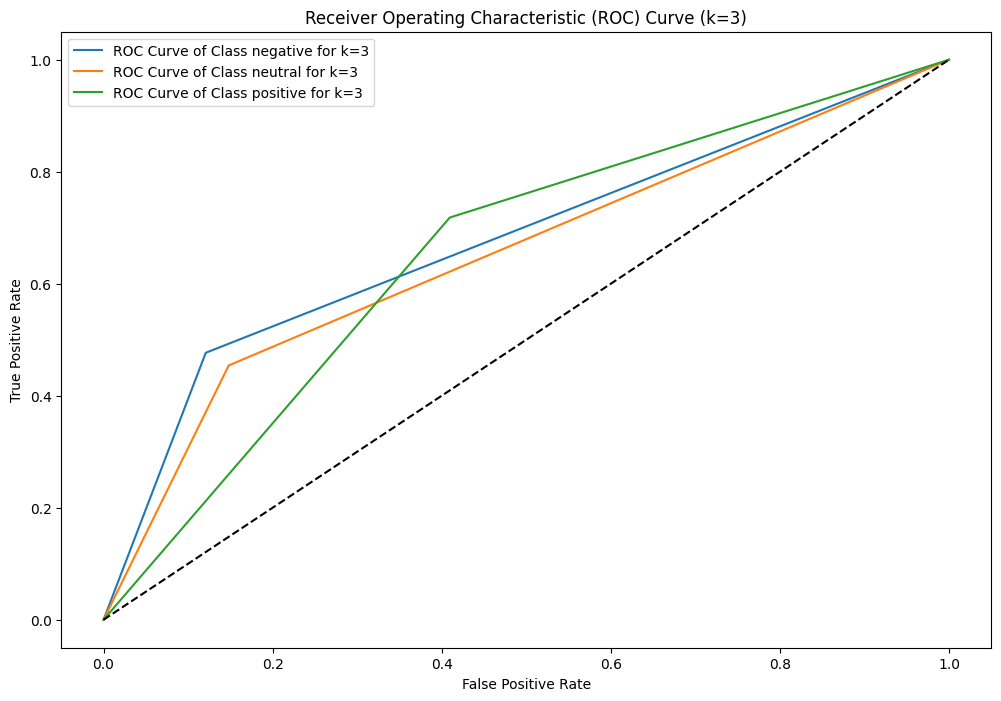

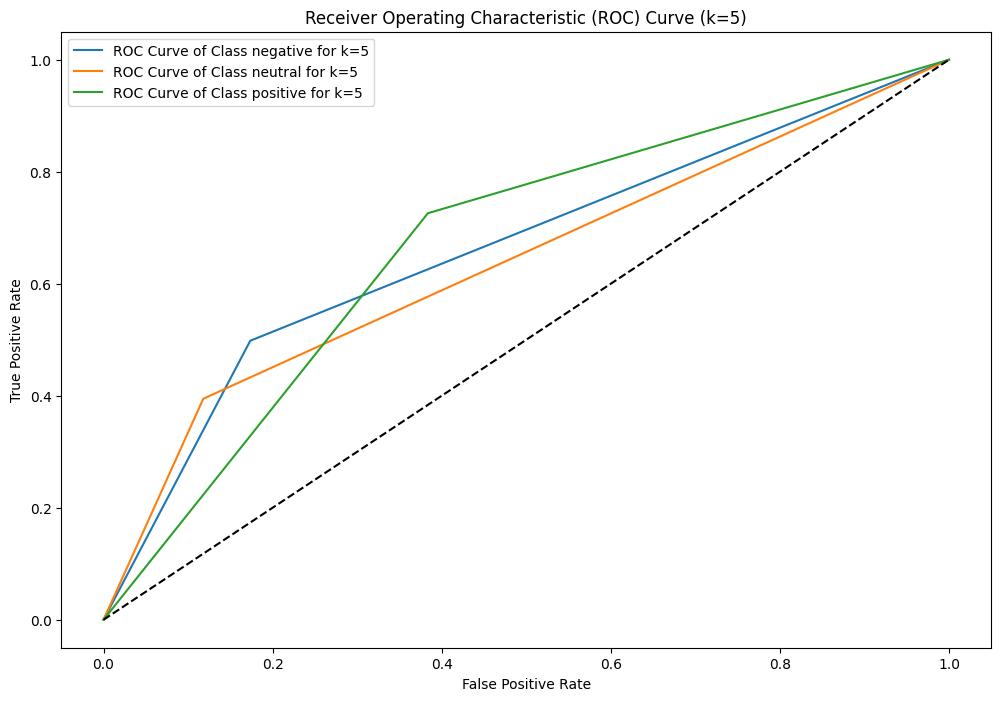

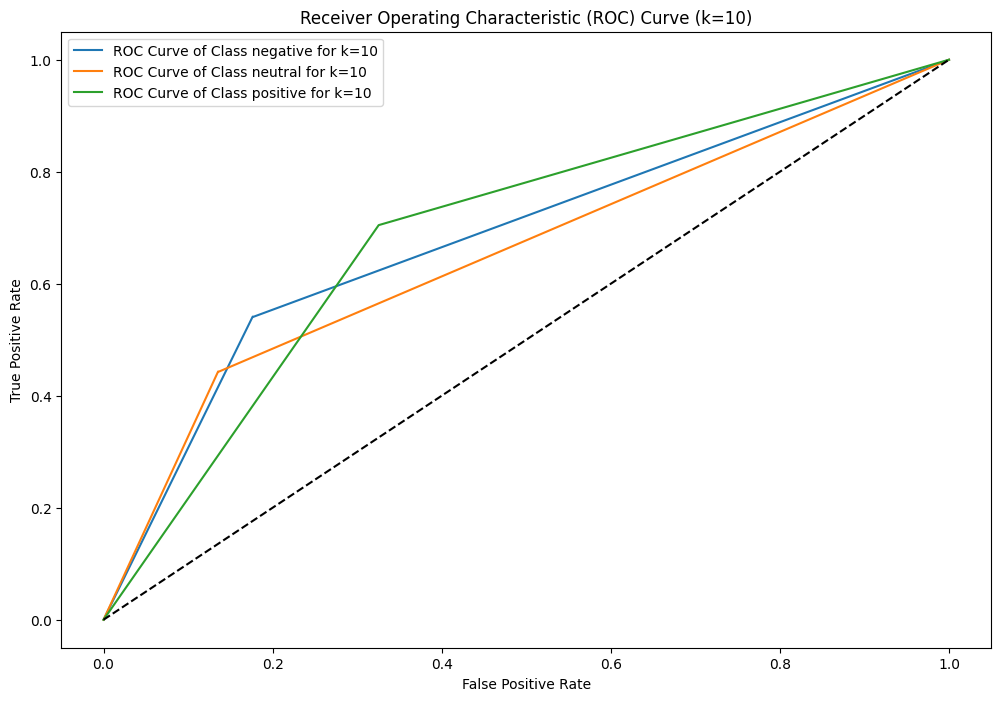

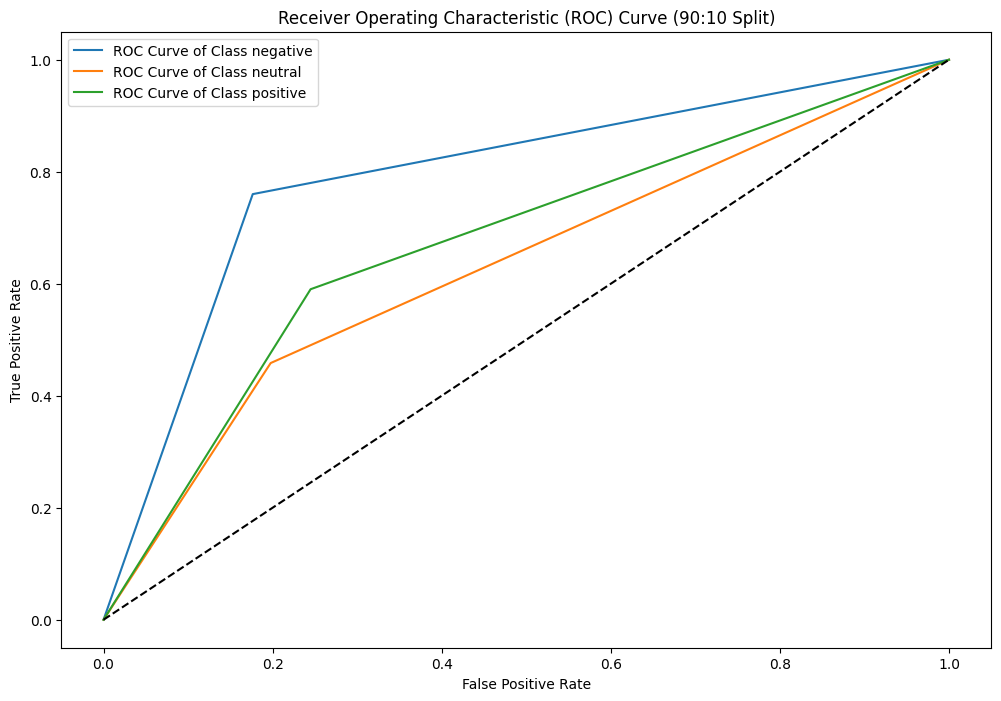

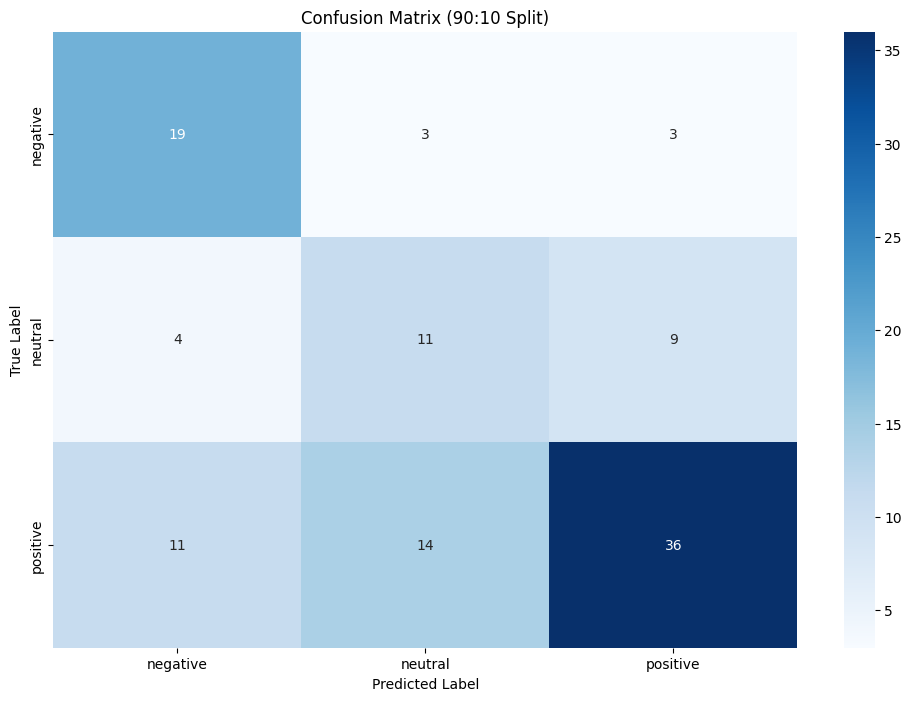

In [184]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, precision_score, recall_score, f1_score
from sklearn.preprocessing import label_binarize, LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# Membaca data dari file CSV
df = pd.read_csv(r'kualitas udara_processed_data_1.csv')

# Tangani nilai yang hilang dan konversi ke string
df['clean_text'] = df['clean_text'].fillna('').astype(str)

# Encode label sentimen menjadi angka
label_encoder = LabelEncoder()
df['sentiment_encoded'] = label_encoder.fit_transform(df['sentiment'])

# Memisahkan fitur dan label
X = df['clean_text']
y = df['sentiment_encoded']

# Pembagian data 90:10
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Vectorisasi teks menggunakan TF-IDF
tfidf_vectorizer = TfidfVectorizer(ngram_range=(1, 2), max_features=10000, min_df=3, max_df=0.8)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Inisialisasi model Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)

# Hyperparameter tuning dengan GridSearchCV
param_grid = {
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
grid_search = GridSearchCV(dt_model, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train_tfidf, y_train)
best_dt_model = grid_search.best_estimator_

# Fungsi untuk menghitung metrik cross-validation
def evaluate_cross_validation(X, y, k_folds):
    skf = StratifiedKFold(n_splits=k_folds, shuffle=True, random_state=42)
    
    accuracies = []
    y_true_list = []
    y_pred_list = []
    y_prob_list = []
    
    # Track FPR and TPR for ROC curve plotting
    fpr_dict = {i: [] for i in range(len(label_encoder.classes_))}
    tpr_dict = {i: [] for i in range(len(label_encoder.classes_))}
    
    for train_index, test_index in skf.split(X, y):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        
        best_dt_model.fit(X_train, y_train)
        
        # Collect predictions and probabilities
        y_true_list.append(y_test.to_numpy())
        y_pred_list.append(best_dt_model.predict(X_test))
        y_prob_list.append(best_dt_model.predict_proba(X_test))
    
    # Concatenate arrays
    y_true = np.concatenate(y_true_list)
    y_pred = np.concatenate(y_pred_list)
    y_prob = np.concatenate(y_prob_list)

    # Collect FPR and TPR for ROC curve plotting
    y_test_bin = label_binarize(y_true, classes=np.arange(len(label_encoder.classes_)))
    y_prob_array = np.array(y_prob)
    
    for i in range(len(label_encoder.classes_)):
        fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_prob_array[:, i])
        fpr_dict[i].append(fpr)
        tpr_dict[i].append(tpr)
    
    # Metrics
    accuracy = np.mean([best_dt_model.score(X[train_index], y.iloc[train_index]) for train_index, _ in skf.split(X, y)])
    precision = precision_score(y_true, y_pred, average='weighted', zero_division=1)
    recall = recall_score(y_true, y_pred, average='weighted', zero_division=1)
    f1 = f1_score(y_true, y_pred, average='weighted', zero_division=1)
    roc_auc = roc_auc_score(label_binarize(y_true, classes=np.arange(len(label_encoder.classes_))), y_prob, multi_class='ovr')
    
    # Classification Report
    classification_rep = classification_report(y_true, y_pred, target_names=label_encoder.classes_, zero_division=1, output_dict=True)
    
    # Convert classification report to DataFrame
    class_report_df = pd.DataFrame(classification_rep).transpose()
    
    # Confusion Matrix
    conf_matrix = confusion_matrix(y_true, y_pred)
    
    return accuracy, precision, recall, f1, roc_auc, class_report_df, conf_matrix, y_true, y_prob, fpr_dict, tpr_dict

# Evaluasi dengan cross-validation 3, 5, dan 10 folds
roc_data = {}
results = []
for folds in [3, 5, 10]:
    accuracy, precision, recall, f1, roc_auc, class_report_df, conf_matrix, y_true, y_prob, fpr_dict, tpr_dict = evaluate_cross_validation(X_train_tfidf, y_train, folds)
    results.append({
        'Folds': folds,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1,
        'ROC-AUC': roc_auc
    })
    roc_data[folds] = (fpr_dict, tpr_dict)

# Tampilkan hasil dalam bentuk tabel
results_df = pd.DataFrame(results)
print("Summary Results:")
print(results_df[['Folds', 'Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC-AUC']])

# Melatih model dengan data 90:10
best_dt_model.fit(X_train_tfidf, y_train)
y_pred = best_dt_model.predict(X_test_tfidf)
y_prob = best_dt_model.predict_proba(X_test_tfidf)

# Metrik Decision Tree dengan data 90:10
accuracy_90_10 = (y_test == y_pred).mean()
precision_90_10 = precision_score(y_test, y_pred, average='weighted', zero_division=1)
recall_90_10 = recall_score(y_test, y_pred, average='weighted', zero_division=1)
f1_90_10 = f1_score(y_test, y_pred, average='weighted', zero_division=1)
roc_auc_90_10 = roc_auc_score(label_binarize(y_test, classes=np.arange(len(label_encoder.classes_))), y_prob, multi_class='ovr')

# Classification Report
classification_rep_90_10 = classification_report(y_test, y_pred, target_names=label_encoder.classes_, zero_division=1, output_dict=True)
class_report_df_90_10 = pd.DataFrame(classification_rep_90_10).transpose()

# Confusion Matrix
conf_matrix_90_10 = confusion_matrix(y_test, y_pred)

# Tampilkan hasil untuk rasio 90:10
print("\nDecision Tree Accuracy (90:10):", accuracy_90_10)
print("\nDecision Tree Classification Report (90:10):")
print(class_report_df_90_10)
print("ROC-AUC Score (90:10):", roc_auc_90_10)

# Plot ROC Curve untuk setiap k (3, 5, 10)
for folds, (fpr_dict, tpr_dict) in roc_data.items():
    plt.figure(figsize=(12, 8))
    n_classes = len(label_encoder.classes_)
    for i in range(n_classes):
        mean_fpr = np.concatenate(fpr_dict[i])
        mean_tpr = np.concatenate(tpr_dict[i])
        plt.plot(mean_fpr, mean_tpr, label=f'ROC Curve of Class {label_encoder.classes_[i]} for k={folds}')
    
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'Receiver Operating Characteristic (ROC) Curve (k={folds})')
    plt.legend(loc='best')
    plt.show()

# Plot ROC Curve dan Confusion Matrix untuk data 90:10
# Binarize y_test for ROC Curve
y_test_bin = label_binarize(y_test, classes=np.arange(len(label_encoder.classes_)))

# Plot ROC Curve
plt.figure(figsize=(12, 8))
n_classes = len(label_encoder.classes_)
for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_prob[:, i])
    plt.plot(fpr, tpr, label=f'ROC Curve of Class {label_encoder.classes_[i]}')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve (90:10 Split)')
plt.legend(loc='best')
plt.show()

# Plot Confusion Matrix
plt.figure(figsize=(12, 8))
sns.heatmap(conf_matrix_90_10, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix (90:10 Split)')
plt.show()

In [4]:
import pandas as pd

# Definisikan data untuk Decision Tree
data = {
    'Folds': [3, 5, 10] * 5,
    'Accuracy': (
        [0.684982, 0.684980, 0.677655] +
        [0.685482, 0.694656, 0.705341] +
        [0.664907, 0.658377, 0.660995] +
        [0.879725, 0.910634, 0.949597] +
        [0.880825, 0.924634, 0.962321]
    ),
    'Precision': (
        [0.611119, 0.637005, 0.654417] +
        [0.631447, 0.645823, 0.660206] +
        [0.639275, 0.659370, 0.646095] +
        [0.603309, 0.597479, 0.599872] +
        [0.600837, 0.591671, 0.609876]
    ),
    'Recall': (
        [0.602564, 0.633700, 0.633700] +
        [0.615267, 0.613740, 0.625954] +
        [0.620419, 0.623037, 0.619110] +
        [0.610538, 0.599084, 0.594502] +
        [0.599796, 0.598778, 0.608961]
    ),
    'F1-Score': (
        [0.562098, 0.583795, 0.591570] +
        [0.570408, 0.563163, 0.573534] +
        [0.565600, 0.560960, 0.556523] +
        [0.605345, 0.598184, 0.596345] +
        [0.597229, 0.594439, 0.609398]
    ),
    'ROC-AUC': (
        [0.643069, 0.688976, 0.655520] +
        [0.677799, 0.678606, 0.683154] +
        [0.681723, 0.715358, 0.696837] +
        [0.663893, 0.663538, 0.667127] +
        [0.661742, 0.657261, 0.675070]
    ),
    'Ratio': (
        ['50:50'] * 3 +
        ['60:40'] * 3 +
        ['70:30'] * 3 +
        ['80:20'] * 3 +
        ['90:10'] * 3
    )
}

# Buat DataFrame dari data
df = pd.DataFrame(data)

# Simpan DataFrame ke file Excel
df.to_excel('decision_tree_combined_results.xlsx', index=False)

print("File Excel berhasil dibuat.")

File Excel berhasil dibuat.


In [43]:
import pandas as pd
import plotly.express as px

# Definisikan data untuk Decision Tree
data = {
    'Folds': [3, 5, 10] * 5,
    'Accuracy': (
        [0.684982, 0.684980, 0.677655] +
        [0.685482, 0.694656, 0.705341] +
        [0.664907, 0.658377, 0.660995] +
        [0.879725, 0.910634, 0.949597] +
        [0.880825, 0.924634, 0.962321]
    ),
    'Precision': (
        [0.611119, 0.637005, 0.654417] +
        [0.631447, 0.645823, 0.660206] +
        [0.639275, 0.659370, 0.646095] +
        [0.603309, 0.597479, 0.599872] +
        [0.600837, 0.591671, 0.609876]
    ),
    'Recall': (
        [0.602564, 0.633700, 0.633700] +
        [0.615267, 0.613740, 0.625954] +
        [0.620419, 0.623037, 0.619110] +
        [0.610538, 0.599084, 0.594502] +
        [0.599796, 0.598778, 0.608961]
    ),
    'F1-Score': (
        [0.562098, 0.583795, 0.591570] +
        [0.570408, 0.563163, 0.573534] +
        [0.565600, 0.560960, 0.556523] +
        [0.605345, 0.598184, 0.596345] +
        [0.597229, 0.594439, 0.609398]
    ),
    'ROC-AUC': (
        [0.643069, 0.688976, 0.655520] +
        [0.677799, 0.678606, 0.683154] +
        [0.681723, 0.715358, 0.696837] +
        [0.663893, 0.663538, 0.667127] +
        [0.661742, 0.657261, 0.675070]
    ),
    'Split': (
        ['50:50'] * 3 + ['60:40'] * 3 + ['70:30'] * 3 +
        ['80:20'] * 3 + ['90:10'] * 3
    )
}

# Buat DataFrame dari data
df_combined = pd.DataFrame(data)

# Buat kolom gabungan untuk nilai Folds dan Split
df_combined['Folds_Split'] = df_combined['Folds'].astype(str) + " (Split=" + df_combined['Split'] + ")"

# Ubah DataFrame ke format long
df_melted = df_combined.melt(id_vars=['Folds_Split'], var_name='Metric', value_name='Score')

# Buat plot batang menggunakan Plotly
fig = px.bar(df_melted, x='Folds_Split', y='Score', color='Metric', barmode='group',
            title='Performance Metrics by Folds and Train-Test Split Ratio',
            labels={'Folds_Split': 'Folds and Train-Test Split Ratio', 'Score': 'Score'},
            color_discrete_sequence=px.colors.qualitative.Vivid)

# Perbarui tata letak agar lebih mudah dibaca
fig.update_layout(xaxis_tickangle=-45)

# Simpan plot sebagai file HTML
fig.write_html("performance_metrics_decision tree.html")

# Tampilkan plot
fig.show()

SVM

--> SVM 50:50

Summary Results:
   Folds  Accuracy  Precision    Recall  F1-Score   ROC-AUC
0      3  0.841117   0.707493  0.683150  0.653091  0.796753
1      5  0.843633   0.718625  0.688645  0.656789  0.810554
2     10  0.848210   0.712052  0.697802  0.672553  0.817997

SVM Accuracy (50:50): 0.6556776556776557

SVM Classification Report (50:50):
              precision    recall  f1-score     support
negative       0.675214  0.568345  0.617188  139.000000
neutral        0.575758  0.165217  0.256757  115.000000
positive       0.656566  0.890411  0.755814  292.000000
accuracy       0.655678  0.655678  0.655678    0.655678
macro avg      0.635846  0.541325  0.543253  546.000000
weighted avg   0.644293  0.655678  0.615410  546.000000
ROC-AUC Score (50:50): 0.7976910833377561


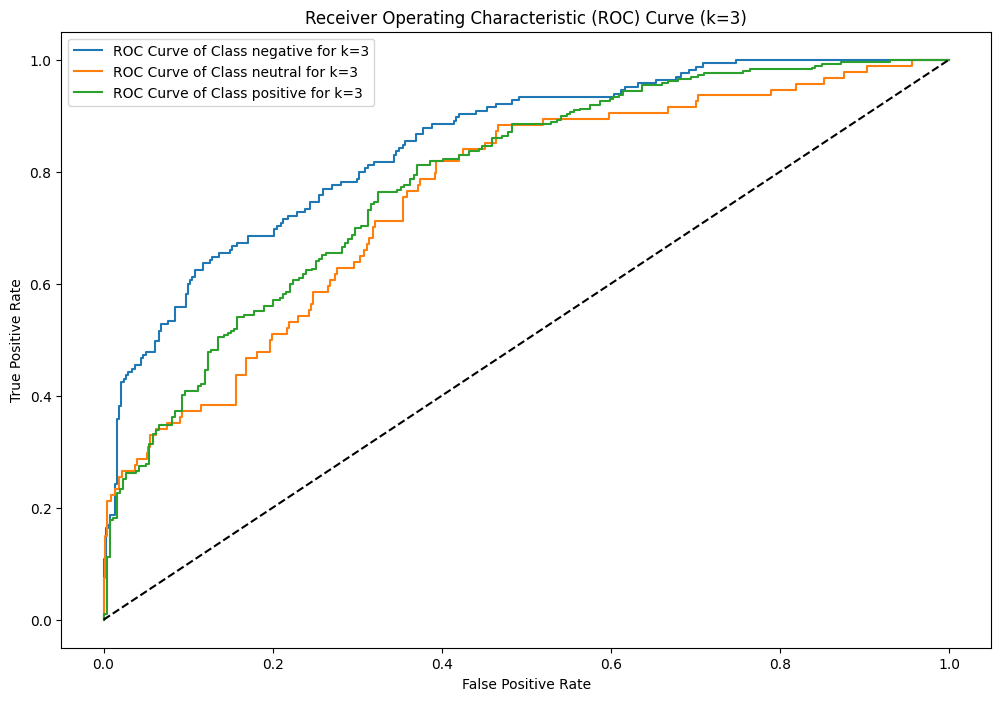

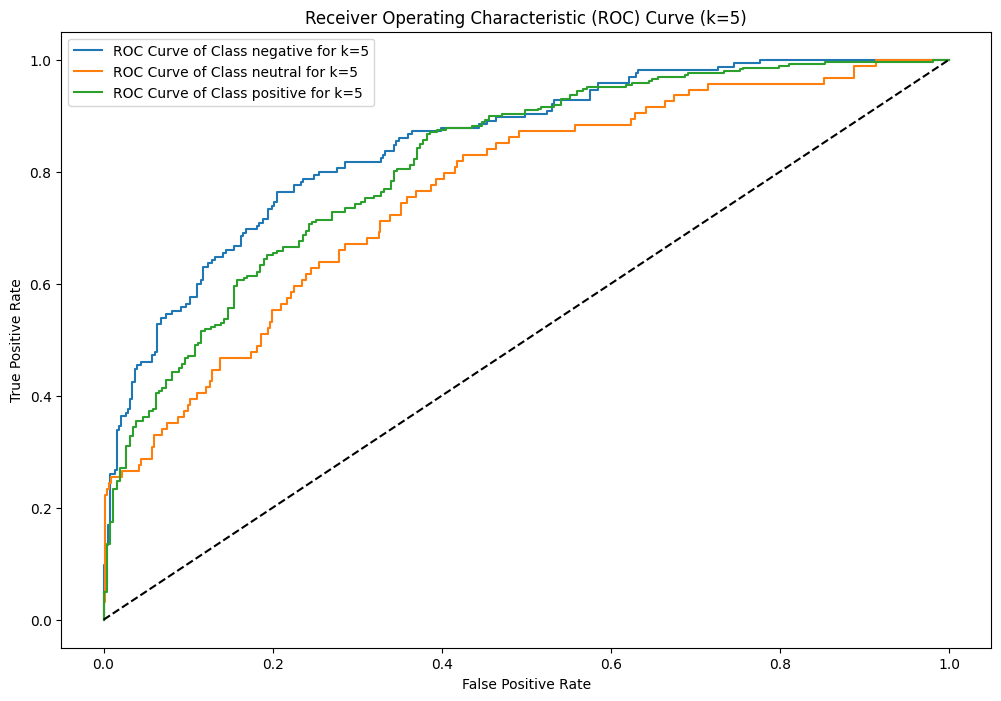

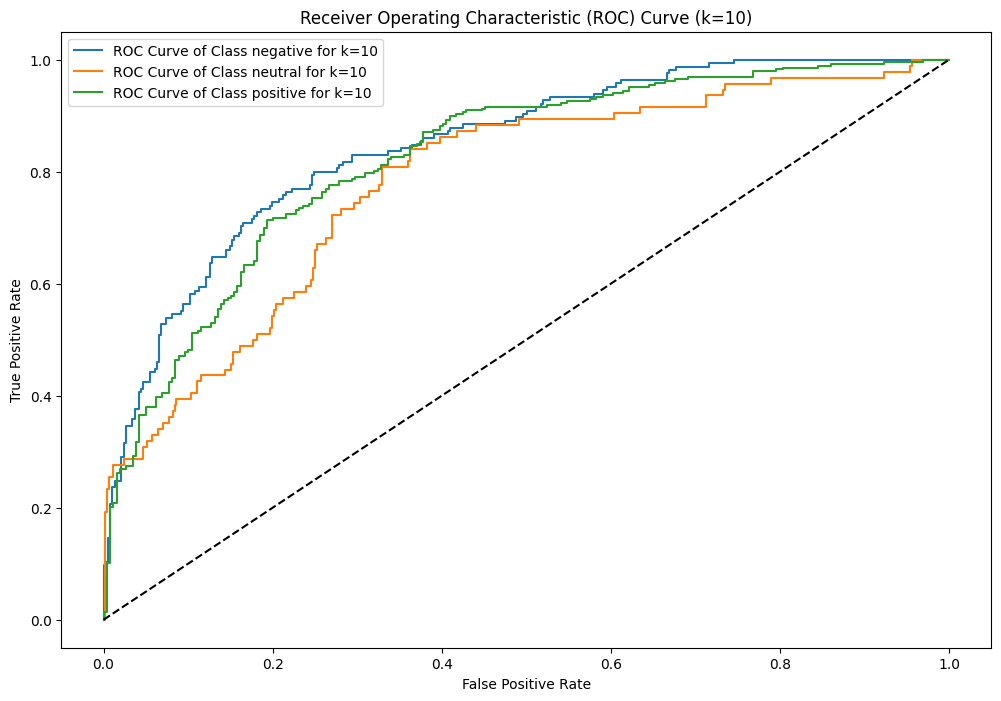

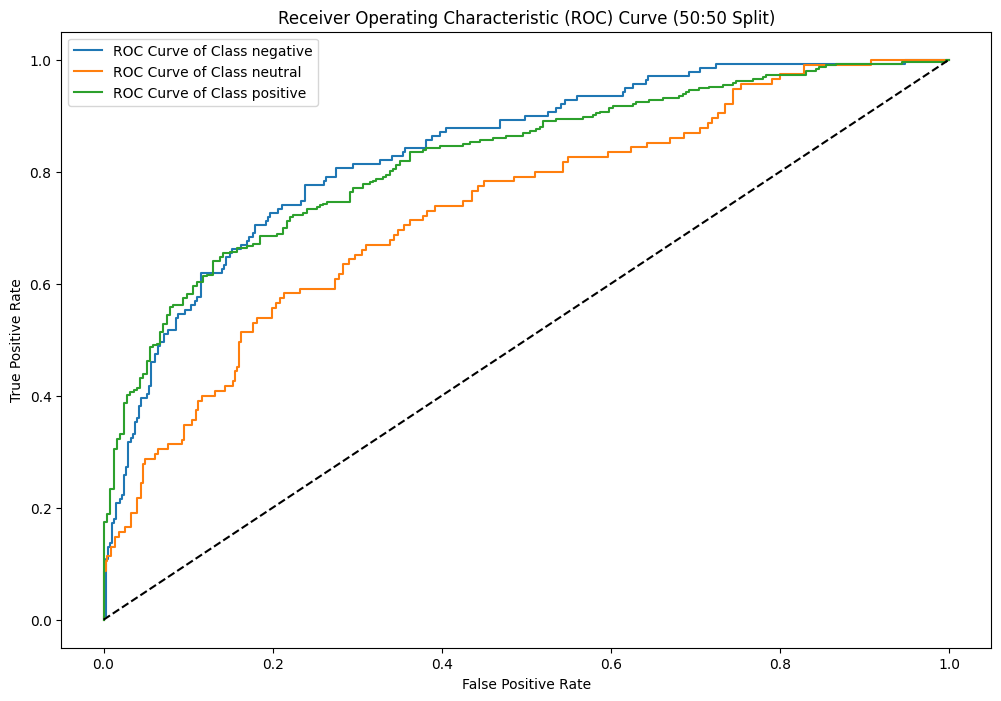

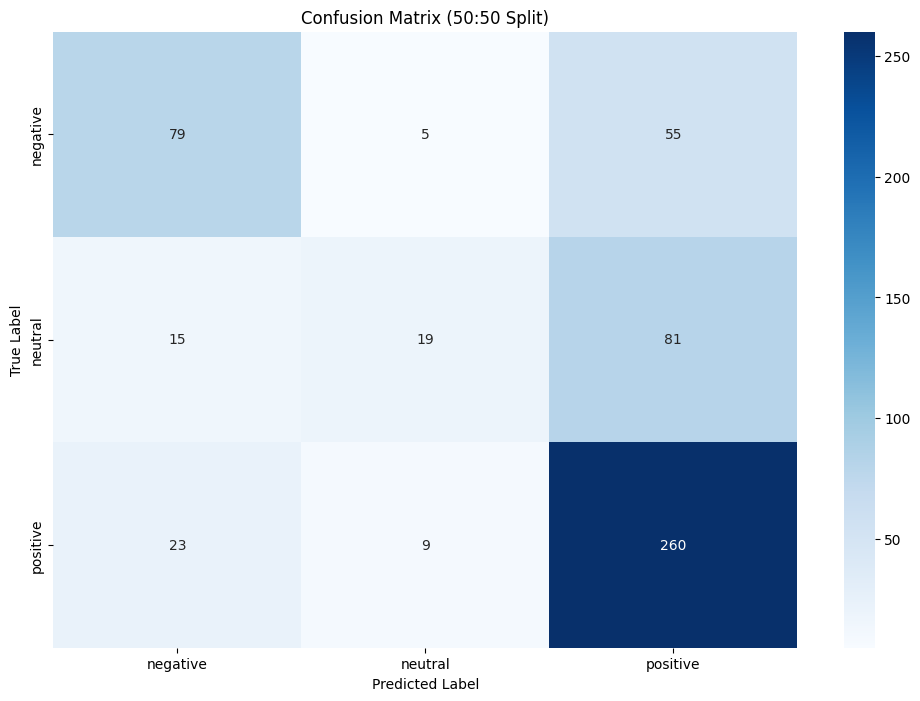

In [192]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, precision_score, recall_score, f1_score
from sklearn.preprocessing import label_binarize, LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# Membaca data dari file CSV
df = pd.read_csv(r'kualitas udara_processed_data_1.csv')

# Tangani nilai yang hilang dan konversi ke string
df['clean_text'] = df['clean_text'].fillna('').astype(str)

# Encode label sentimen menjadi angka
label_encoder = LabelEncoder()
df['sentiment_encoded'] = label_encoder.fit_transform(df['sentiment'])

# Memisahkan fitur dan label
X = df['clean_text']
y = df['sentiment_encoded']

# Pembagian data 50:50
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

# Vectorisasi teks menggunakan TF-IDF dengan parameter tuning
tfidf_vectorizer = TfidfVectorizer(ngram_range=(1, 2), max_features=10000, min_df=3, max_df=0.8)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Inisialisasi model SVM
svm_model = SVC(probability=True)

# Hyperparameter tuning dengan GridSearchCV
param_grid = {
    'C': [0.1, 1.0, 10.0],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}
grid_search = GridSearchCV(svm_model, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train_tfidf, y_train)
best_svm_model = grid_search.best_estimator_

# Fungsi untuk menghitung metrik cross-validation
def evaluate_cross_validation(X, y, k_folds):
    skf = StratifiedKFold(n_splits=k_folds, shuffle=True, random_state=42)
    
    accuracies = []
    y_true = []
    y_pred = []
    y_prob = []
    
    # Track FPR and TPR for ROC curve plotting
    fpr_dict = {i: [] for i in range(len(label_encoder.classes_))}
    tpr_dict = {i: [] for i in range(len(label_encoder.classes_))}
    
    for train_index, test_index in skf.split(X, y):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        
        best_svm_model.fit(X_train, y_train)
        
        # Collect predictions and probabilities
        y_true.extend(y_test)
        y_pred.extend(best_svm_model.predict(X_test))
        y_prob.extend(best_svm_model.predict_proba(X_test))
        
        # Calculate accuracies
        train_acc = best_svm_model.score(X_train, y_train)
        test_acc = best_svm_model.score(X_test, y_test)
        accuracy = (train_acc + test_acc) / 2
        accuracies.append(accuracy)
    
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)
    y_prob = np.array(y_prob)
    
    # Collect FPR and TPR for ROC curve plotting
    y_true_bin = label_binarize(y_true, classes=np.arange(len(label_encoder.classes_)))
    y_prob_array = np.array(y_prob)
    
    for i in range(len(label_encoder.classes_)):
        fpr, tpr, _ = roc_curve(y_true_bin[:, i], y_prob_array[:, i])
        fpr_dict[i].append(fpr)
        tpr_dict[i].append(tpr)
    
    # Metrics
    accuracy = np.mean(accuracies)
    precision = precision_score(y_true, y_pred, average='weighted', zero_division=1)
    recall = recall_score(y_true, y_pred, average='weighted', zero_division=1)
    f1 = f1_score(y_true, y_pred, average='weighted', zero_division=1)
    roc_auc = roc_auc_score(label_binarize(y_true, classes=np.arange(len(label_encoder.classes_))), y_prob, multi_class='ovr')
    
    # Classification Report
    classification_rep = classification_report(y_true, y_pred, target_names=label_encoder.classes_, zero_division=1, output_dict=True)
    
    # Convert classification report to DataFrame
    class_report_df = pd.DataFrame(classification_rep).transpose()
    
    # Confusion Matrix
    conf_matrix = confusion_matrix(y_true, y_pred)
    
    return accuracy, precision, recall, f1, roc_auc, class_report_df, conf_matrix, y_true, y_prob, fpr_dict, tpr_dict

# Evaluasi dengan cross-validation 3, 5, dan 10 folds
roc_data = {}
results = []
for folds in [3, 5, 10]:
    accuracy, precision, recall, f1, roc_auc, class_report_df, conf_matrix, y_true, y_prob, fpr_dict, tpr_dict = evaluate_cross_validation(X_train_tfidf, y_train, folds)
    results.append({
        'Folds': folds,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1,
        'ROC-AUC': roc_auc
    })
    roc_data[folds] = (fpr_dict, tpr_dict)

# Tampilkan hasil dalam bentuk tabel
results_df = pd.DataFrame(results)
print("Summary Results:")
print(results_df[['Folds', 'Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC-AUC']])

# Melatih model dengan data 50:50
best_svm_model.fit(X_train_tfidf, y_train)
y_pred = best_svm_model.predict(X_test_tfidf)
y_prob = best_svm_model.predict_proba(X_test_tfidf)

# Metrik SVM dengan data 50:50
accuracy_50_50 = (y_test == y_pred).mean()
precision_50_50 = precision_score(y_test, y_pred, average='weighted', zero_division=1)
recall_50_50 = recall_score(y_test, y_pred, average='weighted', zero_division=1)
f1_50_50 = f1_score(y_test, y_pred, average='weighted', zero_division=1)
roc_auc_50_50 = roc_auc_score(label_binarize(y_test, classes=np.arange(len(label_encoder.classes_))), y_prob, multi_class='ovr')

# Classification Report
classification_rep_50_50 = classification_report(y_test, y_pred, target_names=label_encoder.classes_, zero_division=1, output_dict=True)
class_report_df_50_50 = pd.DataFrame(classification_rep_50_50).transpose()

# Confusion Matrix
conf_matrix_50_50 = confusion_matrix(y_test, y_pred)

# Tampilkan hasil untuk rasio 50:50
print("\nSVM Accuracy (50:50):", accuracy_50_50)
print("\nSVM Classification Report (50:50):")
print(class_report_df_50_50)
print("ROC-AUC Score (50:50):", roc_auc_50_50)

# Plot ROC Curve untuk setiap k (3, 5, 10)
for folds, (fpr_dict, tpr_dict) in roc_data.items():
    plt.figure(figsize=(12, 8))
    n_classes = len(label_encoder.classes_)
    for i in range(n_classes):
        mean_fpr = np.concatenate(fpr_dict[i])
        mean_tpr = np.concatenate(tpr_dict[i])
        plt.plot(mean_fpr, mean_tpr, label=f'ROC Curve of Class {label_encoder.classes_[i]} for k={folds}')
    
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'Receiver Operating Characteristic (ROC) Curve (k={folds})')
    plt.legend(loc='best')
    plt.show()

# Plot ROC Curve dan Confusion Matrix untuk data 50:50
# Binarize y_test for ROC Curve
y_test_bin = label_binarize(y_test, classes=np.arange(len(label_encoder.classes_)))

# Plot ROC Curve
plt.figure(figsize=(12, 8))
n_classes = len(label_encoder.classes_)
for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_prob[:, i])
    plt.plot(fpr, tpr, label=f'ROC Curve of Class {label_encoder.classes_[i]}')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve (50:50 Split)')
plt.legend(loc='best')
plt.show()

# Plot Confusion Matrix
plt.figure(figsize=(12, 8))
sns.heatmap(conf_matrix_50_50, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix (50:50 Split)')
plt.show()

--> SVM 60:40

Summary Results:
   Folds  Accuracy  Precision    Recall  F1-Score   ROC-AUC
0      3  0.795791   0.651510  0.654962  0.627598  0.785179
1      5  0.805916   0.678835  0.679389  0.656218  0.797947
2     10  0.802706   0.673455  0.679389  0.656703  0.802497

SVM Accuracy (60:40): 0.6796338672768879

SVM Classification Report (60:40):
              precision    recall  f1-score     support
negative       0.657143  0.610619  0.633028  113.000000
neutral        0.687500  0.241758  0.357724   91.000000
positive       0.686667  0.884120  0.772983  233.000000
accuracy       0.679634  0.679634  0.679634    0.679634
macro avg      0.677103  0.578833  0.587911  437.000000
weighted avg   0.679206  0.679634  0.650320  437.000000
ROC-AUC Score (60:40): 0.7982165350948763


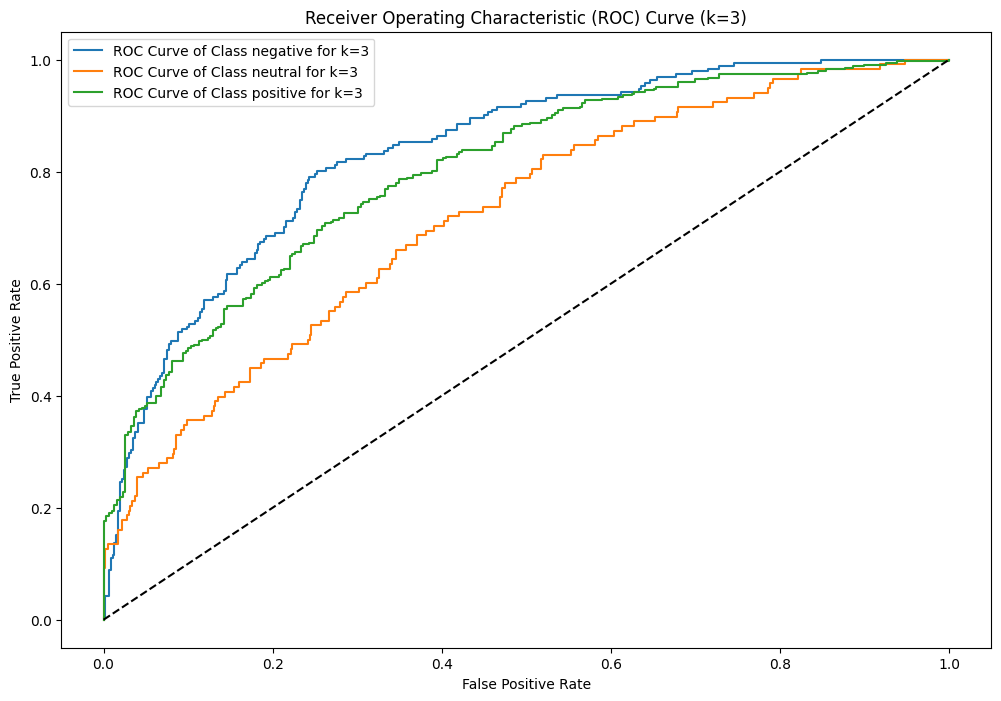

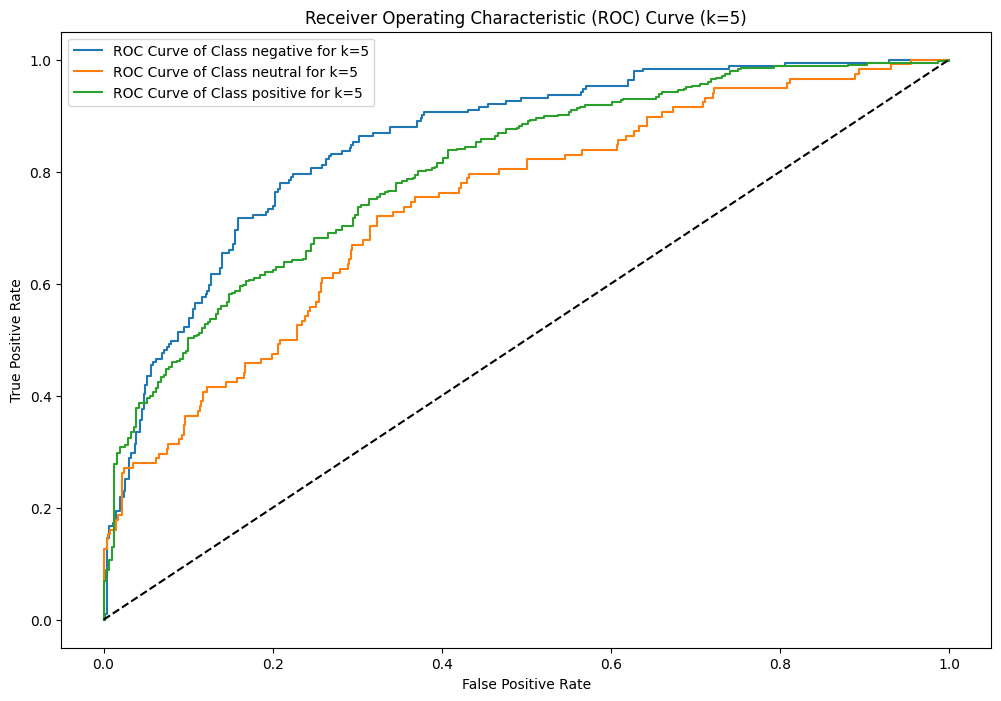

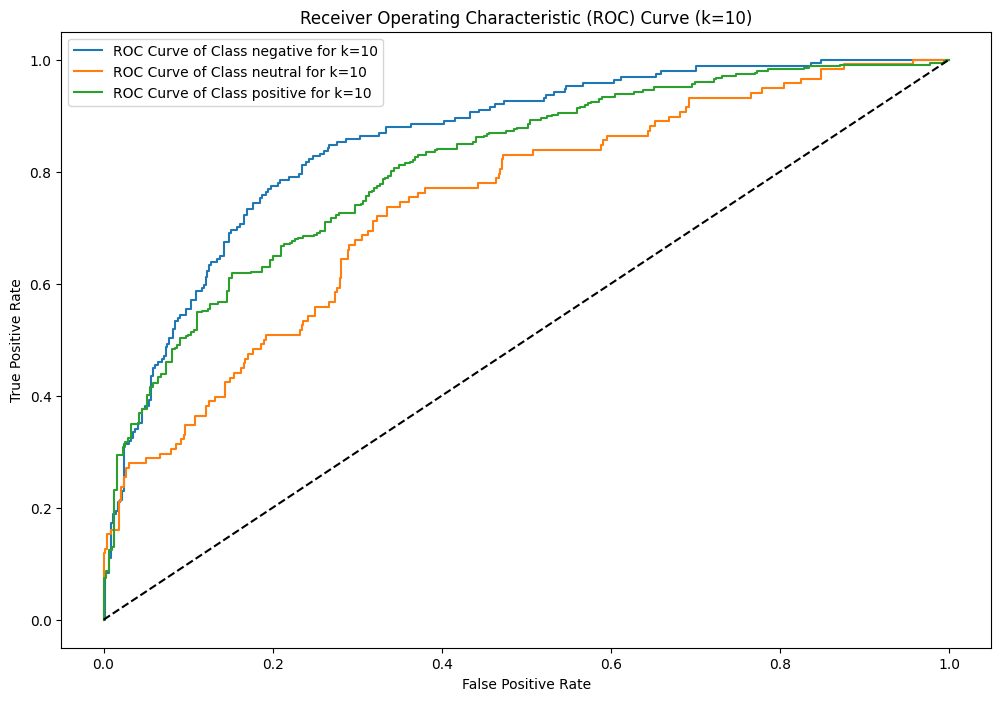

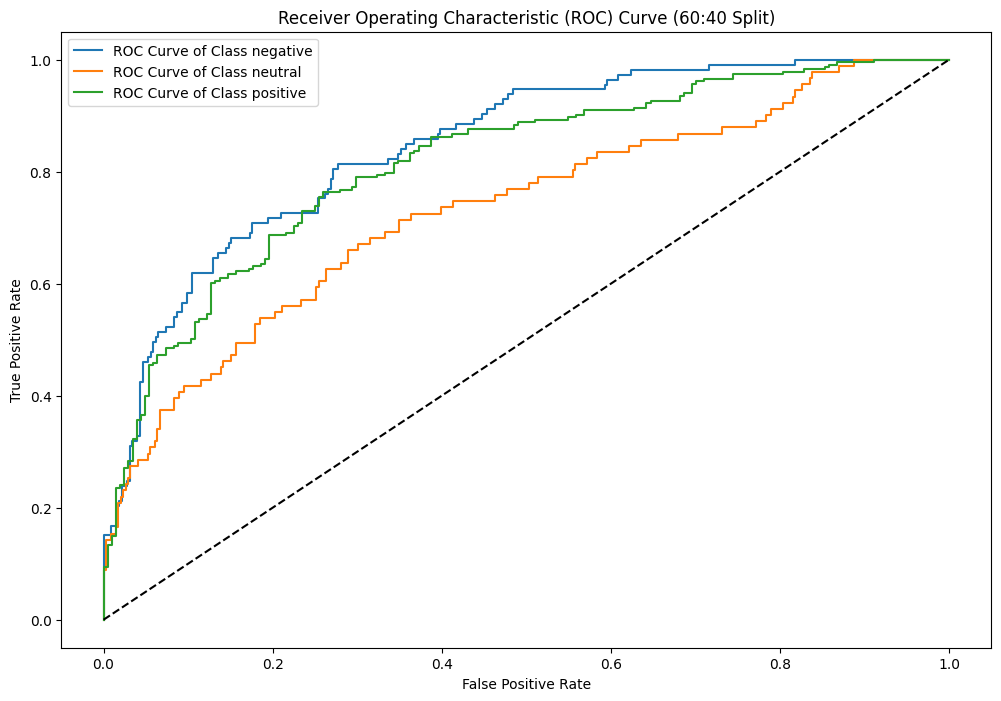

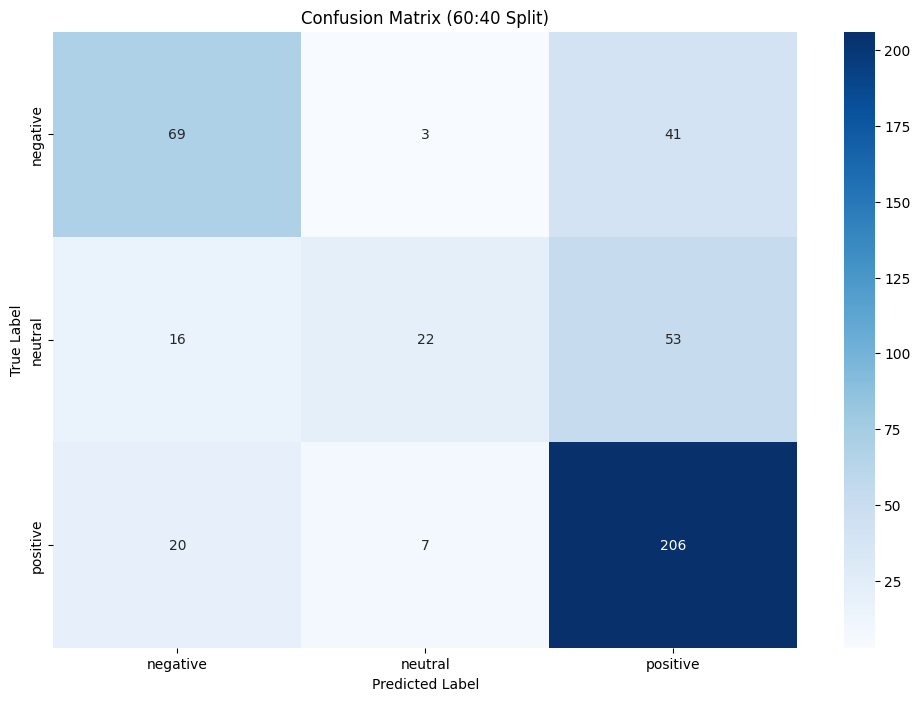

In [193]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, precision_score, recall_score, f1_score
from sklearn.preprocessing import label_binarize, LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# Membaca data dari file CSV
df = pd.read_csv(r'kualitas udara_processed_data_1.csv')

# Tangani nilai yang hilang dan konversi ke string
df['clean_text'] = df['clean_text'].fillna('').astype(str)

# Encode label sentimen menjadi angka
label_encoder = LabelEncoder()
df['sentiment_encoded'] = label_encoder.fit_transform(df['sentiment'])

# Memisahkan fitur dan label
X = df['clean_text']
y = df['sentiment_encoded']

# Pembagian data 60:40
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# Vectorisasi teks menggunakan TF-IDF dengan parameter tuning
tfidf_vectorizer = TfidfVectorizer(ngram_range=(1, 2), max_features=10000, min_df=3, max_df=0.8)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Inisialisasi model SVM
svm_model = SVC(probability=True)

# Hyperparameter tuning dengan GridSearchCV
param_grid = {
    'C': [0.1, 1.0, 10.0],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}
grid_search = GridSearchCV(svm_model, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train_tfidf, y_train)
best_svm_model = grid_search.best_estimator_

# Fungsi untuk menghitung metrik cross-validation
def evaluate_cross_validation(X, y, k_folds):
    skf = StratifiedKFold(n_splits=k_folds, shuffle=True, random_state=42)
    
    accuracies = []
    y_true = []
    y_pred = []
    y_prob = []
    
    # Track FPR and TPR for ROC curve plotting
    fpr_dict = {i: [] for i in range(len(label_encoder.classes_))}
    tpr_dict = {i: [] for i in range(len(label_encoder.classes_))}
    
    for train_index, test_index in skf.split(X, y):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        
        best_svm_model.fit(X_train, y_train)
        
        # Collect predictions and probabilities
        y_true.extend(y_test)
        y_pred.extend(best_svm_model.predict(X_test))
        y_prob.extend(best_svm_model.predict_proba(X_test))
        
        # Calculate accuracies
        train_acc = best_svm_model.score(X_train, y_train)
        test_acc = best_svm_model.score(X_test, y_test)
        accuracy = (train_acc + test_acc) / 2
        accuracies.append(accuracy)
    
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)
    y_prob = np.array(y_prob)
    
    # Collect FPR and TPR for ROC curve plotting
    y_true_bin = label_binarize(y_true, classes=np.arange(len(label_encoder.classes_)))
    y_prob_array = np.array(y_prob)
    
    for i in range(len(label_encoder.classes_)):
        fpr, tpr, _ = roc_curve(y_true_bin[:, i], y_prob_array[:, i])
        fpr_dict[i].append(fpr)
        tpr_dict[i].append(tpr)
    
    # Metrics
    accuracy = np.mean(accuracies)
    precision = precision_score(y_true, y_pred, average='weighted', zero_division=1)
    recall = recall_score(y_true, y_pred, average='weighted', zero_division=1)
    f1 = f1_score(y_true, y_pred, average='weighted', zero_division=1)
    roc_auc = roc_auc_score(label_binarize(y_true, classes=np.arange(len(label_encoder.classes_))), y_prob, multi_class='ovr')
    
    # Classification Report
    classification_rep = classification_report(y_true, y_pred, target_names=label_encoder.classes_, zero_division=1, output_dict=True)
    
    # Convert classification report to DataFrame
    class_report_df = pd.DataFrame(classification_rep).transpose()
    
    # Confusion Matrix
    conf_matrix = confusion_matrix(y_true, y_pred)
    
    return accuracy, precision, recall, f1, roc_auc, class_report_df, conf_matrix, y_true, y_prob, fpr_dict, tpr_dict

# Evaluasi dengan cross-validation 3, 5, dan 10 folds
roc_data = {}
results = []
for folds in [3, 5, 10]:
    accuracy, precision, recall, f1, roc_auc, class_report_df, conf_matrix, y_true, y_prob, fpr_dict, tpr_dict = evaluate_cross_validation(X_train_tfidf, y_train, folds)
    results.append({
        'Folds': folds,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1,
        'ROC-AUC': roc_auc
    })
    roc_data[folds] = (fpr_dict, tpr_dict)

# Tampilkan hasil dalam bentuk tabel
results_df = pd.DataFrame(results)
print("Summary Results:")
print(results_df[['Folds', 'Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC-AUC']])

# Melatih model dengan data 60:40
best_svm_model.fit(X_train_tfidf, y_train)
y_pred = best_svm_model.predict(X_test_tfidf)
y_prob = best_svm_model.predict_proba(X_test_tfidf)

# Metrik SVM dengan data 60:40
accuracy_60_40 = (y_test == y_pred).mean()
precision_60_40 = precision_score(y_test, y_pred, average='weighted', zero_division=1)
recall_60_40 = recall_score(y_test, y_pred, average='weighted', zero_division=1)
f1_60_40 = f1_score(y_test, y_pred, average='weighted', zero_division=1)
roc_auc_60_40 = roc_auc_score(label_binarize(y_test, classes=np.arange(len(label_encoder.classes_))), y_prob, multi_class='ovr')

# Classification Report
classification_rep_60_40 = classification_report(y_test, y_pred, target_names=label_encoder.classes_, zero_division=1, output_dict=True)
class_report_df_60_40 = pd.DataFrame(classification_rep_60_40).transpose()

# Confusion Matrix
conf_matrix_60_40 = confusion_matrix(y_test, y_pred)

# Tampilkan hasil untuk rasio 60:40
print("\nSVM Accuracy (60:40):", accuracy_60_40)
print("\nSVM Classification Report (60:40):")
print(class_report_df_60_40)
print("ROC-AUC Score (60:40):", roc_auc_60_40)

# Plot ROC Curve untuk setiap k (3, 5, 10)
for folds, (fpr_dict, tpr_dict) in roc_data.items():
    plt.figure(figsize=(12, 8))
    n_classes = len(label_encoder.classes_)
    for i in range(n_classes):
        mean_fpr = np.concatenate(fpr_dict[i])
        mean_tpr = np.concatenate(tpr_dict[i])
        plt.plot(mean_fpr, mean_tpr, label=f'ROC Curve of Class {label_encoder.classes_[i]} for k={folds}')
    
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'Receiver Operating Characteristic (ROC) Curve (k={folds})')
    plt.legend(loc='best')
    plt.show()

# Plot ROC Curve dan Confusion Matrix untuk data 60:40
# Binarize y_test for ROC Curve
y_test_bin = label_binarize(y_test, classes=np.arange(len(label_encoder.classes_)))

# Plot ROC Curve
plt.figure(figsize=(12, 8))
n_classes = len(label_encoder.classes_)
for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_prob[:, i])
    plt.plot(fpr, tpr, label=f'ROC Curve of Class {label_encoder.classes_[i]}')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve (60:40 Split)')
plt.legend(loc='best')
plt.show()

# Plot Confusion Matrix
plt.figure(figsize=(12, 8))
sns.heatmap(conf_matrix_60_40, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix (60:40 Split)')
plt.show()

--> SVM 70:30

Summary Results:
   Folds  Accuracy  Precision    Recall  F1-Score   ROC-AUC
0      3  0.814137   0.702007  0.691099  0.659204  0.809819
1      5  0.806470   0.684301  0.683246  0.653623  0.816320
2     10  0.803053   0.671074  0.676702  0.648818  0.813777

SVM Accuracy (70:30): 0.6890243902439024

SVM Classification Report (70:30):
              precision    recall  f1-score     support
negative       0.706667  0.616279  0.658385   86.000000
neutral        0.695652  0.235294  0.351648   68.000000
positive       0.682609  0.902299  0.777228  174.000000
accuracy       0.689024  0.689024  0.689024    0.689024
macro avg      0.694976  0.584624  0.595754  328.000000
weighted avg   0.691621  0.689024  0.657838  328.000000
ROC-AUC Score (70:30): 0.8225276296521616


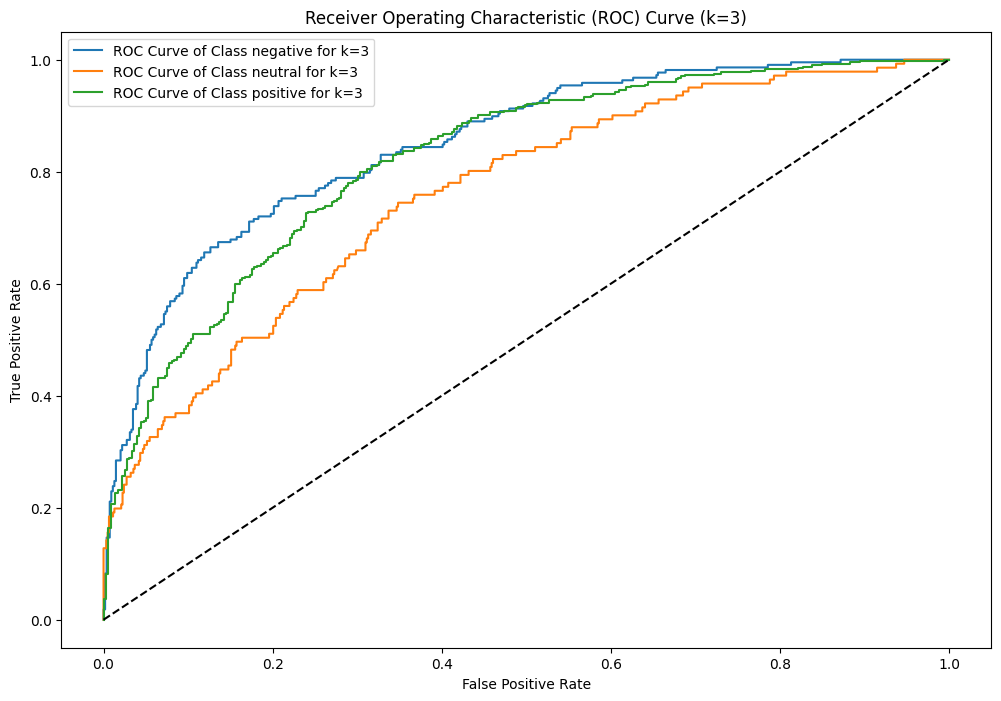

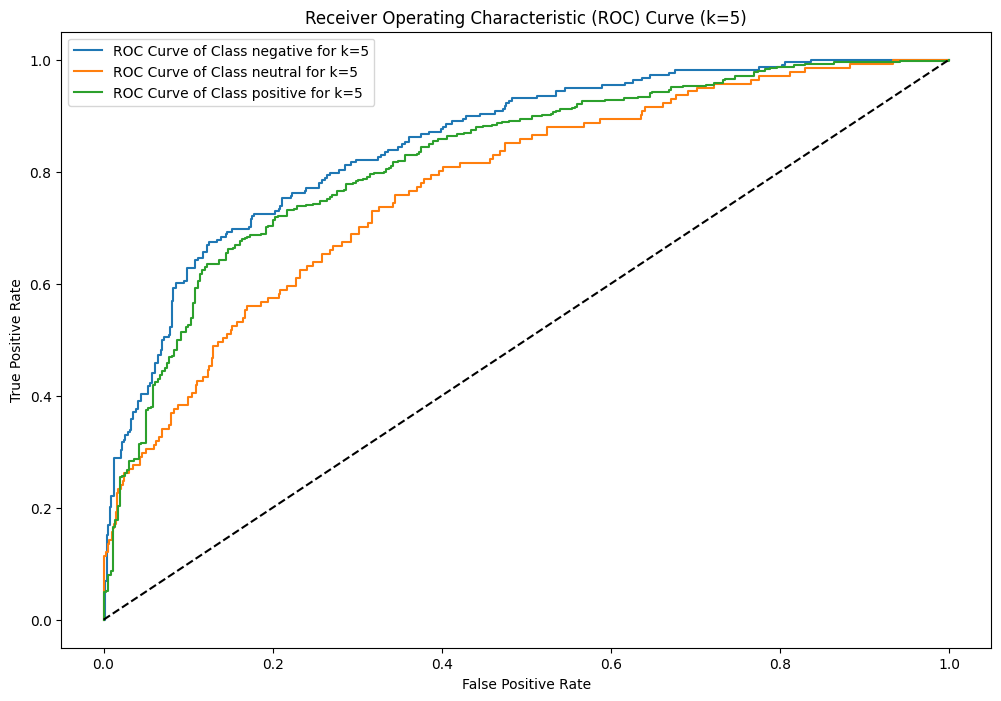

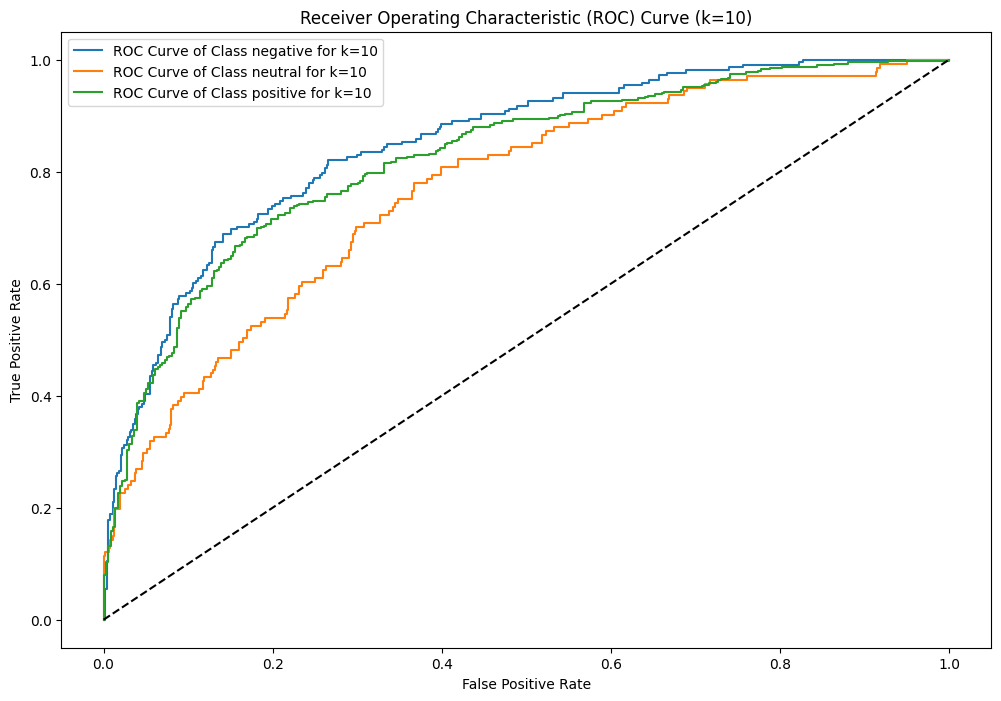

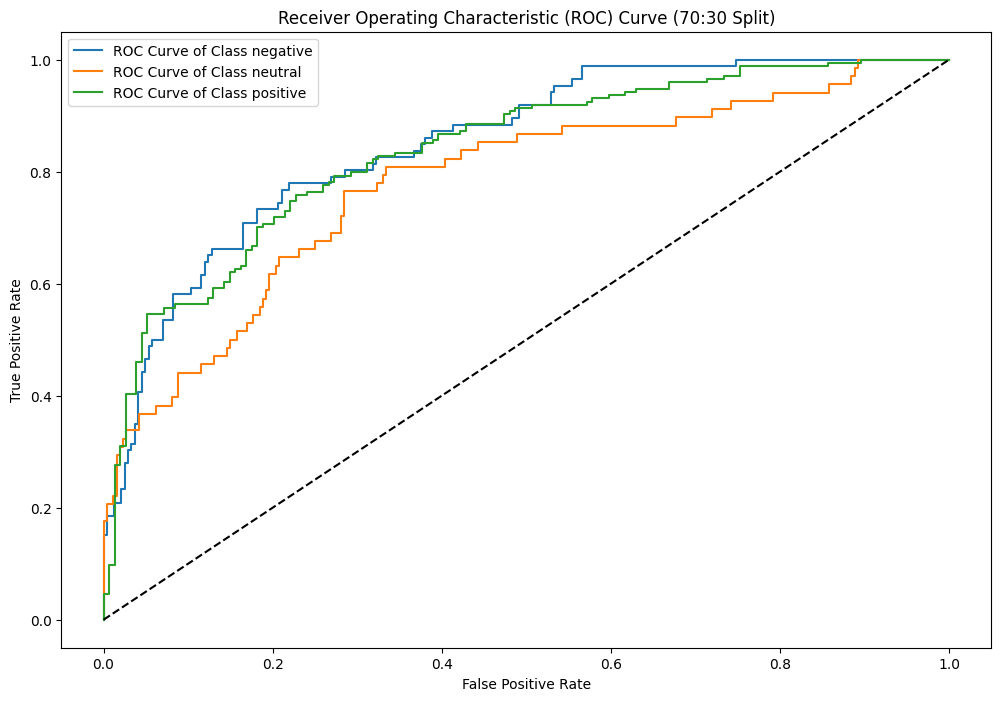

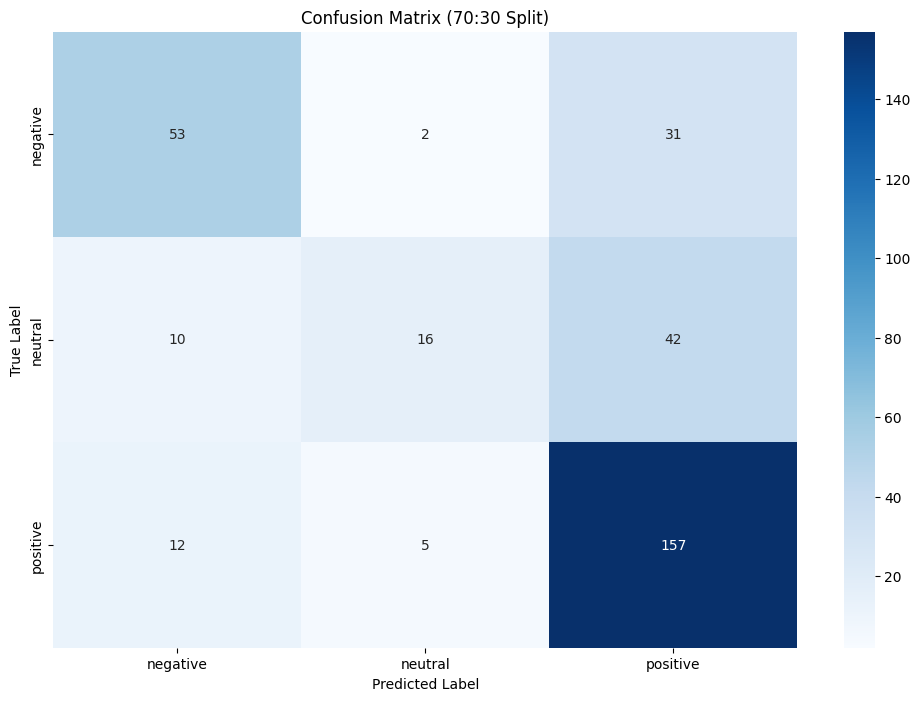

In [194]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, precision_score, recall_score, f1_score
from sklearn.preprocessing import label_binarize, LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# Membaca data dari file CSV
df = pd.read_csv(r'kualitas udara_processed_data_1.csv')

# Tangani nilai yang hilang dan konversi ke string
df['clean_text'] = df['clean_text'].fillna('').astype(str)

# Encode label sentimen menjadi angka
label_encoder = LabelEncoder()
df['sentiment_encoded'] = label_encoder.fit_transform(df['sentiment'])

# Memisahkan fitur dan label
X = df['clean_text']
y = df['sentiment_encoded']

# Pembagian data 70:30
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Vectorisasi teks menggunakan TF-IDF dengan parameter tuning
tfidf_vectorizer = TfidfVectorizer(ngram_range=(1, 2), max_features=10000, min_df=3, max_df=0.8)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Inisialisasi model SVM
svm_model = SVC(probability=True)

# Hyperparameter tuning dengan GridSearchCV
param_grid = {
    'C': [0.1, 1.0, 10.0],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}
grid_search = GridSearchCV(svm_model, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train_tfidf, y_train)
best_svm_model = grid_search.best_estimator_

# Fungsi untuk menghitung metrik cross-validation
def evaluate_cross_validation(X, y, k_folds):
    skf = StratifiedKFold(n_splits=k_folds, shuffle=True, random_state=42)
    
    accuracies = []
    y_true = []
    y_pred = []
    y_prob = []
    
    # Track FPR and TPR for ROC curve plotting
    fpr_dict = {i: [] for i in range(len(label_encoder.classes_))}
    tpr_dict = {i: [] for i in range(len(label_encoder.classes_))}
    
    for train_index, test_index in skf.split(X, y):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        
        best_svm_model.fit(X_train, y_train)
        
        # Collect predictions and probabilities
        y_true.extend(y_test)
        y_pred.extend(best_svm_model.predict(X_test))
        y_prob.extend(best_svm_model.predict_proba(X_test))
        
        # Calculate accuracies
        train_acc = best_svm_model.score(X_train, y_train)
        test_acc = best_svm_model.score(X_test, y_test)
        accuracy = (train_acc + test_acc) / 2
        accuracies.append(accuracy)
    
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)
    y_prob = np.array(y_prob)
    
    # Collect FPR and TPR for ROC curve plotting
    y_true_bin = label_binarize(y_true, classes=np.arange(len(label_encoder.classes_)))
    y_prob_array = np.array(y_prob)
    
    for i in range(len(label_encoder.classes_)):
        fpr, tpr, _ = roc_curve(y_true_bin[:, i], y_prob_array[:, i])
        fpr_dict[i].append(fpr)
        tpr_dict[i].append(tpr)
    
    # Metrics
    accuracy = np.mean(accuracies)
    precision = precision_score(y_true, y_pred, average='weighted', zero_division=1)
    recall = recall_score(y_true, y_pred, average='weighted', zero_division=1)
    f1 = f1_score(y_true, y_pred, average='weighted', zero_division=1)
    roc_auc = roc_auc_score(label_binarize(y_true, classes=np.arange(len(label_encoder.classes_))), y_prob, multi_class='ovr')
    
    # Classification Report
    classification_rep = classification_report(y_true, y_pred, target_names=label_encoder.classes_, zero_division=1, output_dict=True)
    
    # Convert classification report to DataFrame
    class_report_df = pd.DataFrame(classification_rep).transpose()
    
    # Confusion Matrix
    conf_matrix = confusion_matrix(y_true, y_pred)
    
    return accuracy, precision, recall, f1, roc_auc, class_report_df, conf_matrix, y_true, y_prob, fpr_dict, tpr_dict

# Evaluasi dengan cross-validation 3, 5, dan 10 folds
roc_data = {}
results = []
for folds in [3, 5, 10]:
    accuracy, precision, recall, f1, roc_auc, class_report_df, conf_matrix, y_true, y_prob, fpr_dict, tpr_dict = evaluate_cross_validation(X_train_tfidf, y_train, folds)
    results.append({
        'Folds': folds,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1,
        'ROC-AUC': roc_auc
    })
    roc_data[folds] = (fpr_dict, tpr_dict)

# Tampilkan hasil dalam bentuk tabel
results_df = pd.DataFrame(results)
print("Summary Results:")
print(results_df[['Folds', 'Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC-AUC']])

# Melatih model dengan data 70:30
best_svm_model.fit(X_train_tfidf, y_train)
y_pred = best_svm_model.predict(X_test_tfidf)
y_prob = best_svm_model.predict_proba(X_test_tfidf)

# Metrik SVM dengan data 70:30
accuracy_70_30 = (y_test == y_pred).mean()
precision_70_30 = precision_score(y_test, y_pred, average='weighted', zero_division=1)
recall_70_30 = recall_score(y_test, y_pred, average='weighted', zero_division=1)
f1_70_30 = f1_score(y_test, y_pred, average='weighted', zero_division=1)
roc_auc_70_30 = roc_auc_score(label_binarize(y_test, classes=np.arange(len(label_encoder.classes_))), y_prob, multi_class='ovr')

# Classification Report
classification_rep_70_30 = classification_report(y_test, y_pred, target_names=label_encoder.classes_, zero_division=1, output_dict=True)
class_report_df_70_30 = pd.DataFrame(classification_rep_70_30).transpose()

# Confusion Matrix
conf_matrix_70_30 = confusion_matrix(y_test, y_pred)

# Tampilkan hasil untuk rasio 70:30
print("\nSVM Accuracy (70:30):", accuracy_70_30)
print("\nSVM Classification Report (70:30):")
print(class_report_df_70_30)
print("ROC-AUC Score (70:30):", roc_auc_70_30)

# Plot ROC Curve untuk setiap k (3, 5, 10)
for folds, (fpr_dict, tpr_dict) in roc_data.items():
    plt.figure(figsize=(12, 8))
    n_classes = len(label_encoder.classes_)
    for i in range(n_classes):
        mean_fpr = np.concatenate(fpr_dict[i])
        mean_tpr = np.concatenate(tpr_dict[i])
        plt.plot(mean_fpr, mean_tpr, label=f'ROC Curve of Class {label_encoder.classes_[i]} for k={folds}')
    
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'Receiver Operating Characteristic (ROC) Curve (k={folds})')
    plt.legend(loc='best')
    plt.show()

# Plot ROC Curve dan Confusion Matrix untuk data 70:30
# Binarize y_test for ROC Curve
y_test_bin = label_binarize(y_test, classes=np.arange(len(label_encoder.classes_)))

# Plot ROC Curve
plt.figure(figsize=(12, 8))
n_classes = len(label_encoder.classes_)
for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_prob[:, i])
    plt.plot(fpr, tpr, label=f'ROC Curve of Class {label_encoder.classes_[i]}')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve (70:30 Split)')
plt.legend(loc='best')
plt.show()

# Plot Confusion Matrix
plt.figure(figsize=(12, 8))
sns.heatmap(conf_matrix_70_30, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix (70:30 Split)')
plt.show()

--> SVM 80:20

Summary Results:
   Folds  Accuracy  Precision    Recall  F1-Score   ROC-AUC
0      3  0.804696   0.658453  0.663230  0.635731  0.786350
1      5  0.809133   0.674787  0.682703  0.654450  0.802410
2     10  0.805451   0.672116  0.680412  0.653480  0.813895

SVM Accuracy (80:20): 0.6712328767123288

SVM Classification Report (80:20):
              precision    recall  f1-score     support
negative       0.625000  0.603448  0.614035   58.000000
neutral        0.666667  0.232558  0.344828   43.000000
positive       0.689189  0.864407  0.766917  118.000000
accuracy       0.671233  0.671233  0.671233    0.671233
macro avg      0.660285  0.566804  0.575260  219.000000
weighted avg   0.667767  0.671233  0.643552  219.000000
ROC-AUC Score (80:20): 0.820581142448387


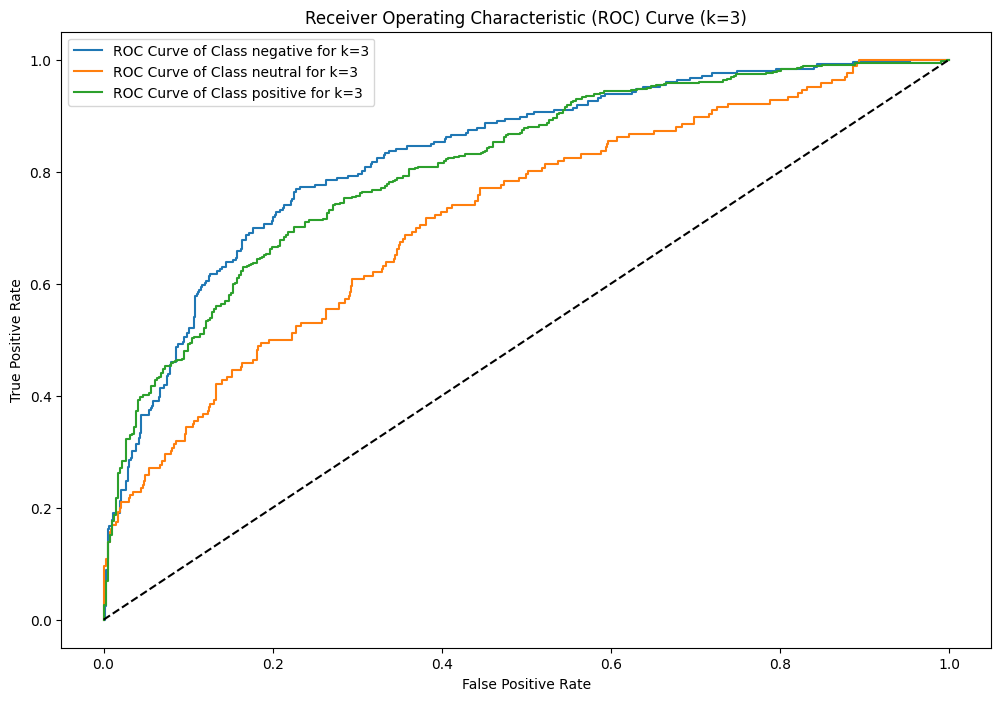

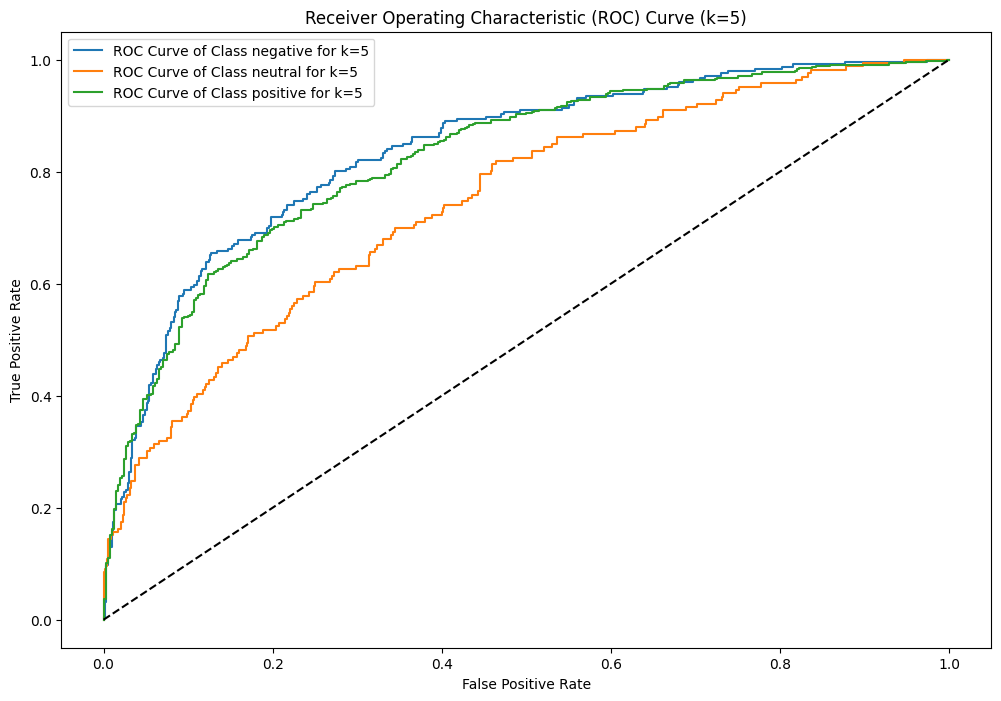

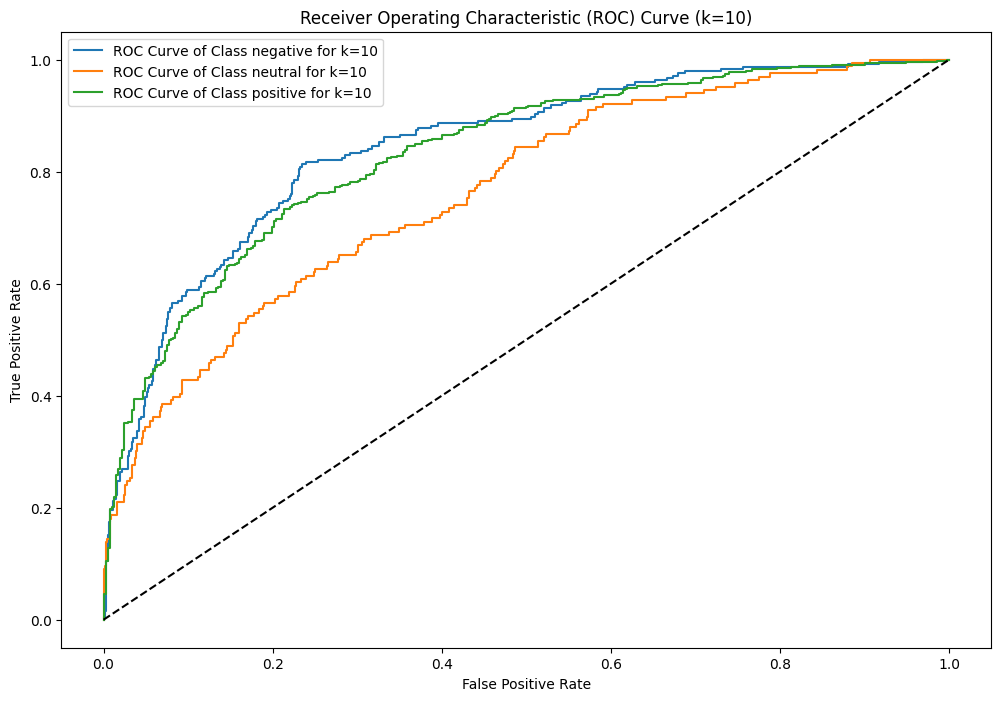

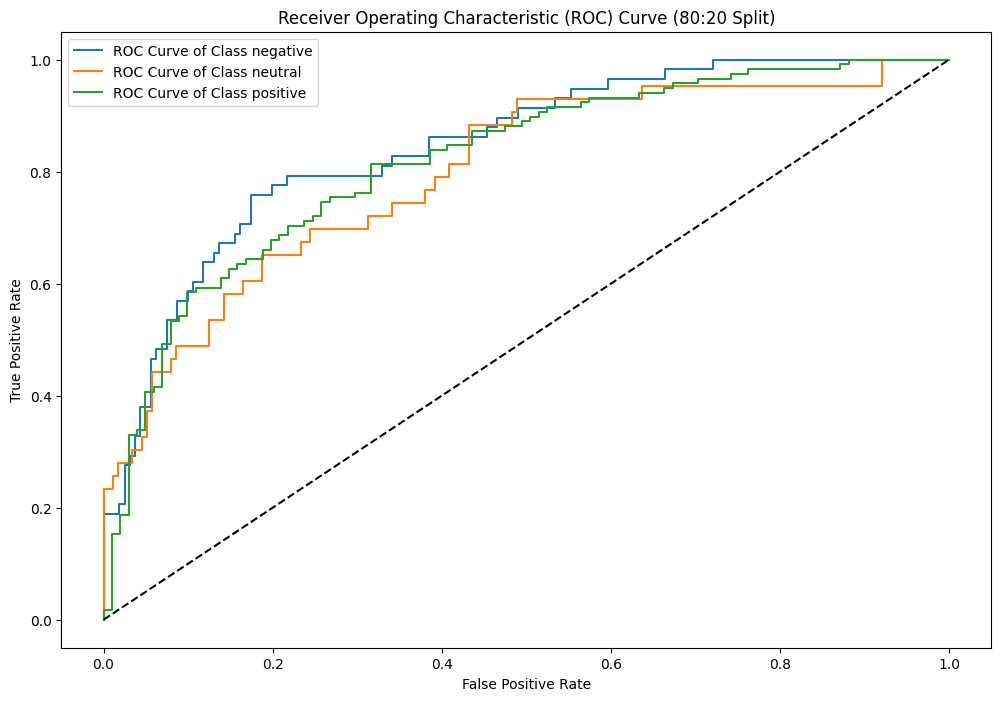

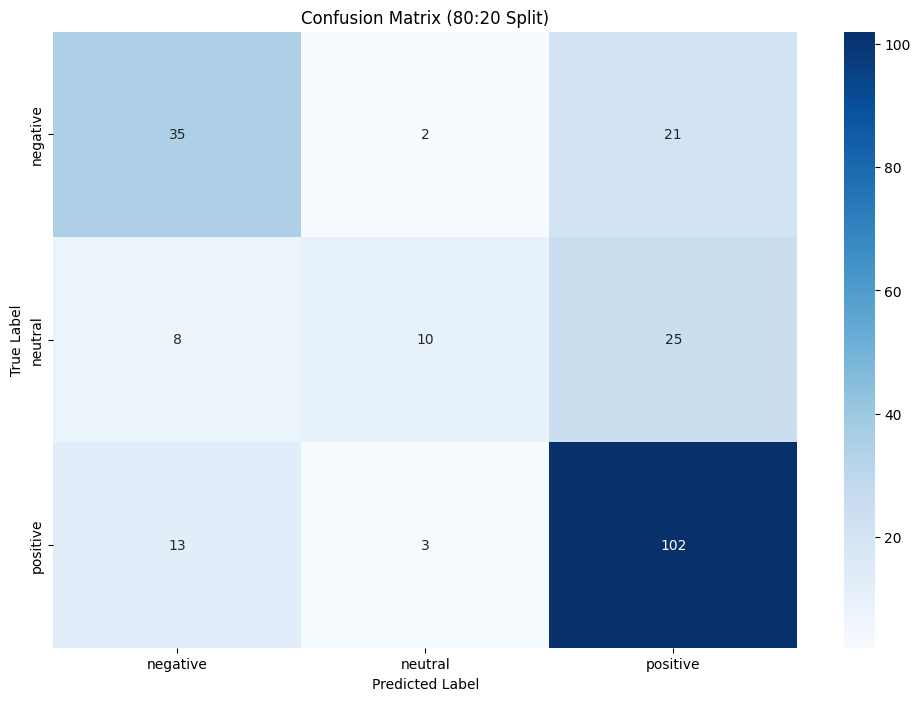

In [196]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, precision_score, recall_score, f1_score
from sklearn.preprocessing import label_binarize, LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# Membaca data dari file CSV
df = pd.read_csv(r'kualitas udara_processed_data_1.csv')

# Tangani nilai yang hilang dan konversi ke string
df['clean_text'] = df['clean_text'].fillna('').astype(str)

# Encode label sentimen menjadi angka
label_encoder = LabelEncoder()
df['sentiment_encoded'] = label_encoder.fit_transform(df['sentiment'])

# Memisahkan fitur dan label
X = df['clean_text']
y = df['sentiment_encoded']

# Pembagian data 80:20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Vectorisasi teks menggunakan TF-IDF dengan parameter tuning
tfidf_vectorizer = TfidfVectorizer(ngram_range=(1, 2), max_features=10000, min_df=3, max_df=0.8)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Inisialisasi model SVM
svm_model = SVC(probability=True)

# Hyperparameter tuning dengan GridSearchCV
param_grid = {
    'C': [0.1, 1.0, 10.0],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}
grid_search = GridSearchCV(svm_model, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train_tfidf, y_train)
best_svm_model = grid_search.best_estimator_

# Fungsi untuk menghitung metrik cross-validation
def evaluate_cross_validation(X, y, k_folds):
    skf = StratifiedKFold(n_splits=k_folds, shuffle=True, random_state=42)
    
    accuracies = []
    y_true = []
    y_pred = []
    y_prob = []
    
    # Track FPR and TPR for ROC curve plotting
    fpr_dict = {i: [] for i in range(len(label_encoder.classes_))}
    tpr_dict = {i: [] for i in range(len(label_encoder.classes_))}
    
    for train_index, test_index in skf.split(X, y):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        
        best_svm_model.fit(X_train, y_train)
        
        # Collect predictions and probabilities
        y_true.extend(y_test)
        y_pred.extend(best_svm_model.predict(X_test))
        y_prob.extend(best_svm_model.predict_proba(X_test))
        
        # Calculate accuracies
        train_acc = best_svm_model.score(X_train, y_train)
        test_acc = best_svm_model.score(X_test, y_test)
        accuracy = (train_acc + test_acc) / 2
        accuracies.append(accuracy)
    
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)
    y_prob = np.array(y_prob)
    
    # Collect FPR and TPR for ROC curve plotting
    y_true_bin = label_binarize(y_true, classes=np.arange(len(label_encoder.classes_)))
    y_prob_array = np.array(y_prob)
    
    for i in range(len(label_encoder.classes_)):
        fpr, tpr, _ = roc_curve(y_true_bin[:, i], y_prob_array[:, i])
        fpr_dict[i].append(fpr)
        tpr_dict[i].append(tpr)
    
    # Metrics
    accuracy = np.mean(accuracies)
    precision = precision_score(y_true, y_pred, average='weighted', zero_division=1)
    recall = recall_score(y_true, y_pred, average='weighted', zero_division=1)
    f1 = f1_score(y_true, y_pred, average='weighted', zero_division=1)
    roc_auc = roc_auc_score(label_binarize(y_true, classes=np.arange(len(label_encoder.classes_))), y_prob, multi_class='ovr')
    
    # Classification Report
    classification_rep = classification_report(y_true, y_pred, target_names=label_encoder.classes_, zero_division=1, output_dict=True)
    
    # Convert classification report to DataFrame
    class_report_df = pd.DataFrame(classification_rep).transpose()
    
    # Confusion Matrix
    conf_matrix = confusion_matrix(y_true, y_pred)
    
    return accuracy, precision, recall, f1, roc_auc, class_report_df, conf_matrix, y_true, y_prob, fpr_dict, tpr_dict

# Evaluasi dengan cross-validation 3, 5, dan 10 folds
roc_data = {}
results = []
for folds in [3, 5, 10]:
    accuracy, precision, recall, f1, roc_auc, class_report_df, conf_matrix, y_true, y_prob, fpr_dict, tpr_dict = evaluate_cross_validation(X_train_tfidf, y_train, folds)
    results.append({
        'Folds': folds,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1,
        'ROC-AUC': roc_auc
    })
    roc_data[folds] = (fpr_dict, tpr_dict)

# Tampilkan hasil dalam bentuk tabel
results_df = pd.DataFrame(results)
print("Summary Results:")
print(results_df[['Folds', 'Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC-AUC']])

# Melatih model dengan data 80:20
best_svm_model.fit(X_train_tfidf, y_train)
y_pred = best_svm_model.predict(X_test_tfidf)
y_prob = best_svm_model.predict_proba(X_test_tfidf)

# Metrik SVM dengan data 80:20
accuracy_80_20 = (y_test == y_pred).mean()
precision_80_20 = precision_score(y_test, y_pred, average='weighted', zero_division=1)
recall_80_20 = recall_score(y_test, y_pred, average='weighted', zero_division=1)
f1_80_20 = f1_score(y_test, y_pred, average='weighted', zero_division=1)
roc_auc_80_20 = roc_auc_score(label_binarize(y_test, classes=np.arange(len(label_encoder.classes_))), y_prob, multi_class='ovr')

# Classification Report
classification_rep_80_20 = classification_report(y_test, y_pred, target_names=label_encoder.classes_, zero_division=1, output_dict=True)
class_report_df_80_20 = pd.DataFrame(classification_rep_80_20).transpose()

# Confusion Matrix
conf_matrix_80_20 = confusion_matrix(y_test, y_pred)

# Tampilkan hasil untuk rasio 80:20
print("\nSVM Accuracy (80:20):", accuracy_80_20)
print("\nSVM Classification Report (80:20):")
print(class_report_df_80_20)
print("ROC-AUC Score (80:20):", roc_auc_80_20)

# Plot ROC Curve untuk setiap k (3, 5, 10)
for folds, (fpr_dict, tpr_dict) in roc_data.items():
    plt.figure(figsize=(12, 8))
    n_classes = len(label_encoder.classes_)
    for i in range(n_classes):
        mean_fpr = np.concatenate(fpr_dict[i])
        mean_tpr = np.concatenate(tpr_dict[i])
        plt.plot(mean_fpr, mean_tpr, label=f'ROC Curve of Class {label_encoder.classes_[i]} for k={folds}')
    
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'Receiver Operating Characteristic (ROC) Curve (k={folds})')
    plt.legend(loc='best')
    plt.show()

# Plot ROC Curve dan Confusion Matrix untuk data 80:20
# Binarize y_test for ROC Curve
y_test_bin = label_binarize(y_test, classes=np.arange(len(label_encoder.classes_)))

# Plot ROC Curve
plt.figure(figsize=(12, 8))
n_classes = len(label_encoder.classes_)
for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_prob[:, i])
    plt.plot(fpr, tpr, label=f'ROC Curve of Class {label_encoder.classes_[i]}')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve (80:20 Split)')
plt.legend(loc='best')
plt.show()

# Plot Confusion Matrix
plt.figure(figsize=(12, 8))
sns.heatmap(conf_matrix_80_20, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix (80:20 Split)')
plt.show()

--> SVM 90:10

Summary Results:
   Folds  Accuracy  Precision    Recall  F1-Score   ROC-AUC
0      3  0.820270   0.701598  0.696538  0.671317  0.820207
1      5  0.817231   0.700537  0.695519  0.669994  0.835690
2     10  0.818190   0.694968  0.699593  0.674720  0.839839

SVM Accuracy (90:10): 0.7

SVM Classification Report (90:10):
              precision    recall  f1-score  support
negative       0.620690  0.720000  0.666667     25.0
neutral        0.692308  0.375000  0.486486     24.0
positive       0.735294  0.819672  0.775194     61.0
accuracy       0.700000  0.700000  0.700000      0.7
macro avg      0.682764  0.638224  0.642782    110.0
weighted avg   0.699869  0.700000  0.687538    110.0
ROC-AUC Score (90:10): 0.8317496158712564


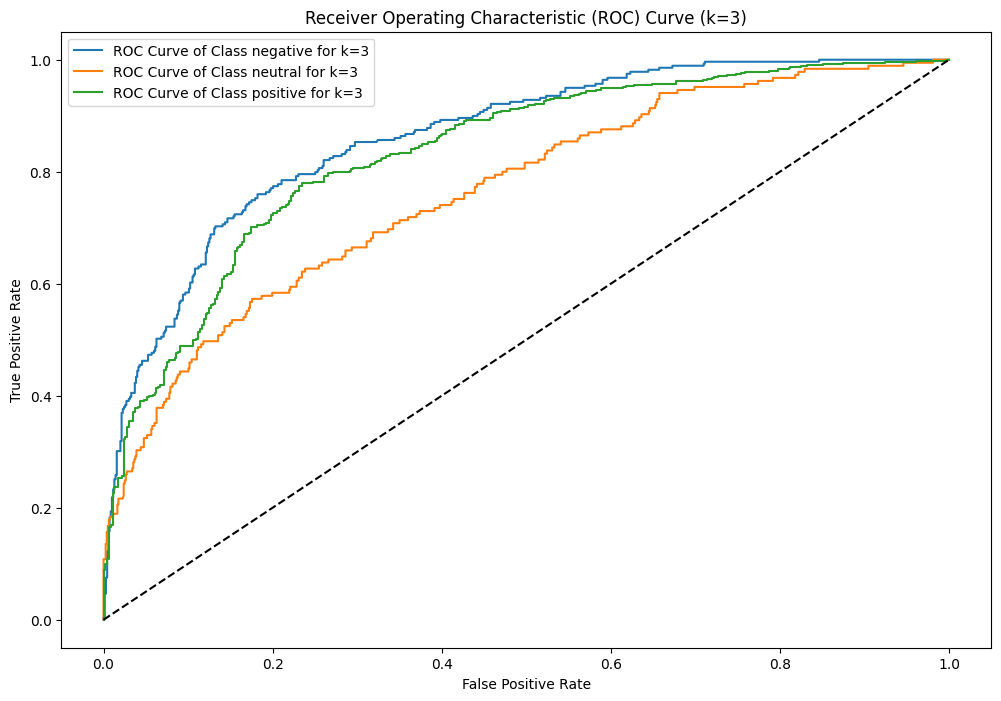

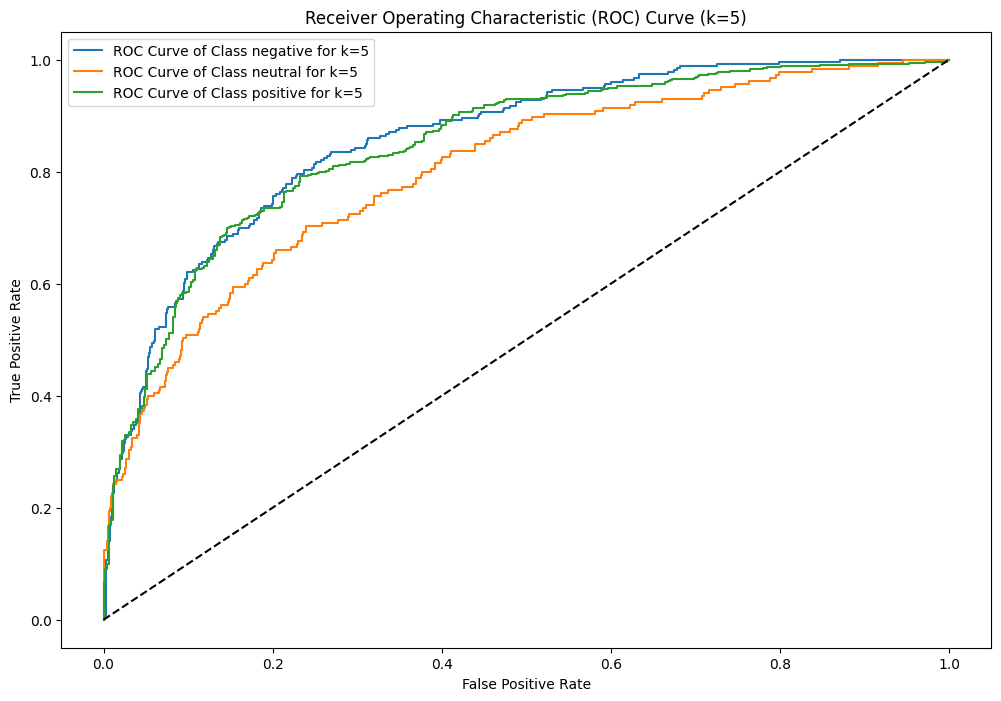

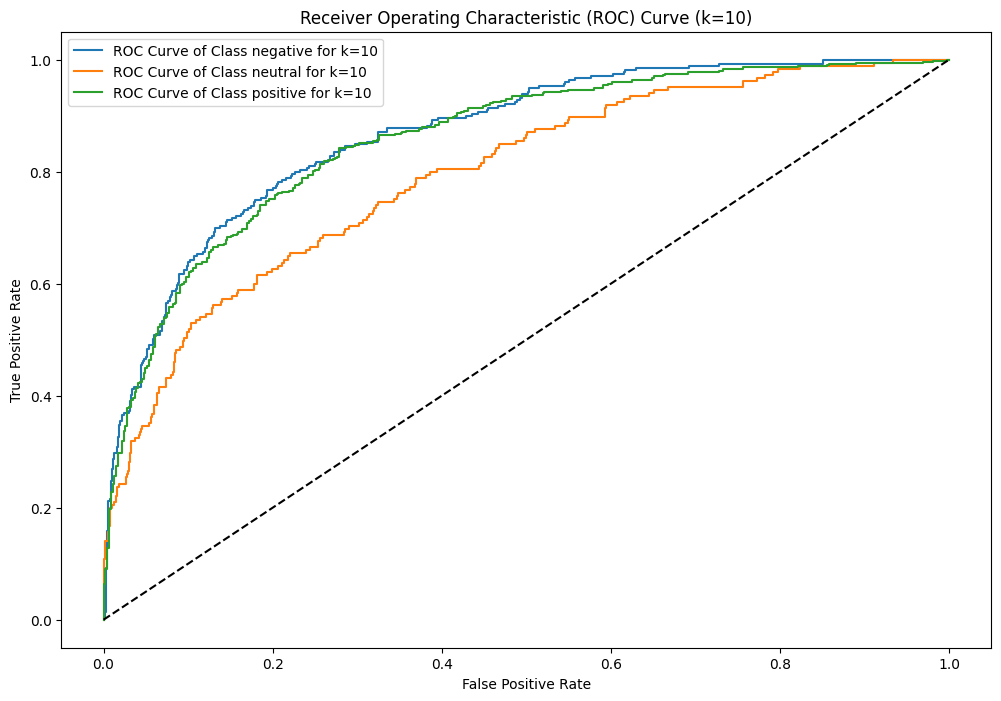

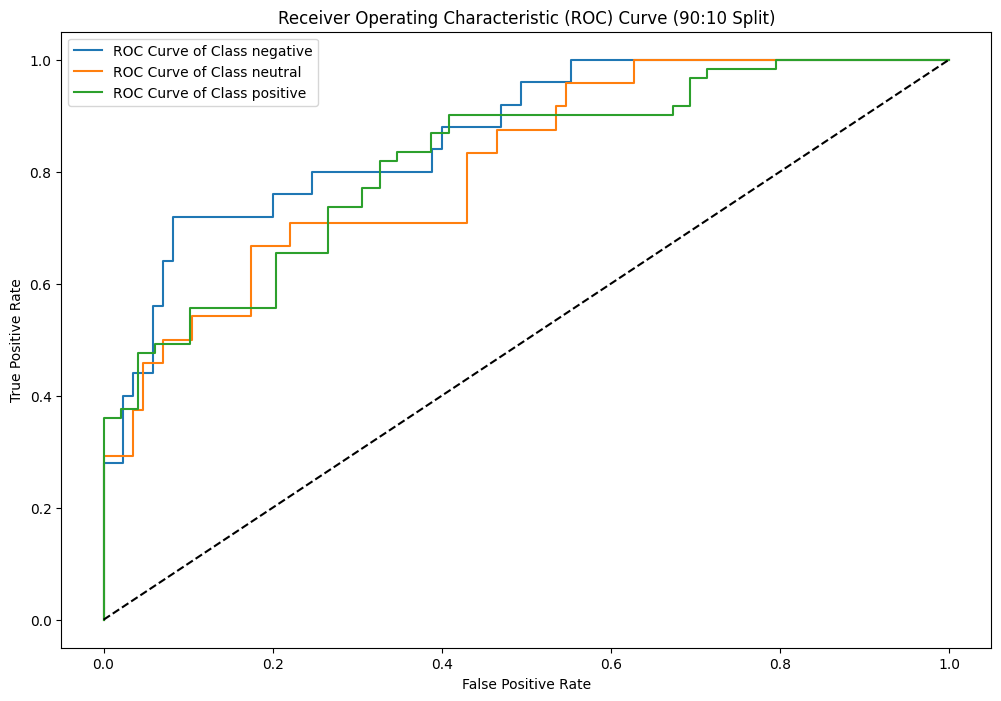

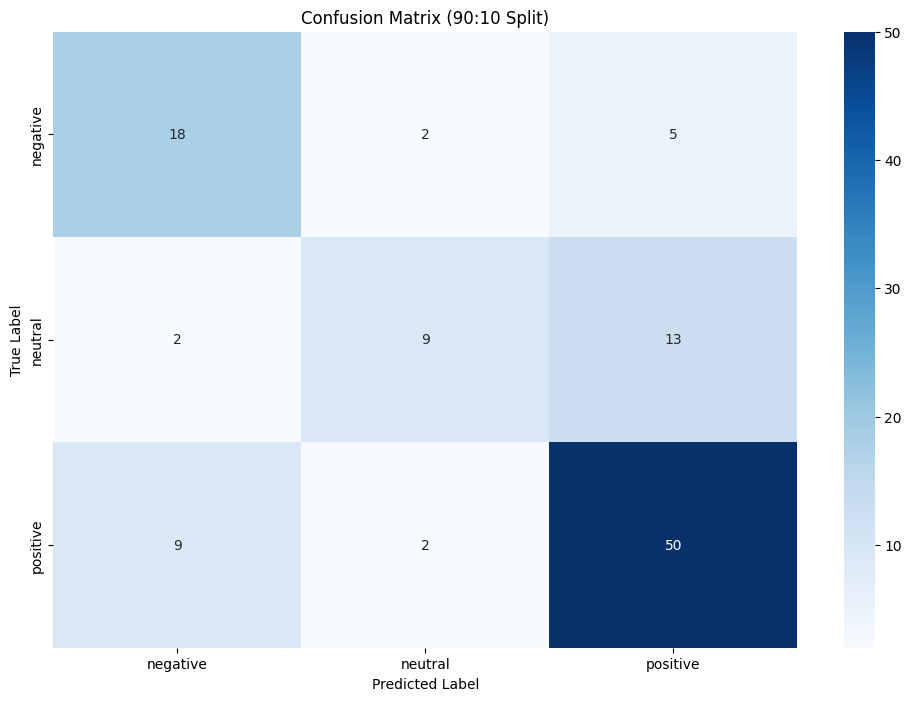

In [197]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, precision_score, recall_score, f1_score
from sklearn.preprocessing import label_binarize, LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# Membaca data dari file CSV
df = pd.read_csv(r'kualitas udara_processed_data_1.csv')

# Tangani nilai yang hilang dan konversi ke string
df['clean_text'] = df['clean_text'].fillna('').astype(str)

# Encode label sentimen menjadi angka
label_encoder = LabelEncoder()
df['sentiment_encoded'] = label_encoder.fit_transform(df['sentiment'])

# Memisahkan fitur dan label
X = df['clean_text']
y = df['sentiment_encoded']

# Pembagian data 90:10
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Vectorisasi teks menggunakan TF-IDF dengan parameter tuning
tfidf_vectorizer = TfidfVectorizer(ngram_range=(1, 2), max_features=10000, min_df=3, max_df=0.8)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Inisialisasi model SVM
svm_model = SVC(probability=True)

# Hyperparameter tuning dengan GridSearchCV
param_grid = {
    'C': [0.1, 1.0, 10.0],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}
grid_search = GridSearchCV(svm_model, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train_tfidf, y_train)
best_svm_model = grid_search.best_estimator_

# Fungsi untuk menghitung metrik cross-validation
def evaluate_cross_validation(X, y, k_folds):
    skf = StratifiedKFold(n_splits=k_folds, shuffle=True, random_state=42)
    
    accuracies = []
    y_true = []
    y_pred = []
    y_prob = []
    
    # Track FPR and TPR for ROC curve plotting
    fpr_dict = {i: [] for i in range(len(label_encoder.classes_))}
    tpr_dict = {i: [] for i in range(len(label_encoder.classes_))}
    
    for train_index, test_index in skf.split(X, y):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        
        best_svm_model.fit(X_train, y_train)
        
        # Collect predictions and probabilities
        y_true.extend(y_test)
        y_pred.extend(best_svm_model.predict(X_test))
        y_prob.extend(best_svm_model.predict_proba(X_test))
        
        # Calculate accuracies
        train_acc = best_svm_model.score(X_train, y_train)
        test_acc = best_svm_model.score(X_test, y_test)
        accuracy = (train_acc + test_acc) / 2
        accuracies.append(accuracy)
    
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)
    y_prob = np.array(y_prob)
    
    # Collect FPR and TPR for ROC curve plotting
    y_true_bin = label_binarize(y_true, classes=np.arange(len(label_encoder.classes_)))
    y_prob_array = np.array(y_prob)
    
    for i in range(len(label_encoder.classes_)):
        fpr, tpr, _ = roc_curve(y_true_bin[:, i], y_prob_array[:, i])
        fpr_dict[i].append(fpr)
        tpr_dict[i].append(tpr)
    
    # Metrics
    accuracy = np.mean(accuracies)
    precision = precision_score(y_true, y_pred, average='weighted', zero_division=1)
    recall = recall_score(y_true, y_pred, average='weighted', zero_division=1)
    f1 = f1_score(y_true, y_pred, average='weighted', zero_division=1)
    roc_auc = roc_auc_score(label_binarize(y_true, classes=np.arange(len(label_encoder.classes_))), y_prob, multi_class='ovr')
    
    # Classification Report
    classification_rep = classification_report(y_true, y_pred, target_names=label_encoder.classes_, zero_division=1, output_dict=True)
    
    # Convert classification report to DataFrame
    class_report_df = pd.DataFrame(classification_rep).transpose()
    
    # Confusion Matrix
    conf_matrix = confusion_matrix(y_true, y_pred)
    
    return accuracy, precision, recall, f1, roc_auc, class_report_df, conf_matrix, y_true, y_prob, fpr_dict, tpr_dict

# Evaluasi dengan cross-validation 3, 5, dan 10 folds
roc_data = {}
results = []
for folds in [3, 5, 10]:
    accuracy, precision, recall, f1, roc_auc, class_report_df, conf_matrix, y_true, y_prob, fpr_dict, tpr_dict = evaluate_cross_validation(X_train_tfidf, y_train, folds)
    results.append({
        'Folds': folds,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1,
        'ROC-AUC': roc_auc
    })
    roc_data[folds] = (fpr_dict, tpr_dict)

# Tampilkan hasil dalam bentuk tabel
results_df = pd.DataFrame(results)
print("Summary Results:")
print(results_df[['Folds', 'Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC-AUC']])

# Melatih model dengan data 90:10
best_svm_model.fit(X_train_tfidf, y_train)
y_pred = best_svm_model.predict(X_test_tfidf)
y_prob = best_svm_model.predict_proba(X_test_tfidf)

# Metrik SVM dengan data 90:10
accuracy_90_10 = (y_test == y_pred).mean()
precision_90_10 = precision_score(y_test, y_pred, average='weighted', zero_division=1)
recall_90_10 = recall_score(y_test, y_pred, average='weighted', zero_division=1)
f1_90_10 = f1_score(y_test, y_pred, average='weighted', zero_division=1)
roc_auc_90_10 = roc_auc_score(label_binarize(y_test, classes=np.arange(len(label_encoder.classes_))), y_prob, multi_class='ovr')

# Classification Report
classification_rep_90_10 = classification_report(y_test, y_pred, target_names=label_encoder.classes_, zero_division=1, output_dict=True)
class_report_df_90_10 = pd.DataFrame(classification_rep_90_10).transpose()

# Confusion Matrix
conf_matrix_90_10 = confusion_matrix(y_test, y_pred)

# Tampilkan hasil untuk rasio 90:10
print("\nSVM Accuracy (90:10):", accuracy_90_10)
print("\nSVM Classification Report (90:10):")
print(class_report_df_90_10)
print("ROC-AUC Score (90:10):", roc_auc_90_10)

# Plot ROC Curve untuk setiap k (3, 5, 10)
for folds, (fpr_dict, tpr_dict) in roc_data.items():
    plt.figure(figsize=(12, 8))
    n_classes = len(label_encoder.classes_)
    for i in range(n_classes):
        mean_fpr = np.concatenate(fpr_dict[i])
        mean_tpr = np.concatenate(tpr_dict[i])
        plt.plot(mean_fpr, mean_tpr, label=f'ROC Curve of Class {label_encoder.classes_[i]} for k={folds}')
    
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'Receiver Operating Characteristic (ROC) Curve (k={folds})')
    plt.legend(loc='best')
    plt.show()

# Plot ROC Curve dan Confusion Matrix untuk data 90:10
# Binarize y_test for ROC Curve
y_test_bin = label_binarize(y_test, classes=np.arange(len(label_encoder.classes_)))

# Plot ROC Curve
plt.figure(figsize=(12, 8))
n_classes = len(label_encoder.classes_)
for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_prob[:, i])
    plt.plot(fpr, tpr, label=f'ROC Curve of Class {label_encoder.classes_[i]}')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve (90:10 Split)')
plt.legend(loc='best')
plt.show()

# Plot Confusion Matrix
plt.figure(figsize=(12, 8))
sns.heatmap(conf_matrix_90_10, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix (90:10 Split)')
plt.show()

In [6]:
import pandas as pd

# Data untuk SVM Accuracy dengan berbagai split
data_50_50_svm = {
    'Folds': [3, 5, 10],
    'Accuracy': [0.841117, 0.843633, 0.848210],
    'Precision': [0.707493, 0.718625, 0.712052],
    'Recall': [0.683150, 0.688645, 0.697802],
    'F1-Score': [0.653091, 0.656789, 0.672553],
    'ROC-AUC': [0.796753, 0.810554, 0.817997],
    'Split': ['50:50'] * 3
}

data_60_40_svm = {
    'Folds': [3, 5, 10],
    'Accuracy': [0.795791, 0.805916, 0.802706],
    'Precision': [0.651510, 0.678835, 0.673455],
    'Recall': [0.654962, 0.679389, 0.679389],
    'F1-Score': [0.627598, 0.656218, 0.656703],
    'ROC-AUC': [0.785179, 0.797947, 0.802497],
    'Split': ['60:40'] * 3
}

data_70_30_svm = {
    'Folds': [3, 5, 10],
    'Accuracy': [0.814137, 0.806470, 0.803053],
    'Precision': [0.702007, 0.684301, 0.671074],
    'Recall': [0.691099, 0.683246, 0.676702],
    'F1-Score': [0.659204, 0.653623, 0.648818],
    'ROC-AUC': [0.809819, 0.816320, 0.813777],
    'Split': ['70:30'] * 3
}

data_80_20_svm = {
    'Folds': [3, 5, 10],
    'Accuracy': [0.804696, 0.809133, 0.805451],
    'Precision': [0.658453, 0.674787, 0.672116],
    'Recall': [0.663230, 0.682703, 0.680412],
    'F1-Score': [0.635731, 0.654450, 0.653480],
    'ROC-AUC': [0.786350, 0.802410, 0.813895],
    'Split': ['80:20'] * 3
}

data_90_10_svm = {
    'Folds': [3, 5, 10],
    'Accuracy': [0.820270, 0.817231, 0.818190],
    'Precision': [0.701598, 0.700537, 0.694968],
    'Recall': [0.696538, 0.695519, 0.699593],
    'F1-Score': [0.671317, 0.669994, 0.674720],
    'ROC-AUC': [0.820207, 0.835690, 0.839839],
    'Split': ['90:10'] * 3
}

# Create DataFrames
df_50_50_svm = pd.DataFrame(data_50_50_svm)
df_60_40_svm = pd.DataFrame(data_60_40_svm)
df_70_30_svm = pd.DataFrame(data_70_30_svm)
df_80_20_svm = pd.DataFrame(data_80_20_svm)
df_90_10_svm = pd.DataFrame(data_90_10_svm)

# Gabungkan semua DataFrame menjadi satu
df_combined_svm = pd.concat([df_50_50_svm, df_60_40_svm, df_70_30_svm, df_80_20_svm, df_90_10_svm], ignore_index=True)

# Simpan DataFrame sebagai file Excel
df_combined_svm.to_excel("svm_performance_metrics.xlsx", index=False)

print("File Excel berhasil dibuat: svm_performance_metrics.xlsx")

File Excel berhasil dibuat: svm_performance_metrics.xlsx


In [5]:
import pandas as pd
import plotly.express as px

# Data untuk SVM Accuracy dengan berbagai split
data_50_50_svm = {
    'Folds': [3, 5, 10],
    'Accuracy': [0.841117, 0.843633, 0.848210],
    'Precision': [0.707493, 0.718625, 0.712052],
    'Recall': [0.683150, 0.688645, 0.697802],
    'F1-Score': [0.653091, 0.656789, 0.672553],
    'ROC-AUC': [0.796753, 0.810554, 0.817997],
    'Split': ['50:50'] * 3
}

data_60_40_svm = {
    'Folds': [3, 5, 10],
    'Accuracy': [0.795791, 0.805916, 0.802706],
    'Precision': [0.651510, 0.678835, 0.673455],
    'Recall': [0.654962, 0.679389, 0.679389],
    'F1-Score': [0.627598, 0.656218, 0.656703],
    'ROC-AUC': [0.785179, 0.797947, 0.802497],
    'Split': ['60:40'] * 3
}

data_70_30_svm = {
    'Folds': [3, 5, 10],
    'Accuracy': [0.814137, 0.806470, 0.803053],
    'Precision': [0.702007, 0.684301, 0.671074],
    'Recall': [0.691099, 0.683246, 0.676702],
    'F1-Score': [0.659204, 0.653623, 0.648818],
    'ROC-AUC': [0.809819, 0.816320, 0.813777],
    'Split': ['70:30'] * 3
}

data_80_20_svm = {
    'Folds': [3, 5, 10],
    'Accuracy': [0.804696, 0.809133, 0.805451],
    'Precision': [0.658453, 0.674787, 0.672116],
    'Recall': [0.663230, 0.682703, 0.680412],
    'F1-Score': [0.635731, 0.654450, 0.653480],
    'ROC-AUC': [0.786350, 0.802410, 0.813895],
    'Split': ['80:20'] * 3
}

data_90_10_svm = {
    'Folds': [3, 5, 10],
    'Accuracy': [0.820270, 0.817231, 0.818190],
    'Precision': [0.701598, 0.700537, 0.694968],
    'Recall': [0.696538, 0.695519, 0.699593],
    'F1-Score': [0.671317, 0.669994, 0.674720],
    'ROC-AUC': [0.820207, 0.835690, 0.839839],
    'Split': ['90:10'] * 3
}

# Create DataFrames
df_50_50_svm = pd.DataFrame(data_50_50_svm)
df_60_40_svm = pd.DataFrame(data_60_40_svm)
df_70_30_svm = pd.DataFrame(data_70_30_svm)
df_80_20_svm = pd.DataFrame(data_80_20_svm)
df_90_10_svm = pd.DataFrame(data_90_10_svm)

# Gabungkan semua DataFrame menjadi satu
df_combined_svm = pd.concat([df_50_50_svm, df_60_40_svm, df_70_30_svm, df_80_20_svm, df_90_10_svm], ignore_index=True)

# Buat kolom gabungan untuk nilai Folds dan Split
df_combined_svm['Folds_Split'] = df_combined_svm['Folds'].astype(str) + " (Split=" + df_combined_svm['Split'] + ")"

# Ubah DataFrame ke format long
df_melted_svm = df_combined_svm.melt(id_vars=['Folds_Split'], var_name='Metric', value_name='Score')

# Buat plot batang menggunakan Plotly
fig_svm = px.bar(df_melted_svm, x='Folds_Split', y='Score', color='Metric', barmode='group',
                title='Performance Metrics by Folds and Train-Test Split Ratio (SVM)',
                labels={'Folds_Split': 'Folds and Train-Test Split Ratio', 'Score': 'Score'},
                color_discrete_sequence=px.colors.qualitative.Vivid)

# Perbarui tata letak agar lebih mudah dibaca
fig_svm.update_layout(xaxis_tickangle=-45)

# Simpan plot sebagai file HTML
fig_svm.write_html("performance_metrics_svm.html")

# Tampilkan plot
fig_svm.show()

In [15]:
import pandas as pd

# Data for Decision Tree
data_decision_tree = {
    'Folds': [3, 5, 10, 3, 5, 10, 3, 5, 10, 3, 5, 10, 3, 5, 10],
    'Accuracy': [0.684982, 0.68498, 0.677655, 0.685482, 0.694656, 0.705341, 0.664907, 0.658377, 0.660995, 0.879725, 0.910634, 0.949597, 0.880825, 0.924634, 0.962321],
    'Precision': [0.611119, 0.637005, 0.654417, 0.631447, 0.645823, 0.660206, 0.639275, 0.65937, 0.646095, 0.603309, 0.597479, 0.599872, 0.600837, 0.591671, 0.609876],
    'Recall': [0.602564, 0.6337, 0.6337, 0.615267, 0.61374, 0.625954, 0.620419, 0.623037, 0.61911, 0.610538, 0.599084, 0.594502, 0.599796, 0.598778, 0.608961],
    'F1-Score': [0.562098, 0.583795, 0.59157, 0.570408, 0.563163, 0.573534, 0.5656, 0.56096, 0.556523, 0.605345, 0.598184, 0.596345, 0.597229, 0.594439, 0.609398],
    'ROC-AUC': [0.643069, 0.688976, 0.65552, 0.677799, 0.678606, 0.683154, 0.681723, 0.715358, 0.696837, 0.663893, 0.663538, 0.667127, 0.661742, 0.657261, 0.67507],
    'Split': ['50:50', '50:50', '50:50', '60:40', '60:40', '60:40', '70:30', '70:30', '70:30', '80:20', '80:20', '80:20', '90:10', '90:10', '90:10']
}

# Data for Naive Bayes
data_naive_bayes = {
    'Folds': [3, 5, 10, 3, 5, 10, 3, 5, 10, 3, 5, 10, 3, 5, 10],
    'Accuracy': [0.761447, 0.761177, 0.760449, 0.763742, 0.767366, 0.764304, 0.814142, 0.802514, 0.79902, 0.767755, 0.76461, 0.764793, 0.819751, 0.812383, 0.809196],
    'Precision': [0.661856, 0.671842, 0.670038, 0.646545, 0.662655, 0.661099, 0.657663, 0.643348, 0.643428, 0.673838, 0.668787, 0.67339, 0.66837, 0.6624, 0.658577],
    'Recall': [0.653846, 0.663004, 0.666667, 0.661069, 0.671756, 0.674809, 0.671466, 0.659686, 0.659686, 0.666667, 0.664376, 0.668958, 0.681263, 0.674134, 0.676171],
    'F1-Score': [0.6182, 0.628776, 0.631461, 0.626683, 0.639846, 0.641731, 0.655471, 0.640846, 0.639779, 0.621657, 0.61951, 0.625612, 0.666925, 0.655197, 0.656549],
    'ROC-AUC': [0.777342, 0.792316, 0.800704, 0.790809, 0.799659, 0.800229, 0.804216, 0.808439, 0.804859, 0.790401, 0.800731, 0.808089, 0.81418, 0.828707, 0.828667],
    'Split': ['50:50', '50:50', '50:50', '60:40', '60:40', '60:40', '70:30', '70:30', '70:30', '80:20', '80:20', '80:20', '90:10', '90:10', '90:10']
}

# Data for SVM
data_svm = {
    'Folds': [3, 5, 10, 3, 5, 10, 3, 5, 10, 3, 5, 10, 3, 5, 10],
    'Accuracy': [0.841117, 0.843633, 0.84821, 0.795791, 0.805916, 0.802706, 0.814137, 0.80647, 0.803053, 0.804696, 0.809133, 0.805451, 0.82027, 0.817231, 0.81819],
    'Precision': [0.707493, 0.718625, 0.712052, 0.65151, 0.678835, 0.673455, 0.702007, 0.684301, 0.671074, 0.658453, 0.674787, 0.672116, 0.701598, 0.700537, 0.694968],
    'Recall': [0.68315, 0.688645, 0.697802, 0.654962, 0.679389, 0.679389, 0.691099, 0.683246, 0.676702, 0.66323, 0.682703, 0.680412, 0.696538, 0.695519, 0.699593],
    'F1-Score': [0.653091, 0.656789, 0.672553, 0.627598, 0.656218, 0.656703, 0.659204, 0.653623, 0.648818, 0.635731, 0.65445, 0.65348, 0.671317, 0.669994, 0.67472],
    'ROC-AUC': [0.796753, 0.810554, 0.817997, 0.785179, 0.797947, 0.802497, 0.809819, 0.81632, 0.813777, 0.78635, 0.80241, 0.813895, 0.820207, 0.83569, 0.839839],
    'Split': ['50:50', '50:50', '50:50', '60:40', '60:40', '60:40', '70:30', '70:30', '70:30', '80:20', '80:20', '80:20', '90:10', '90:10', '90:10']
}

# Create DataFrames
df_decision_tree = pd.DataFrame(data_decision_tree)
df_naive_bayes = pd.DataFrame(data_naive_bayes)
df_svm = pd.DataFrame(data_svm)

# Add method column
df_decision_tree['Method'] = 'Decision Tree'
df_naive_bayes['Method'] = 'Naive Bayes'
df_svm['Method'] = 'SVM'

# Combine all data into one DataFrame
df_combined = pd.concat([df_decision_tree, df_naive_bayes, df_svm], ignore_index=True)

# Find the maximum values for each metric and method
df_max_accuracy = df_combined.loc[df_combined.groupby('Method')['Accuracy'].idxmax()]
df_max_precision = df_combined.loc[df_combined.groupby('Method')['Precision'].idxmax()]
df_max_recall = df_combined.loc[df_combined.groupby('Method')['Recall'].idxmax()]
df_max_f1 = df_combined.loc[df_combined.groupby('Method')['F1-Score'].idxmax()]
df_max_roc_auc = df_combined.loc[df_combined.groupby('Method')['ROC-AUC'].idxmax()]

# Create an Excel writer object
with pd.ExcelWriter('best_performance_metrics.xlsx') as writer:
    df_max_accuracy.to_excel(writer, sheet_name='Max Accuracy', index=False)
    df_max_precision.to_excel(writer, sheet_name='Max Precision', index=False)
    df_max_recall.to_excel(writer, sheet_name='Max Recall', index=False)
    df_max_f1.to_excel(writer, sheet_name='Max F1-Score', index=False)
    df_max_roc_auc.to_excel(writer, sheet_name='Max ROC-AUC', index=False)